# Outline

## 1. Data Cleaning
## 2. Data Exploration
## 3. Feature Engineering
## 4. Data Preprocessing
## 5. Model Building

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import math
from sklearn.model_selection import train_test_split
import random
%matplotlib inline

### Data Cleaning

In [3]:
data = pd.read_csv('owid-covid-data.csv')
data.dropna(subset=['iso_code'],inplace=True)
pd.set_option("max_rows",10)

In [4]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

In [5]:
newData = data[['iso_code','continent','location',
                'population','human_development_index','gdp_per_capita',
                'date','total_cases','total_deaths',
                'new_cases','new_deaths','new_cases_smoothed',
                'new_deaths_smoothed','total_cases_per_million','total_deaths_per_million',
                'new_cases_per_million','new_deaths_per_million','new_cases_smoothed_per_million',
                'new_deaths_smoothed_per_million','diabetes_prevalence','cardiovasc_death_rate',
                'median_age','handwashing_facilities','hospital_beds_per_thousand',
                'life_expectancy','stringency_index','total_tests',
                'new_tests','total_tests_per_thousand','new_tests_per_thousand',
                'new_tests_smoothed','new_tests_smoothed_per_thousand','tests_per_case',
                'extreme_poverty']]

newData['id'] = range(1,len(newData)+1)
cols = newData.columns.tolist()
cols = cols[-1:] + cols[:-1]
newData = newData[cols]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
newData

id  iso_code continent     location    population  \
0          1       AFG      Asia  Afghanistan  3.892834e+07   
1          2       AFG      Asia  Afghanistan  3.892834e+07   
2          3       AFG      Asia  Afghanistan  3.892834e+07   
3          4       AFG      Asia  Afghanistan  3.892834e+07   
4          5       AFG      Asia  Afghanistan  3.892834e+07   
...      ...       ...       ...          ...           ...   
56640  56641  OWID_WRL       NaN        World  7.794799e+09   
56641  56642  OWID_WRL       NaN        World  7.794799e+09   
56642  56643  OWID_WRL       NaN        World  7.794799e+09   
56643  56644  OWID_WRL       NaN        World  7.794799e+09   
56644  56645  OWID_WRL       NaN        World  7.794799e+09   

       human_development_index  gdp_per_capita        date  total_cases  \
0                        0.498        1803.987  2019-12-31          NaN   
1                        0.498        1803.987  2020-01-01          NaN   
2                        0.498        1803.987  2020-01-02          NaN   
3                        0.498        1803.987  2020-01-03          NaN   
4                        0.498        1803.987  2020-01-04          NaN   
...                        ...             ...         ...          ...   
56640                      NaN       15469.207  2020-11-11   51626568.0   
56641                      NaN       15469.207  2020-11-12   52250094.0   
56642                      NaN       15469.207  2020-11-13   52895696.0   
56643                      NaN       15469.207  2020-11-14   53521318.0   
56644                      NaN       15469.207  2020-11-15   54110061.0   

       total_deaths  ...  life_expectancy  stringency_index  total_tests  \
0               NaN  ...            64.83               NaN          NaN   
1               NaN  ...            64.83               0.0          NaN   
2               NaN  ...            64.83               0.0          NaN   
3               NaN  ...            64.83               0.0          NaN   
4               NaN  ...            64.83               0.0          NaN   
...             ...  ...              ...               ...          ...   
56640     1275434.0  ...            72.58               NaN          NaN   
56641     1286026.0  ...            72.58               NaN          NaN   
56642     1295138.0  ...            72.58               NaN          NaN   
56643     1305050.0  ...            72.58               NaN          NaN   
56644     1313835.0  ...            72.58               NaN          NaN   

       new_tests  total_tests_per_thousand  new_tests_per_thousand  \
0            NaN                       NaN                     NaN   
1            NaN                       NaN                     NaN   
2            NaN                       NaN                     NaN   
3            NaN                       NaN                     NaN   
4            NaN                       NaN                     NaN   
...          ...                       ...                     ...   
56640        NaN                       NaN                     NaN   
56641        NaN                       NaN                     NaN   
56642        NaN                       NaN                     NaN   
56643        NaN                       NaN                     NaN   
56644        NaN                       NaN                     NaN   

       new_tests_smoothed  new_tests_smoothed_per_thousand  tests_per_case  \
0                     NaN                              NaN             NaN   
1                     NaN                              NaN             NaN   
2                     NaN                              NaN             NaN   
3                     NaN                              NaN             NaN   
4                     NaN                              NaN             NaN   
...                   ...                              ...             ...   
56640                 NaN                           

In [7]:
# Spitting data into testing and training.
training = pd.DataFrame()
testing = pd.DataFrame()

# Split 20% for each location in the data.
for i in newData['location'].value_counts().index:
    train, test = train_test_split(newData[newData['location']==i], test_size=0.2, shuffle=False)
    training = pd.concat([training,train])
    testing = pd.concat([testing,test])


In [8]:
training['train_data'] = 1
testing['train_data'] = 0
newData = pd.concat([training,testing])

### Data Exploration

In [278]:
training

id iso_code      continent          location   population  \
7277    7278      BRA  South America            Brazil  212559409.0   
7278    7279      BRA  South America            Brazil  212559409.0   
7279    7280      BRA  South America            Brazil  212559409.0   
7280    7281      BRA  South America            Brazil  212559409.0   
7281    7282      BRA  South America            Brazil  212559409.0   
...      ...      ...            ...               ...          ...   
32989  32990      MHL        Oceania  Marshall Islands      59194.0   
54567  54568      VUT        Oceania           Vanuatu     307150.0   
54568  54569      VUT        Oceania           Vanuatu     307150.0   
54569  54570      VUT        Oceania           Vanuatu     307150.0   
54570  54571      VUT        Oceania           Vanuatu     307150.0   

       human_development_index  gdp_per_capita        date  total_cases  \
7277                     0.759       14103.452  2019-12-31          NaN   
7278                     0.759       14103.452  2020-01-01          NaN   
7279                     0.759       14103.452  2020-01-02          NaN   
7280                     0.759       14103.452  2020-01-03          NaN   
7281                     0.759       14103.452  2020-01-04          NaN   
...                        ...             ...         ...          ...   
32989                    0.708        3819.202  2020-11-11          1.0   
54567                    0.603        2921.909  2020-11-11          1.0   
54568                    0.603        2921.909  2020-11-12          1.0   
54569                    0.603        2921.909  2020-11-13          1.0   
54570                    0.603        2921.909  2020-11-14          1.0   

       total_deaths  ...  stringency_index  total_tests  new_tests  \
7277            NaN  ...               NaN          NaN        NaN   
7278            NaN  ...               0.0          NaN        NaN   
7279            NaN  ...               0.0          NaN        NaN   
7280            NaN  ...               0.0          NaN        NaN   
7281            NaN  ...               0.0          NaN        NaN   
...             ...  ...               ...          ...        ...   
32989           NaN  ...               NaN          NaN        NaN   
54567           NaN  ...               NaN          NaN        NaN   
54568           NaN  ...               NaN          NaN        NaN   
54569           NaN  ...               NaN          NaN        NaN   
54570           NaN  ...               NaN          NaN        NaN   

       total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
7277                        NaN                     NaN                 NaN   
7278                        NaN                     NaN                 NaN   
7279                        NaN                     NaN                 NaN   
7280                        NaN                     NaN                 NaN   
7281                        NaN                     NaN                 NaN   
...                         ...                     ...                 ...   
32989                       NaN                     NaN                 NaN   
54567                       NaN                     NaN                 NaN   
54568                       NaN                     NaN                 NaN   
54569                       NaN                     NaN                 NaN   
54570                       NaN                     NaN                 NaN   

       new_tests_smoothed_per_thousand  tests_per_case  extreme_poverty  \
7277                               NaN             NaN              3.4   
7278                               NaN             NaN              3.4   
7279                               NaN             NaN              3.4   
7280                               NaN             NaN              3.4   
7281                               NaN             NaN              3.4   
...             

In [279]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45202 entries, 7277 to 54570
Data columns (total 36 columns):
id                                 45202 non-null int64
iso_code                           45202 non-null object
continent                          44946 non-null object
location                           45202 non-null object
population                         45202 non-null float64
human_development_index            39009 non-null float64
gdp_per_capita                     39896 non-null float64
date                               45202 non-null object
total_cases                        41618 non-null float64
total_deaths                       33235 non-null float64
new_cases                          44548 non-null float64
new_deaths                         44548 non-null float64
new_cases_smoothed                 43735 non-null float64
new_deaths_smoothed                43735 non-null float64
total_cases_per_million            41618 non-null float64
total_deaths_per_million

In [280]:
training.describe()

id    population  human_development_index  gdp_per_capita  \
count  45202.000000  4.520200e+04             39009.000000    39896.000000   
mean   28295.947259  8.565448e+07                 0.722290    20629.173649   
std    16353.095866  6.019291e+08                 0.153276    20314.873380   
min        1.000000  8.090000e+02                 0.354000      661.240000   
25%    14141.250000  1.326539e+06                 0.601000     5321.444000   
50%    28285.500000  8.278737e+06                 0.752000    13913.839000   
75%    42444.750000  2.982597e+07                 0.847000    31400.840000   
max    56580.000000  7.794799e+09                 0.953000   116935.600000   

        total_cases   total_deaths      new_cases    new_deaths  \
count  4.161800e+04   33235.000000   44548.000000  44548.000000   
mean   9.034383e+04    4777.100978    1284.671411     41.214376   
std    9.060768e+05   38918.770647   11893.874239    356.368472   
min    1.000000e+00       1.000000   -8261.000000  -1918.000000   
25%    1.020000e+02      10.000000       0.000000      0.000000   
50%    1.210000e+03      58.000000       9.000000      0.000000   
75%    1.140875e+04     452.000000     146.000000      3.000000   
max    2.826493e+07  910119.000000  305691.000000  10491.000000   

       new_cases_smoothed  new_deaths_smoothed  ...  stringency_index  \
count        43735.000000         43735.000000  ...      38758.000000   
mean          1271.427493            41.197386  ...         57.832761   
std          11685.616499           345.911068  ...         27.349738   
min           -552.000000          -232.143000  ...          0.000000   
25%              0.500000             0.000000  ...         39.810000   
50%             13.571000             0.143000  ...         63.890000   
75%            150.000000             2.857000  ...         79.630000   
max         270562.714000          7456.857000  ...        100.000000   

        total_tests     new_tests  total_tests_per_thousand  \
count  1.716700e+04  1.693200e+04              17167.000000   
mean   1.274595e+06  2.017478e+04                 48.582058   
std    5.817384e+06  8.378373e+04                 93.756808   
min    1.000000e+00 -3.743000e+03                  0.000000   
25%    3.750700e+04  8.390000e+02                  2.537500   
50%    1.605010e+05  2.835500e+03                 12.836000   
75%    6.331650e+05  1.045200e+04                 55.683000   
max    1.600000e+08  1.172179e+06               1174.472000   

       new_tests_per_thousand  new_tests_smoothed  \
count            16932.000000        1.903000e+04   
mean                 0.686729        1.944589e+04   
std                  1.315338        7.653340e+04   
min                 -0.398000        0.000000e+00   
25%                  0.060000        9.010000e+02   
50%                  0.263000        3.137000e+03   
75%                  0.808250        1.165125e+04   
max                 26.066000        1.066782e+06   

       new_tests_smoothed_per_thousand  tests_per_case  extreme_poverty  \
count                     19030.000000    17414.000000     26593.000000   
mean                          0.674671      186.935430        12.429545   
std                           1.236102      852.732677        19.426712   
min                           0.000000        1.535000         0.100000   
25%                           0.061000       11.540000         0.500000   
50%                           0.274000       33.001000         2.000000   
75%                           0.799000      112.869750        18.100000   
max                          19.167000    45864.000000        77.600000   

       train_data  
count     45202.0  
mean          1.0  
std           0.0  
min           1.0  
25%           1.0  
50%           1.0  
75%           1.0  
max           1.0  

[8 rows x 32 columns]

In [281]:
training.describe().columns

Index(['id', 'population', 'human_development_index', 'gdp_per_capita',
       'total_cases', 'total_deaths', 'new_cases', 'new_deaths',
       'new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million',
       'total_deaths_per_million', 'new_cases_per_million',
       'new_deaths_per_million', 'new_cases_smoothed_per_million',
       'new_deaths_smoothed_per_million', 'diabetes_prevalence',
       'cardiovasc_death_rate', 'median_age', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy', 'stringency_index',
       'total_tests', 'new_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'tests_per_case', 'extreme_poverty',
       'train_data'],
      dtype='object')

In [282]:
df_cat = training[['iso_code','continent','location','date']]
df_num = training[['population', 'human_development_index', 'gdp_per_capita',
       'total_cases', 'total_deaths', 'new_cases', 'new_deaths',
       'new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million',
       'total_deaths_per_million', 'new_cases_per_million',
       'new_deaths_per_million', 'new_cases_smoothed_per_million',
       'new_deaths_smoothed_per_million', 'diabetes_prevalence',
       'cardiovasc_death_rate', 'median_age', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy', 'stringency_index',
       'total_tests', 'new_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'tests_per_case', 'extreme_poverty']]

In [283]:
colors = ['red','orange','blue','green','yellow','purple','darkblue','pink','lightblue']

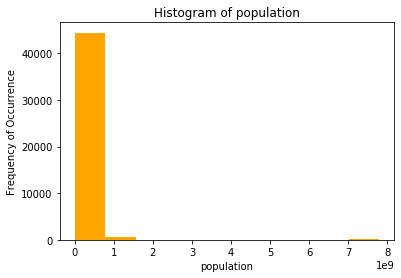

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


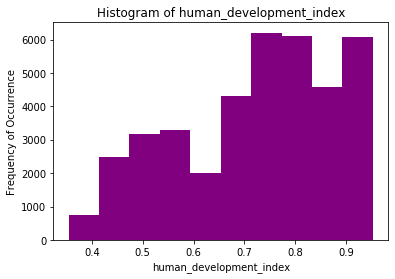

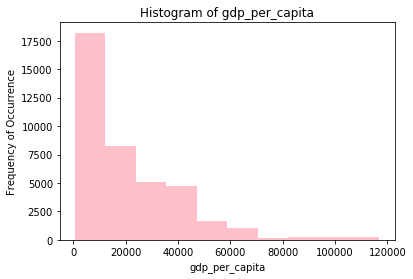

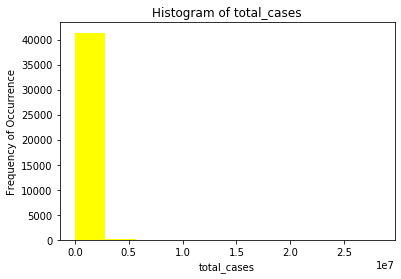

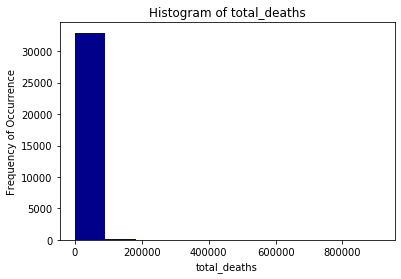

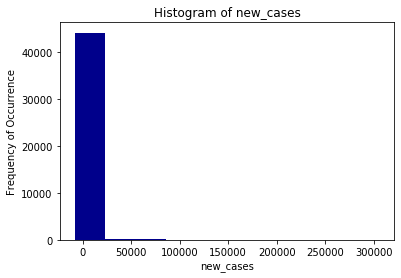

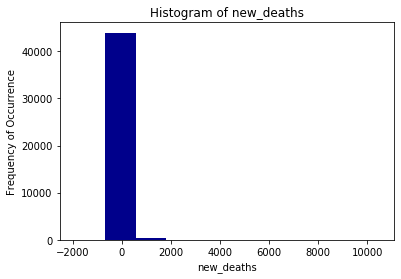

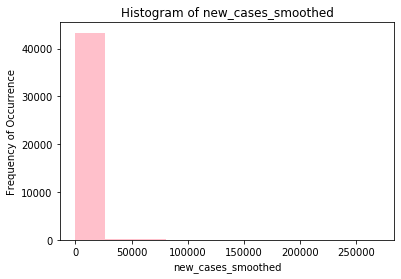

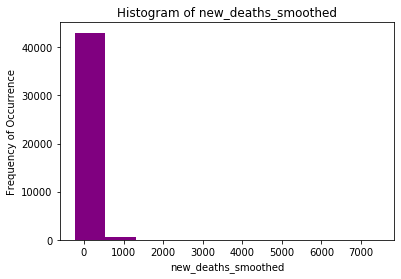

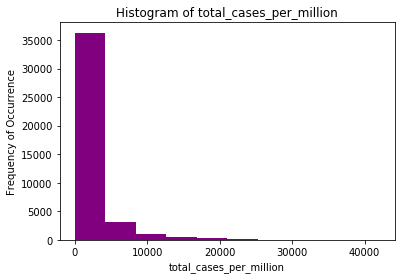

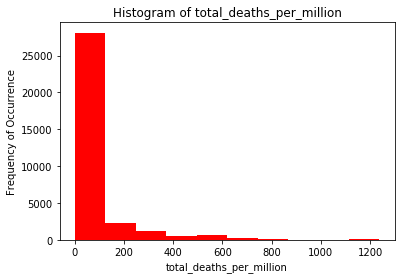

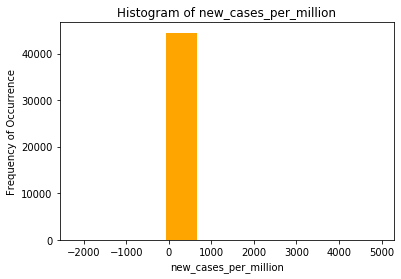

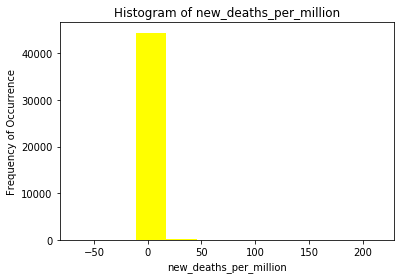

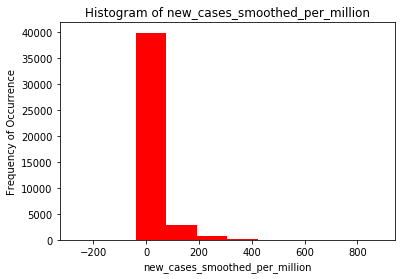

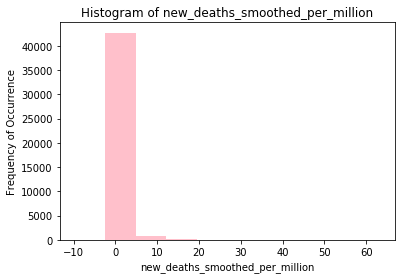

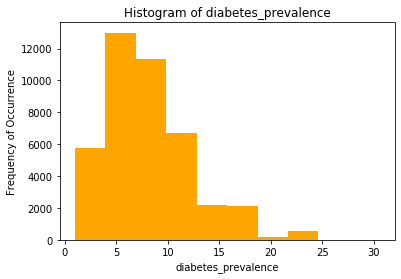

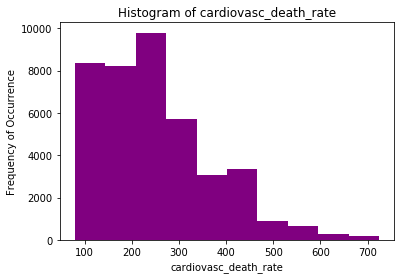

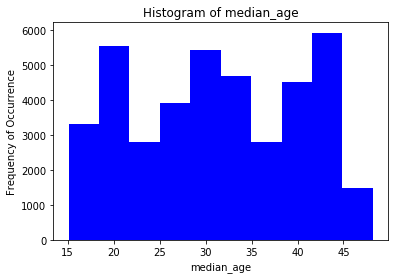

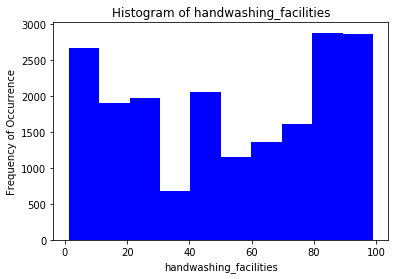

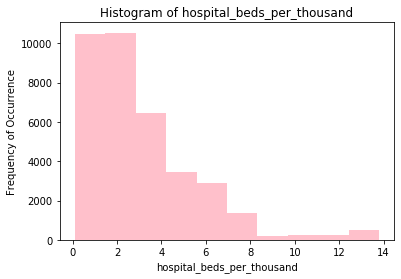

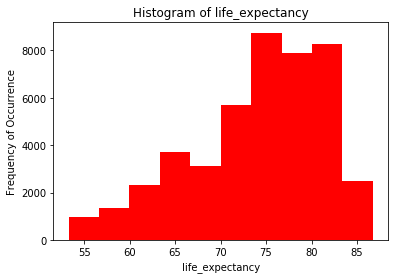

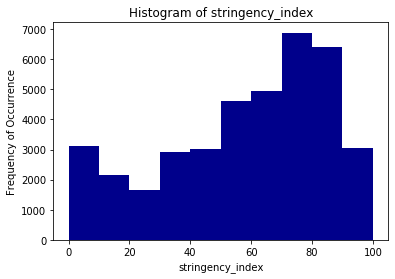

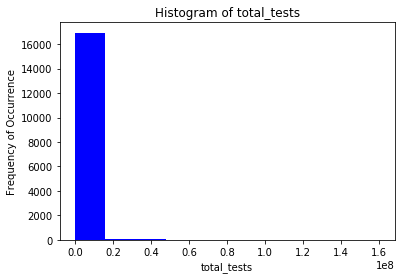

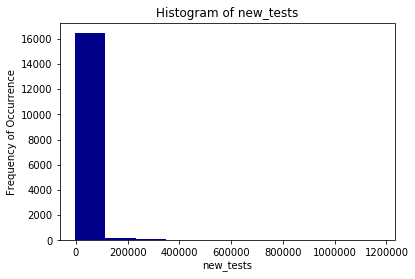

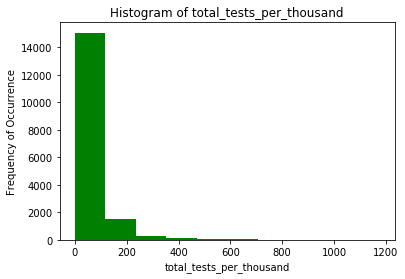

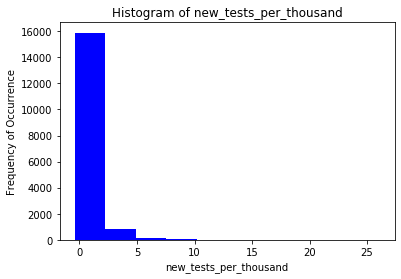

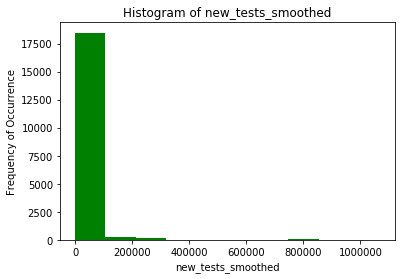

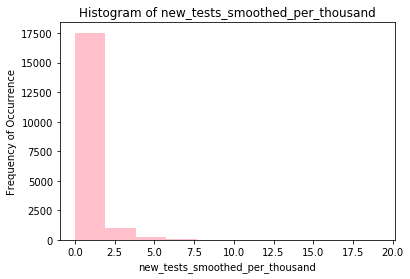

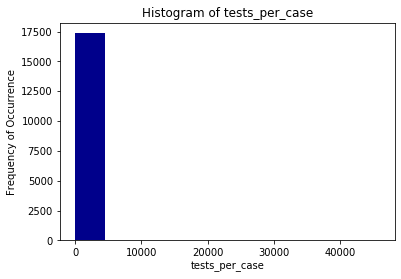

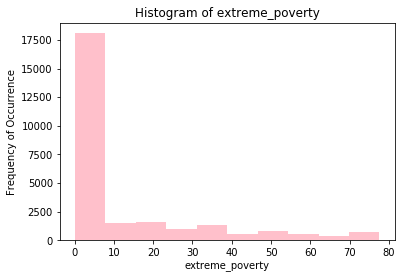

In [293]:
for i in df_num:
    plt.hist(df_num[i],range=(df_num[i].min(),df_num[i].max()),color=colors[random.randrange(0,len(colors)-1)])
    plt.title("Histogram of "+i)
    plt.ylabel('Frequency of Occurrence')
    plt.xlabel(i)
    plt.show()

In [15]:
print(df_num.corr())

                                 population  human_development_index  \
population                         1.000000                -0.023151   
human_development_index           -0.023151                 1.000000   
gdp_per_capita                    -0.037615                 0.755788   
total_cases                        0.616459                 0.106829   
total_deaths                       0.693012                 0.172198   
...                                     ...                      ...   
new_tests_per_thousand            -0.071300                 0.360432   
new_tests_smoothed                 0.485661                 0.119628   
new_tests_smoothed_per_thousand   -0.081684                 0.376750   
tests_per_case                    -0.029723                 0.080621   
extreme_poverty                   -0.020139                -0.768849   

                                 gdp_per_capita  total_cases  total_deaths  \
population                            -0.037615     0.616

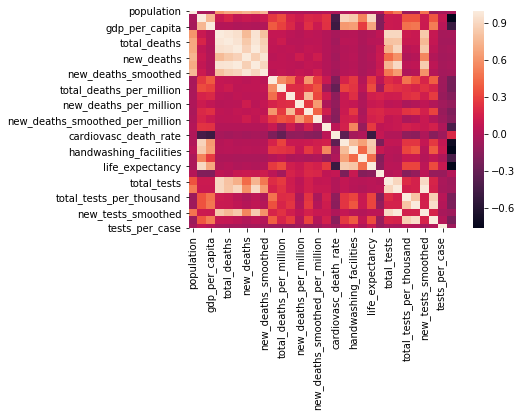

In [16]:
sns.heatmap(df_num.corr())

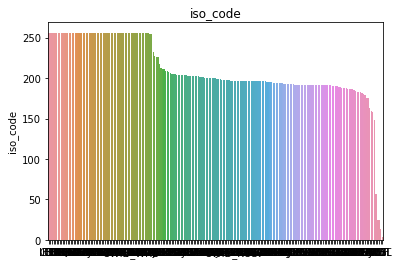

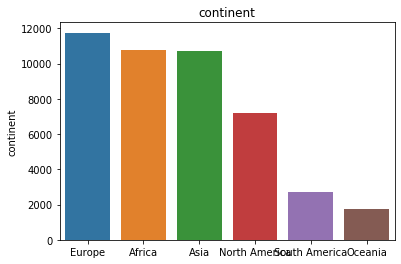

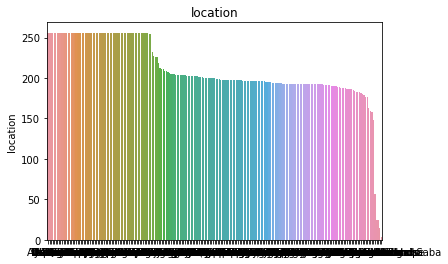

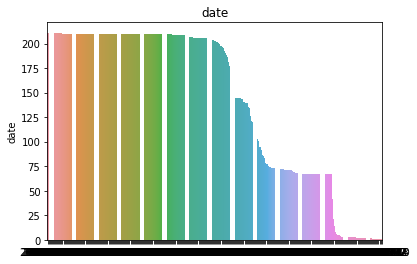

In [142]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index , df_cat[i].value_counts()).set_title(i)
    plt.show()

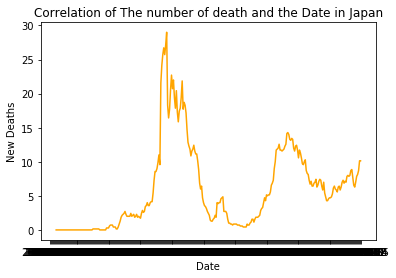

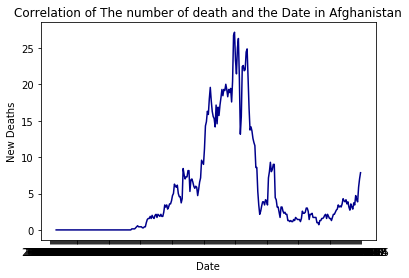

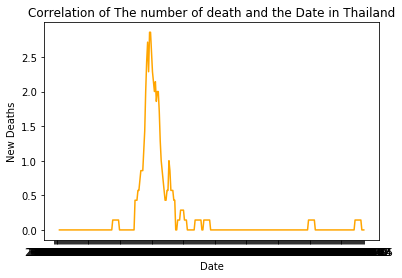

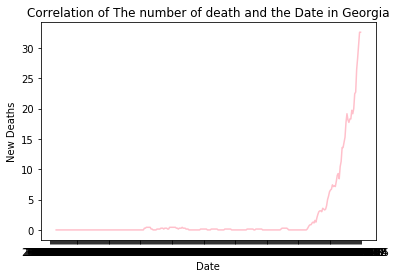

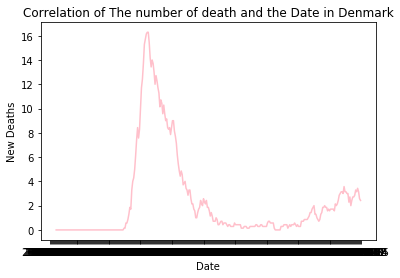

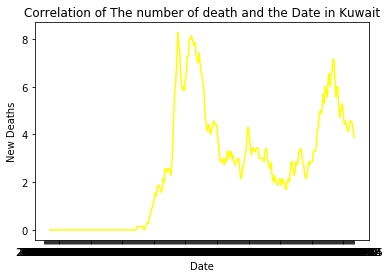

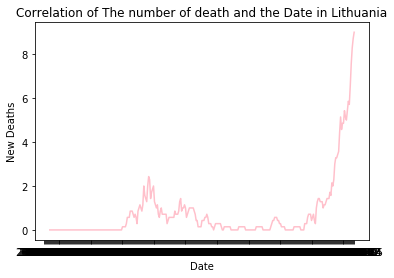

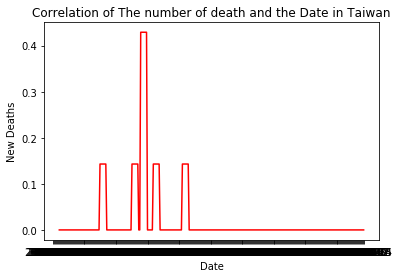

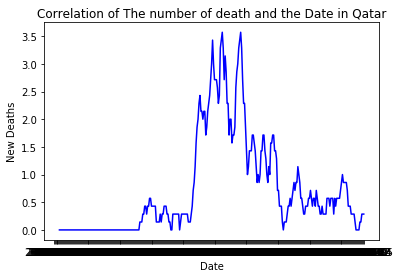

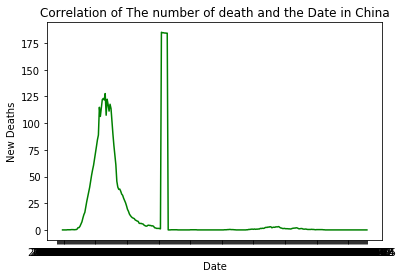

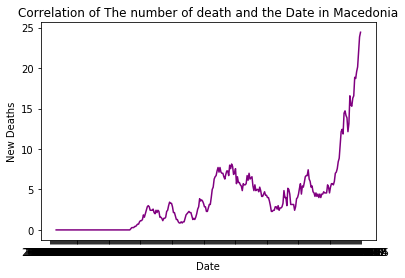

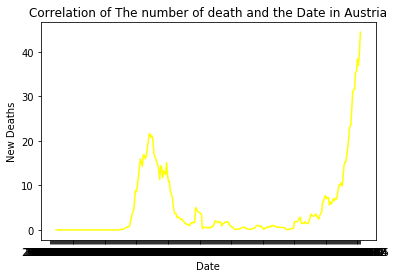

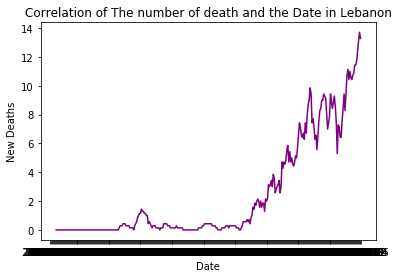

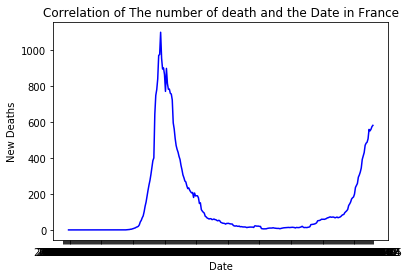

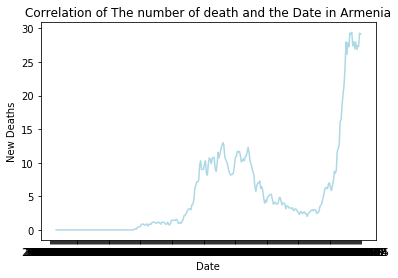

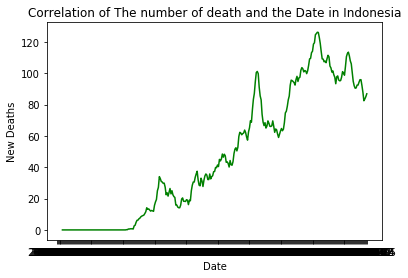

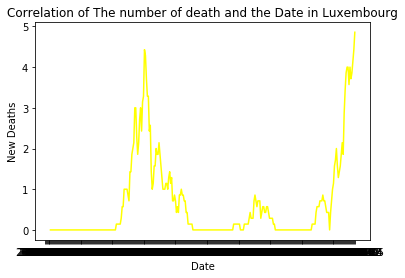

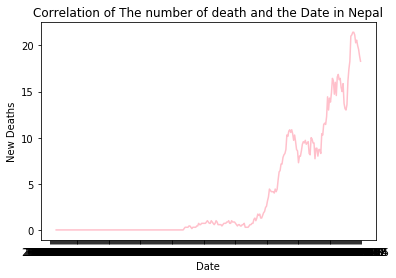

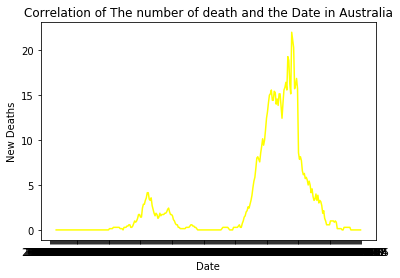

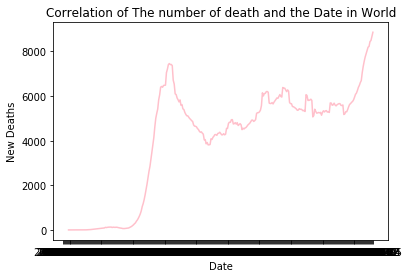

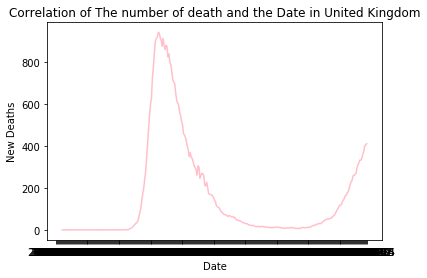

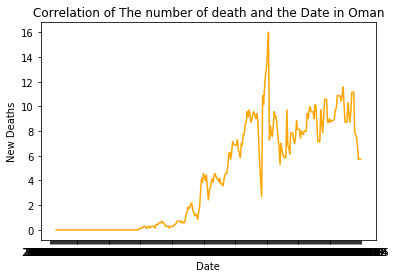

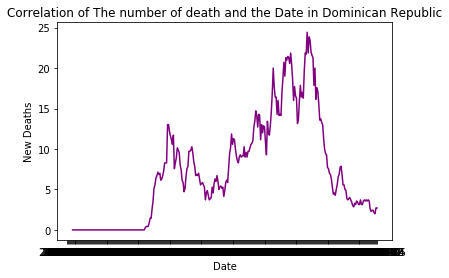

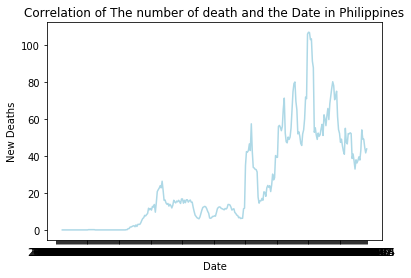

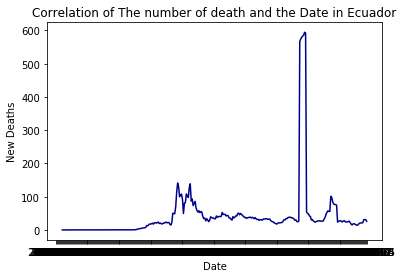

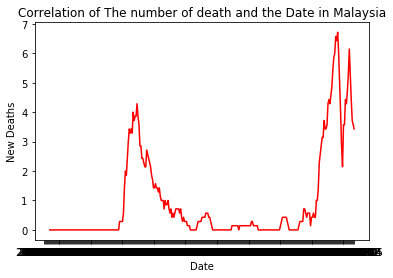

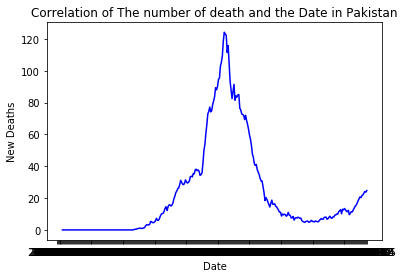

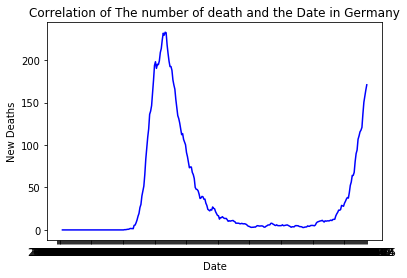

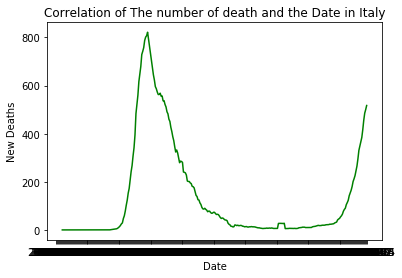

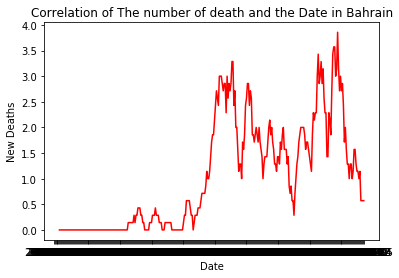

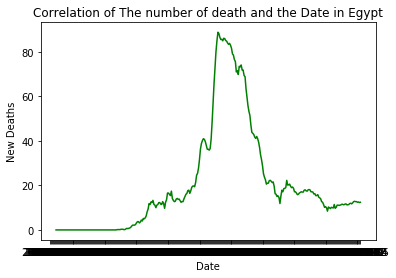

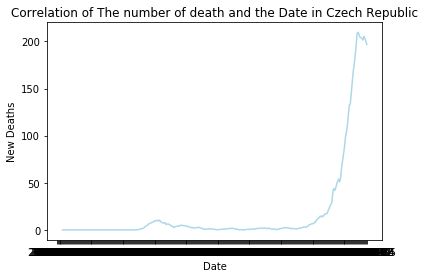

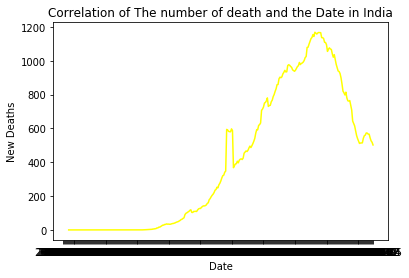

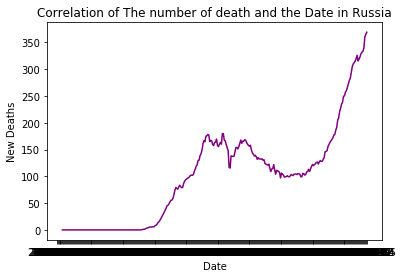

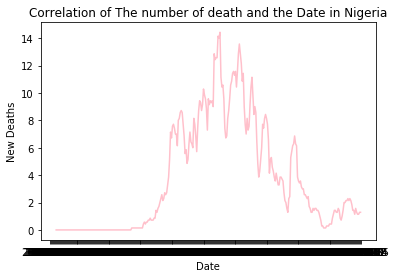

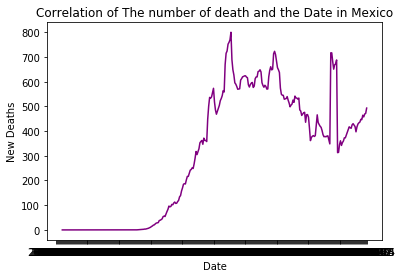

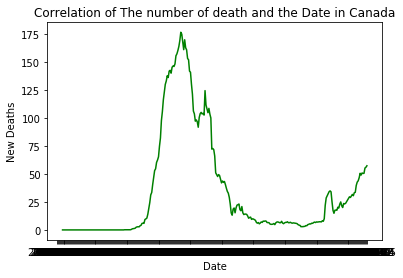

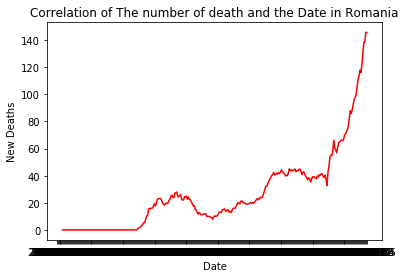

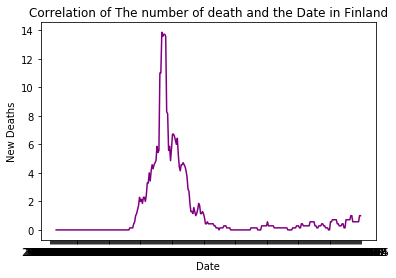

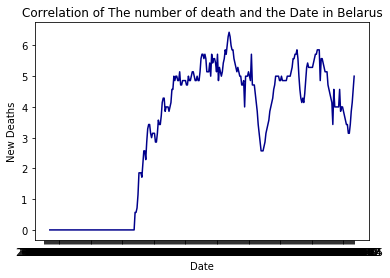

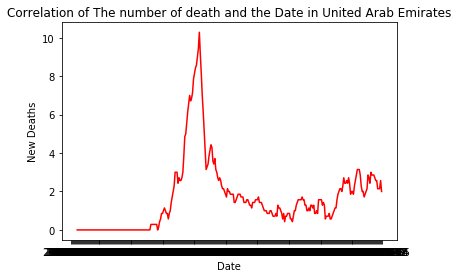

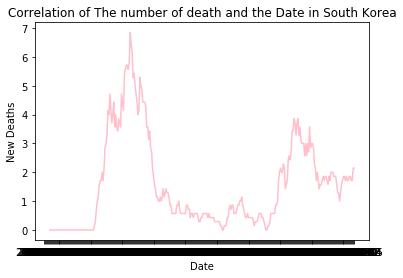

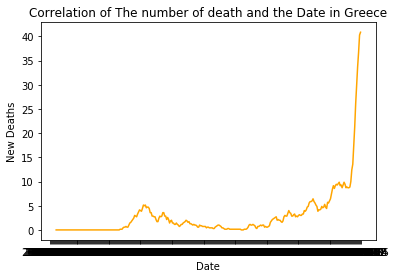

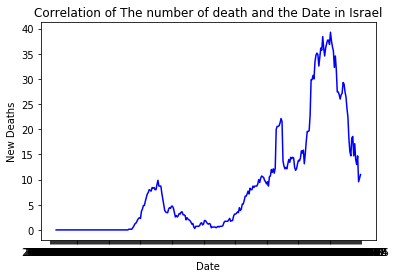

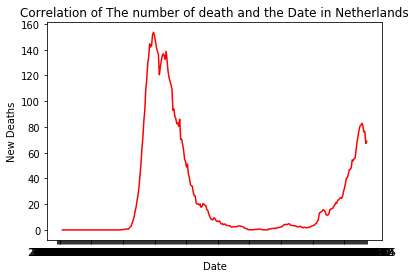

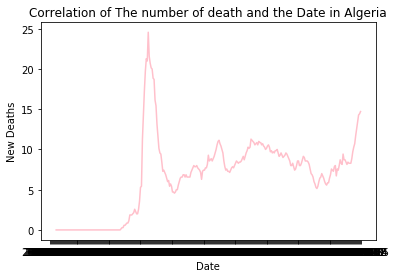

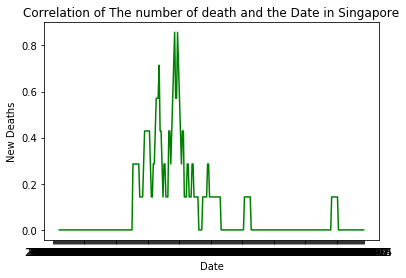

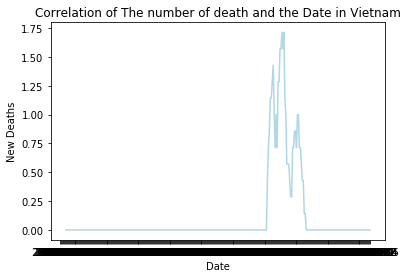

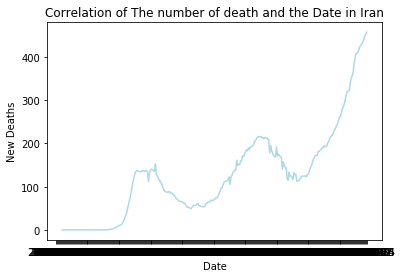

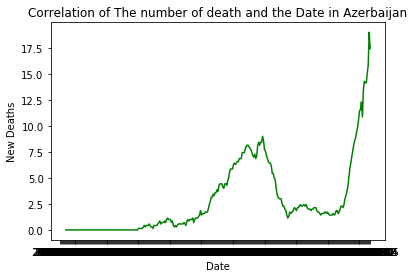

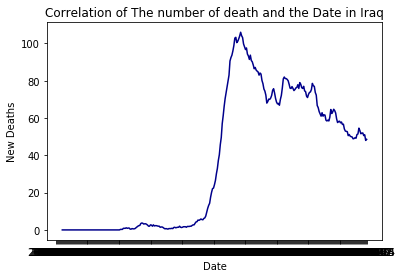

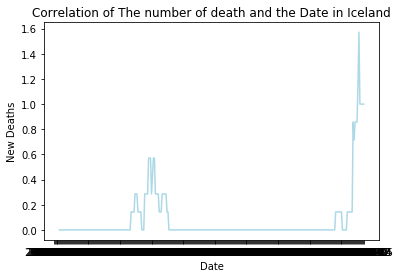

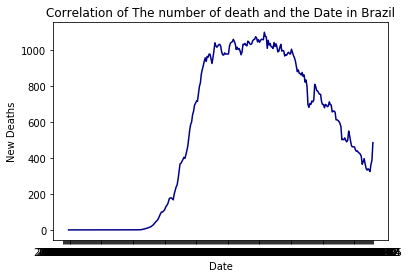

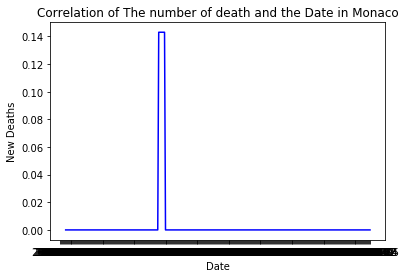

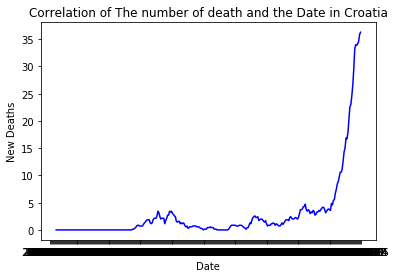

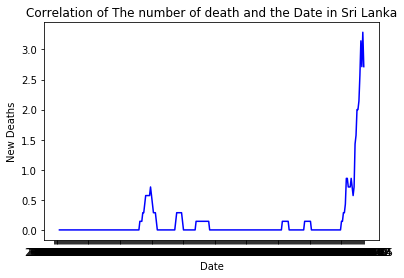

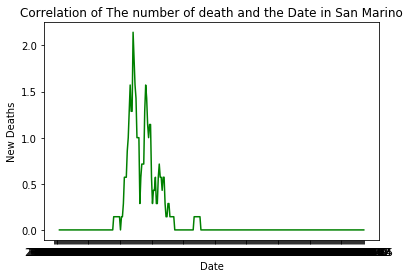

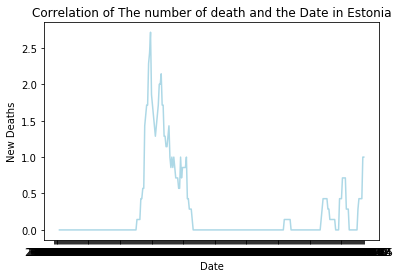

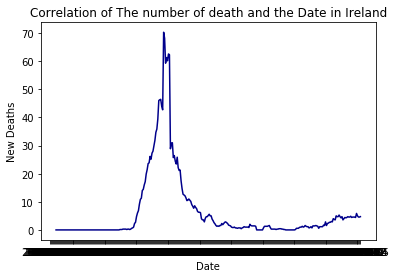

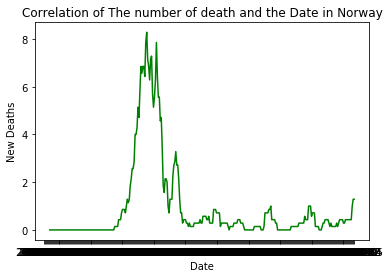

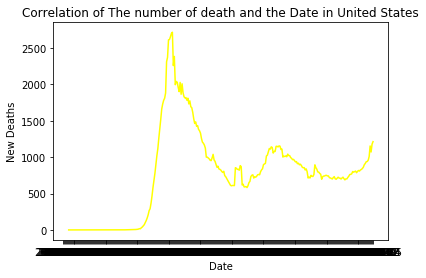

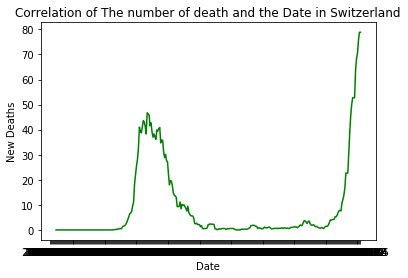

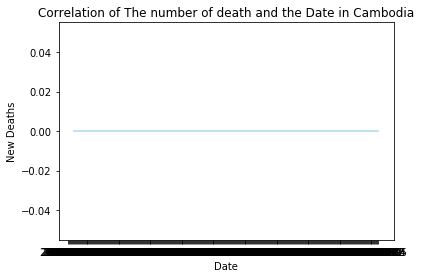

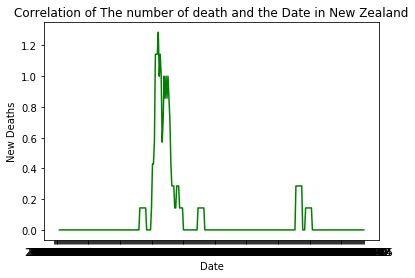

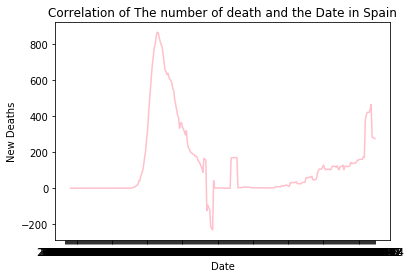

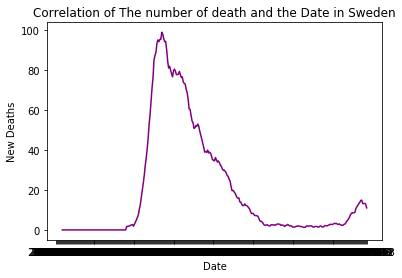

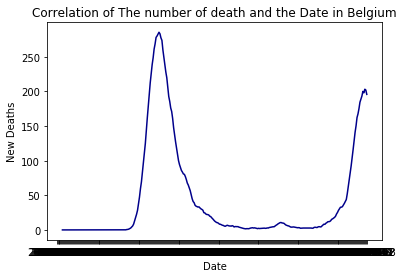

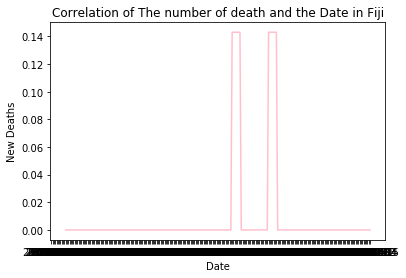

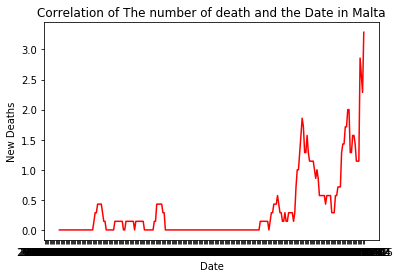

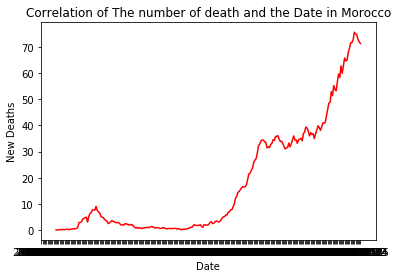

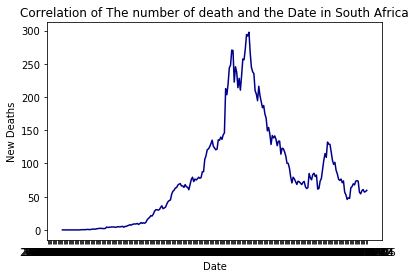

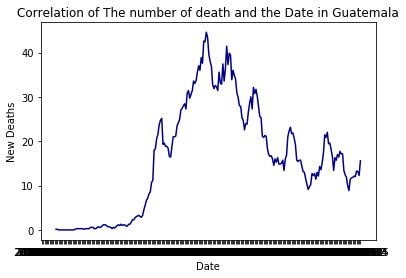

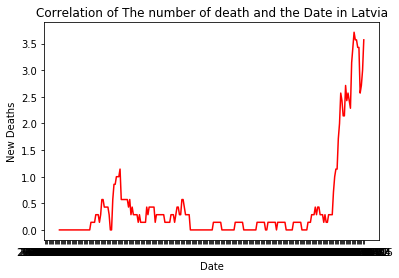

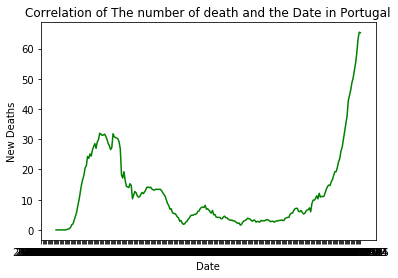

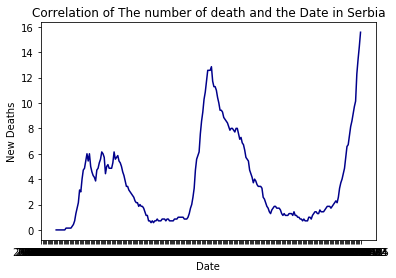

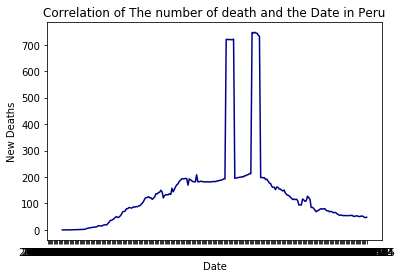

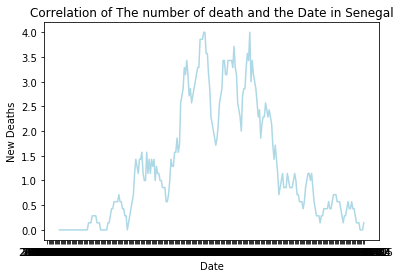

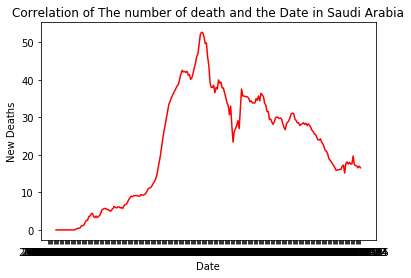

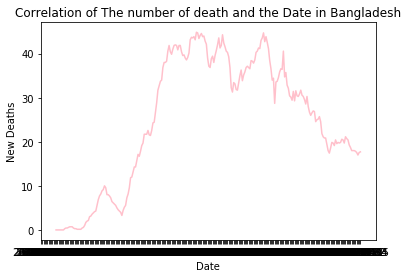

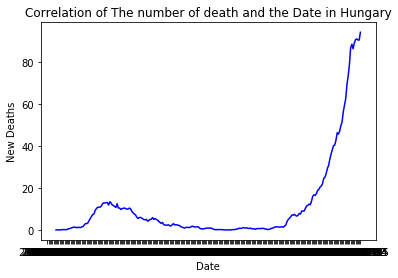

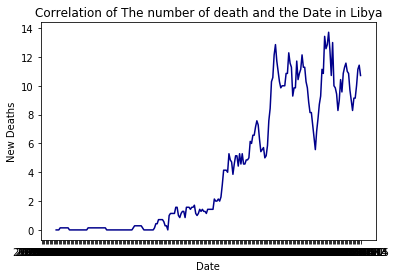

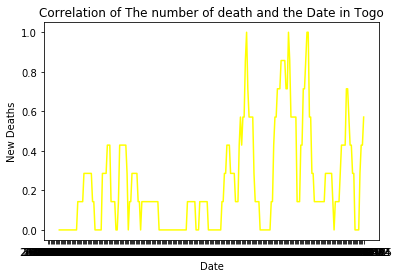

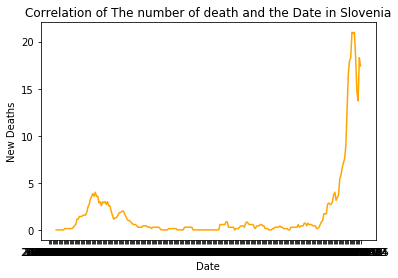

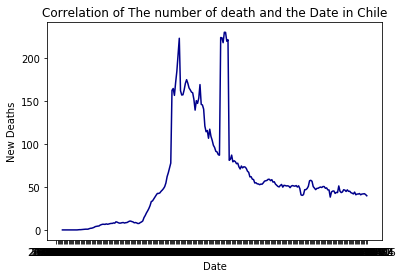

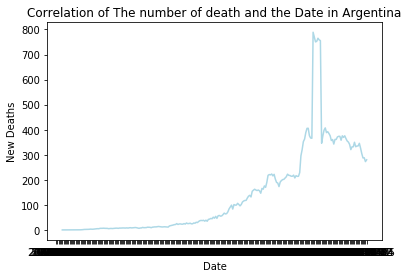

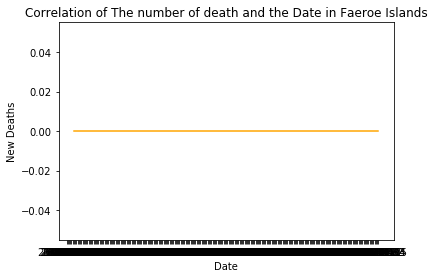

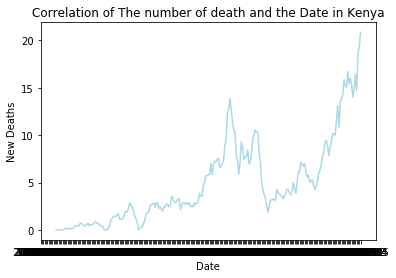

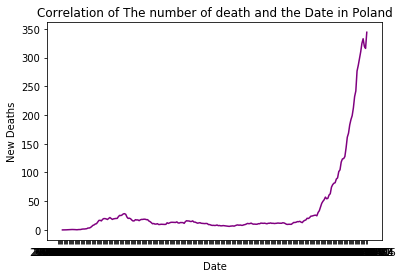

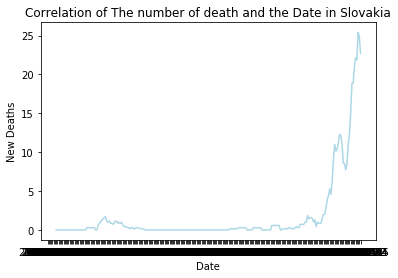

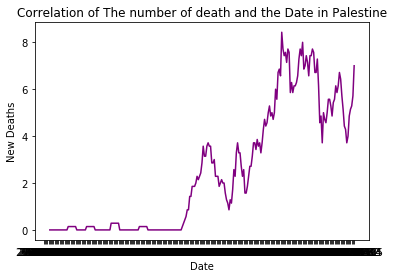

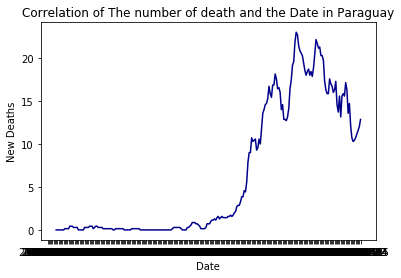

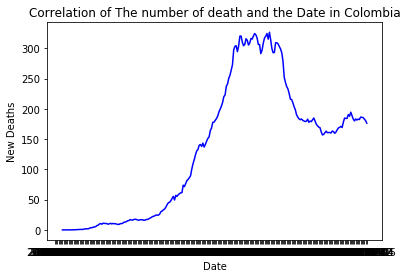

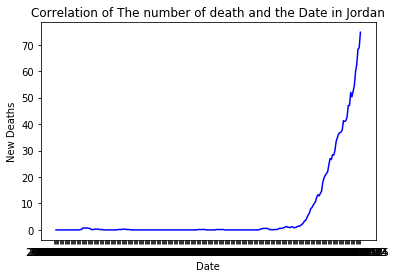

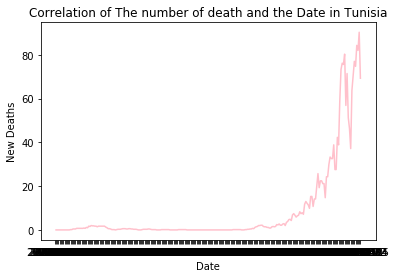

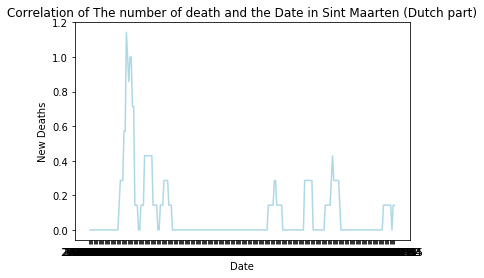

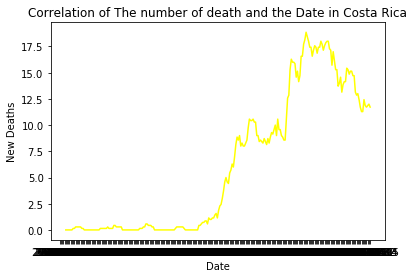

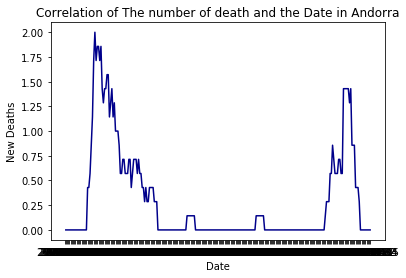

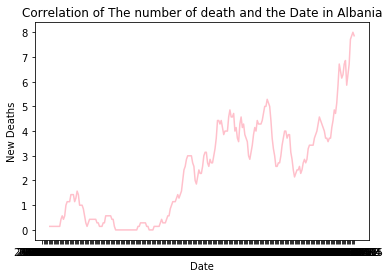

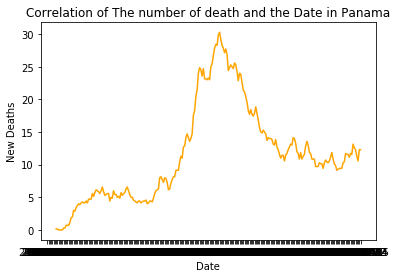

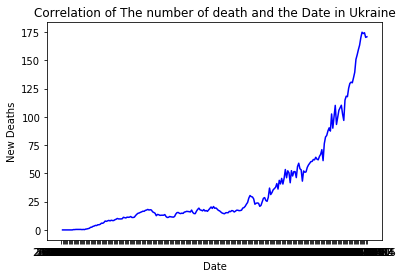

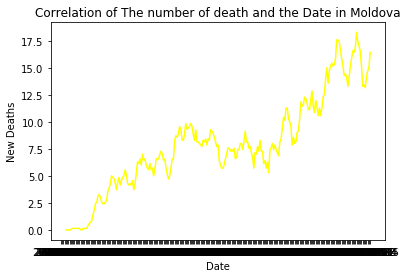

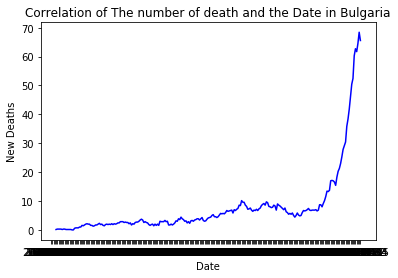

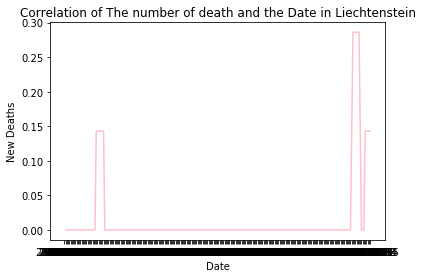

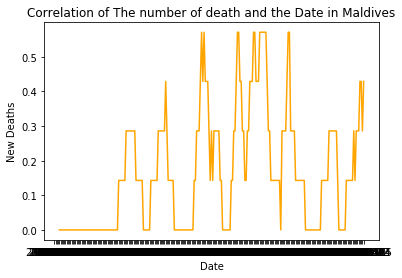

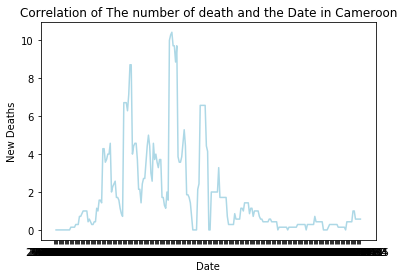

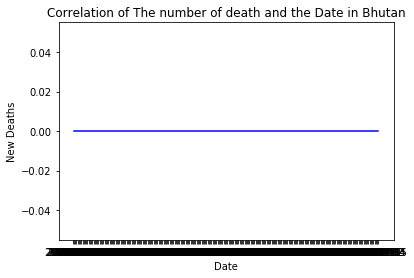

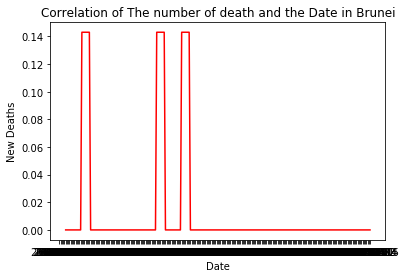

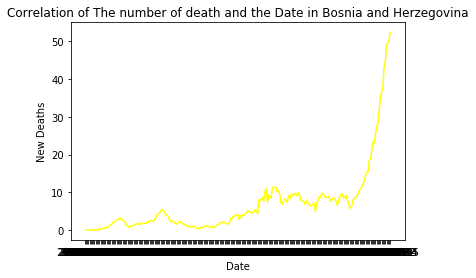

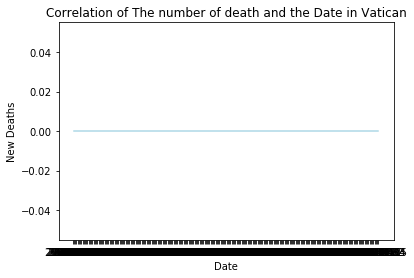

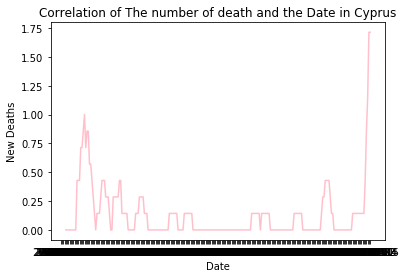

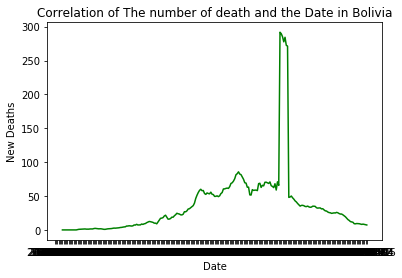

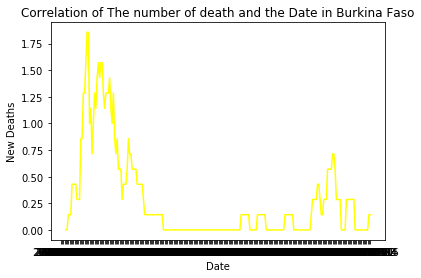

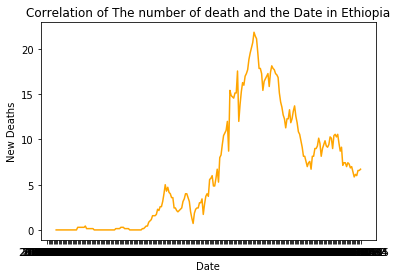

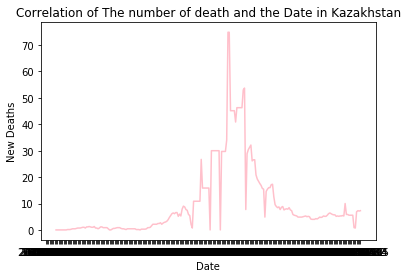

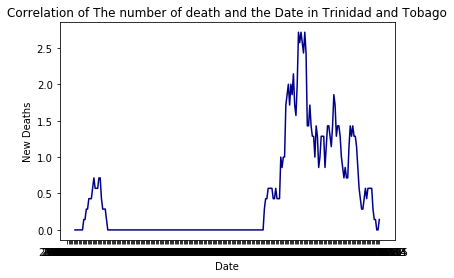

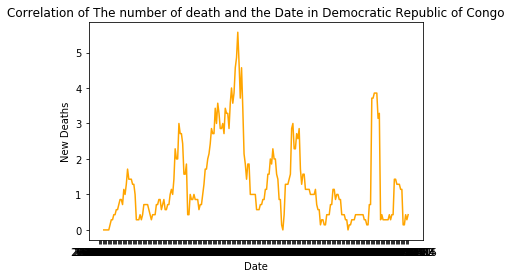

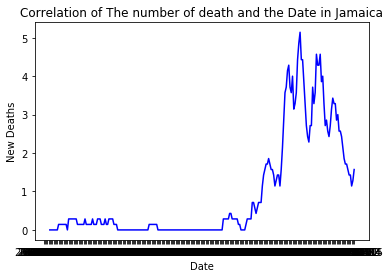

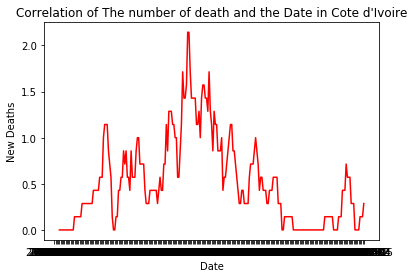

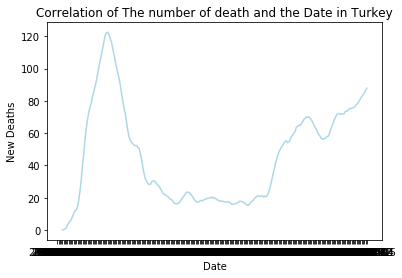

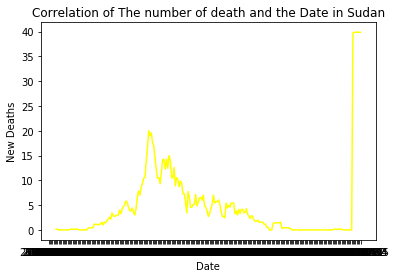

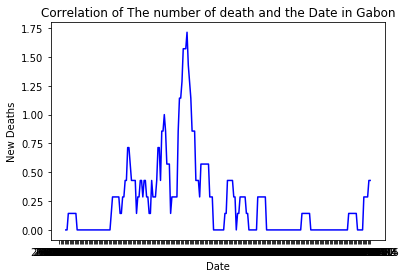

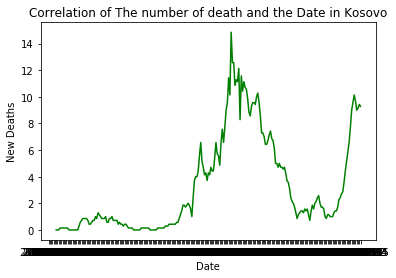

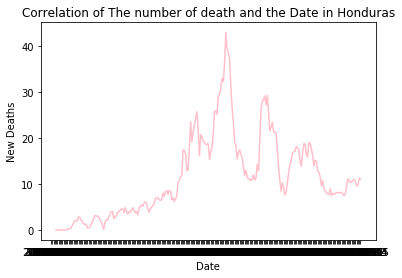

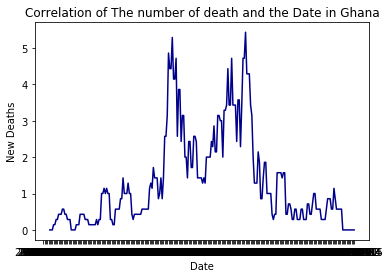

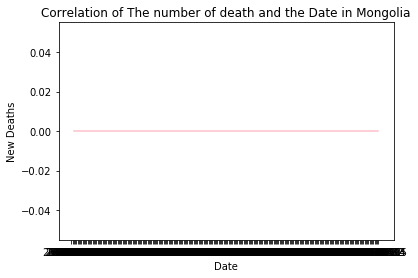

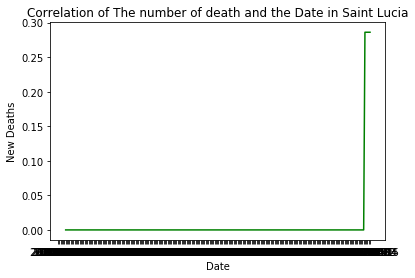

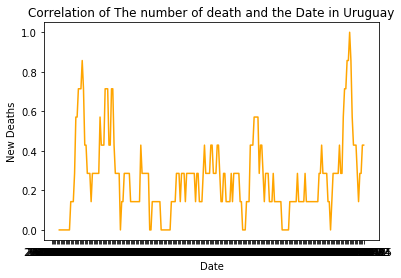

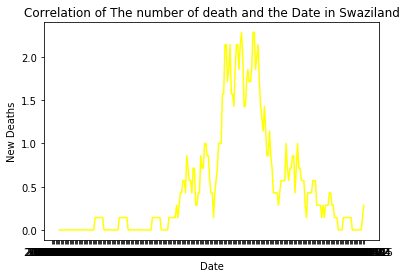

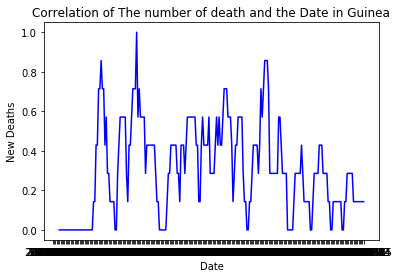

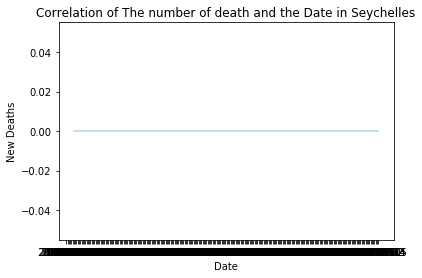

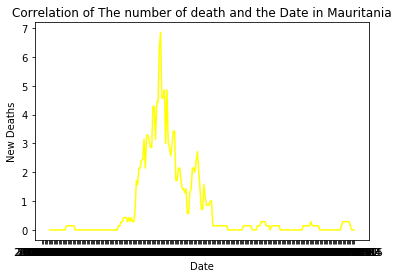

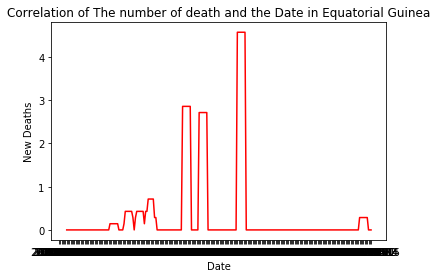

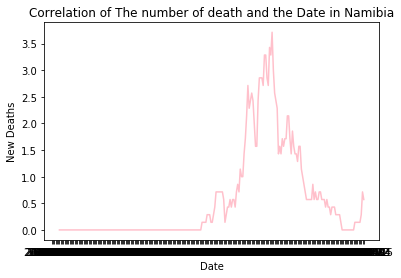

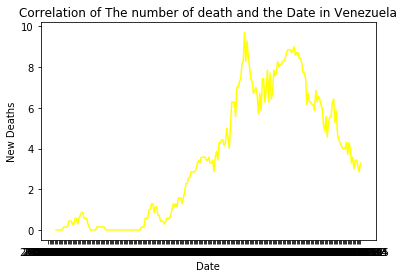

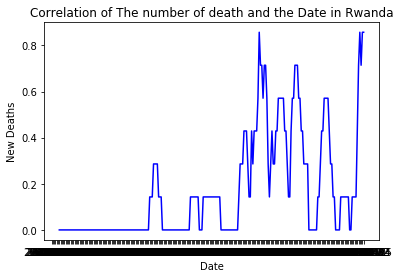

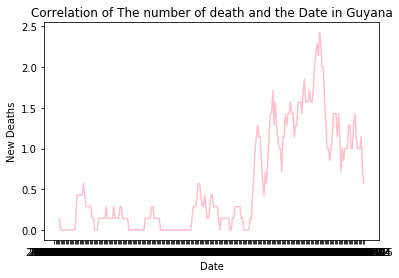

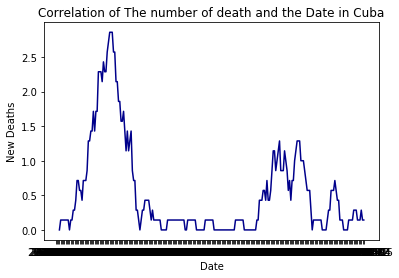

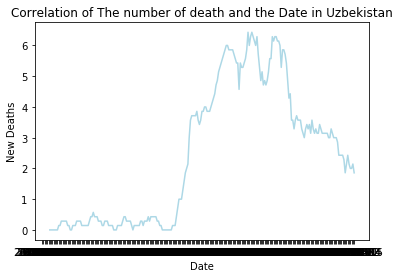

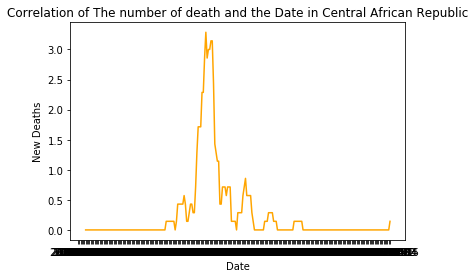

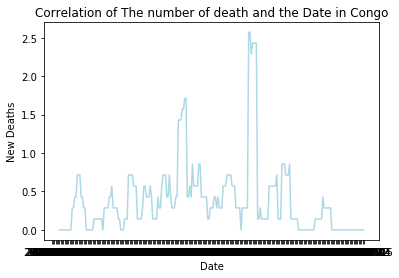

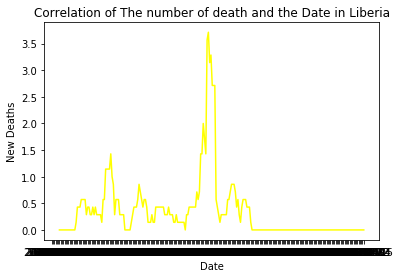

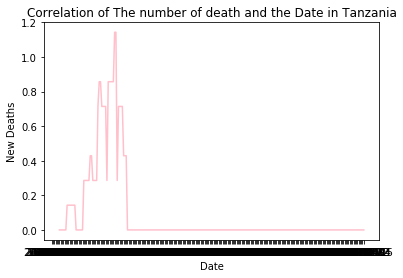

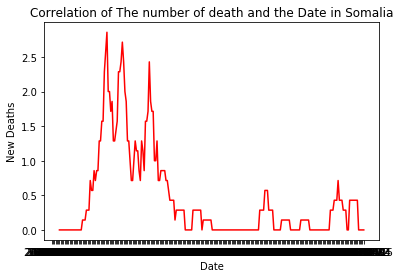

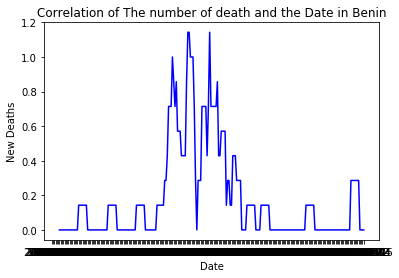

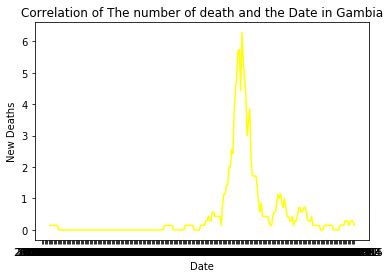

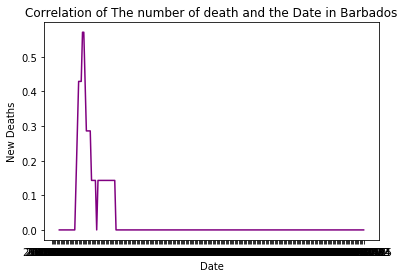

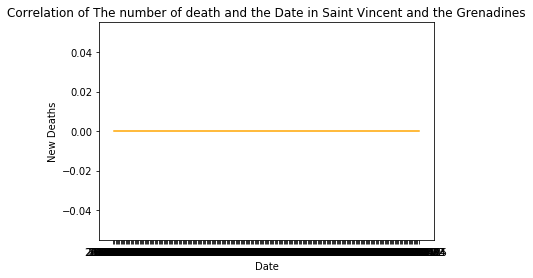

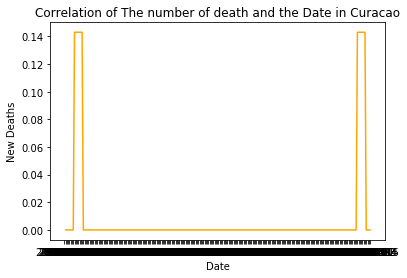

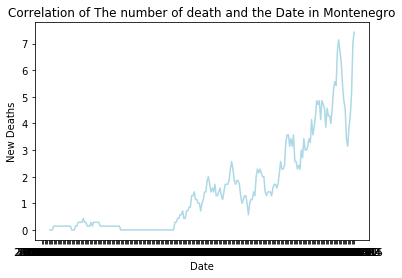

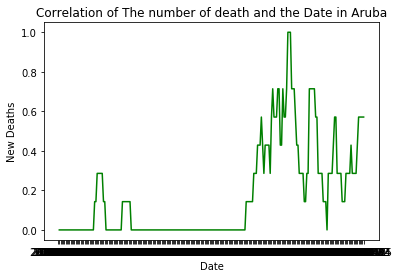

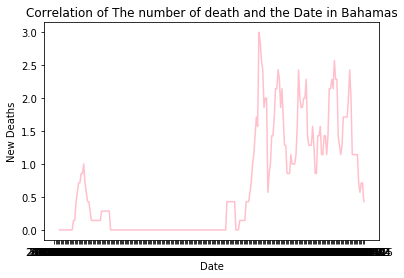

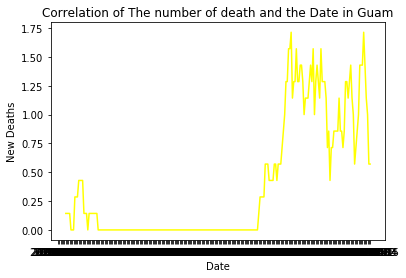

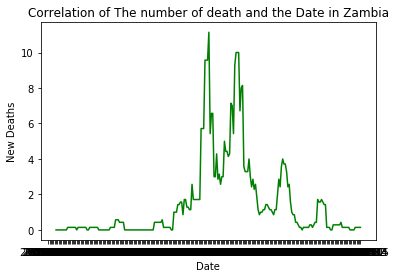

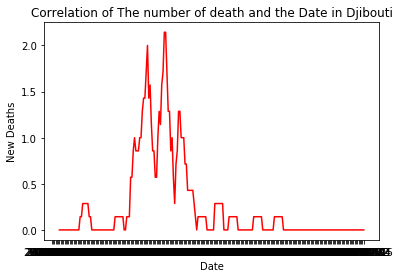

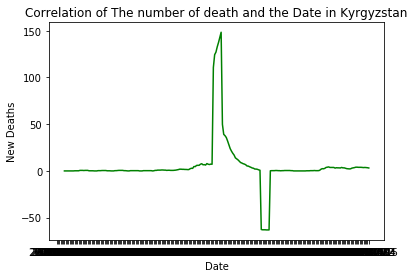

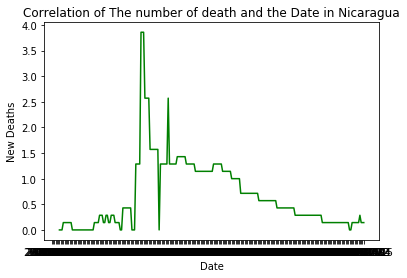

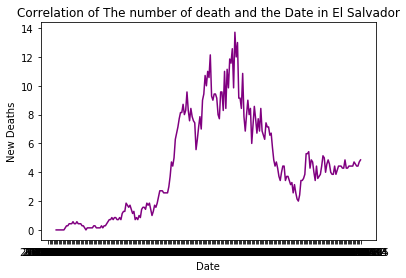

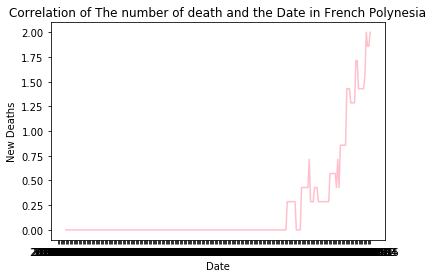

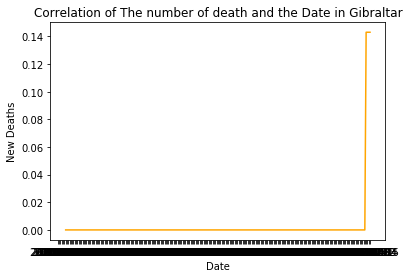

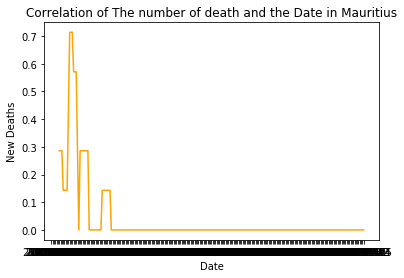

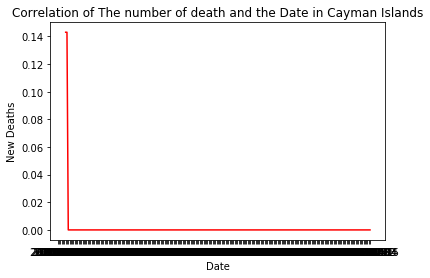

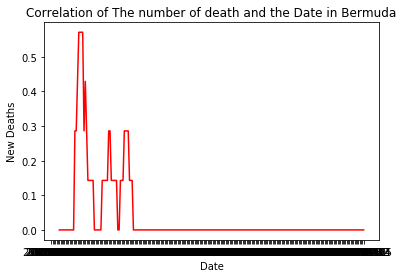

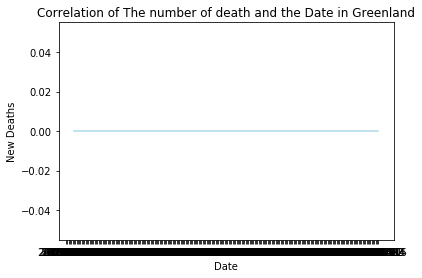

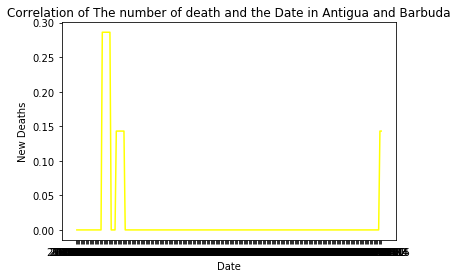

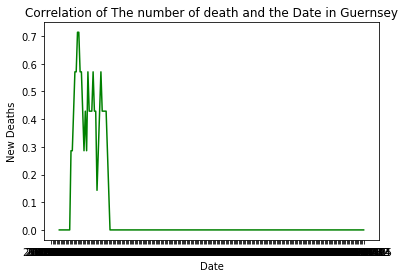

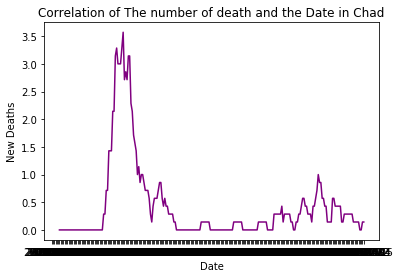

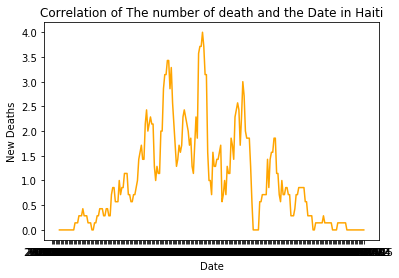

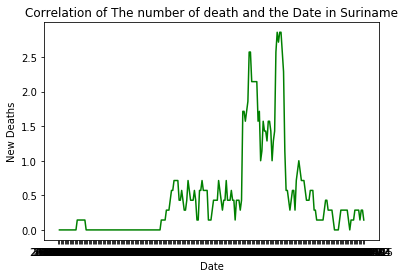

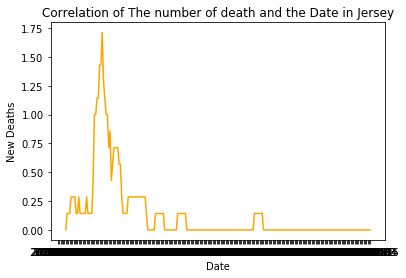

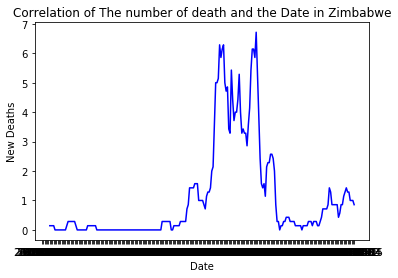

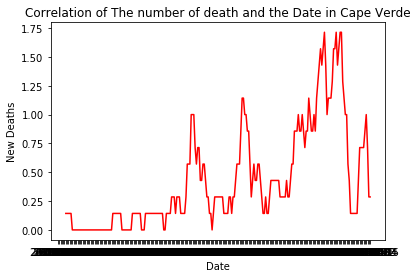

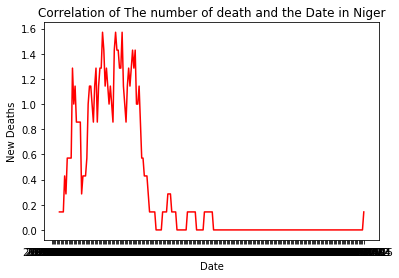

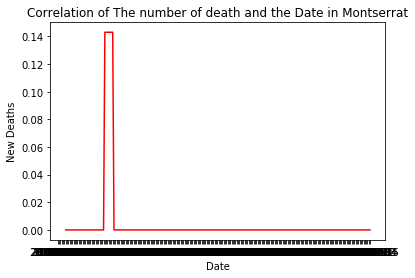

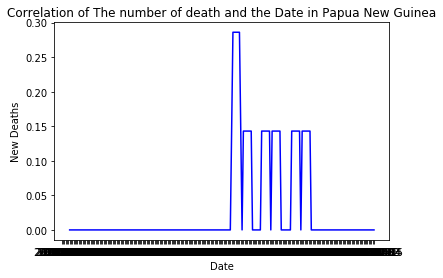

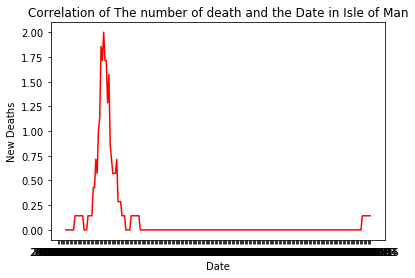

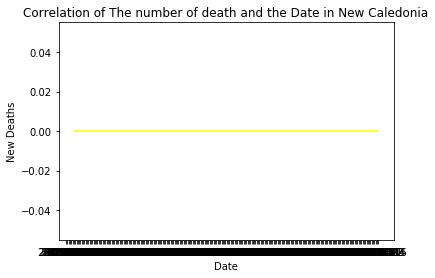

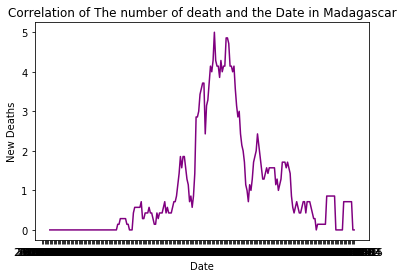

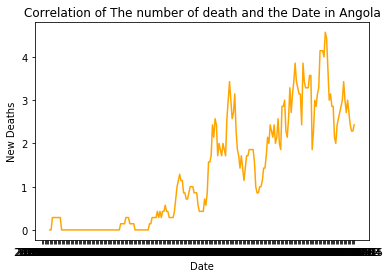

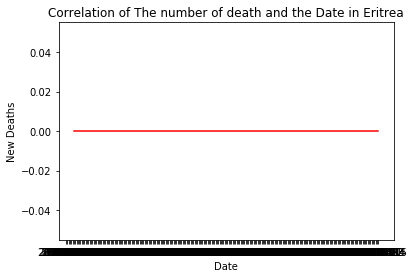

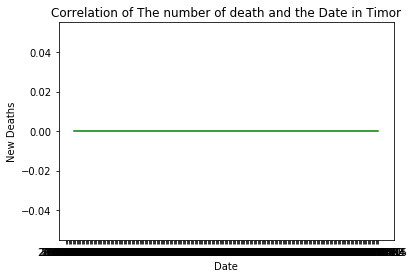

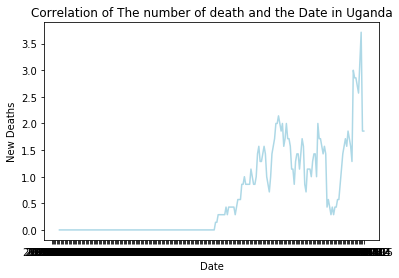

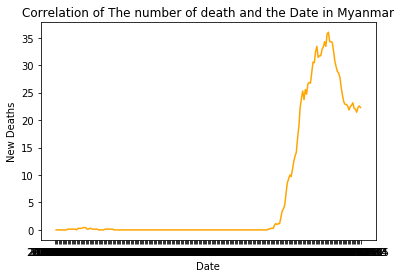

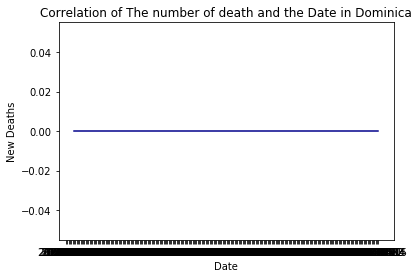

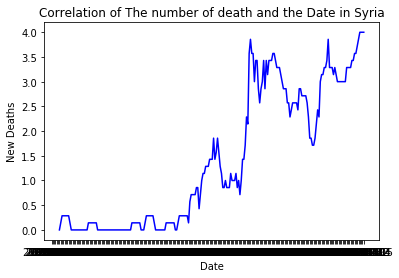

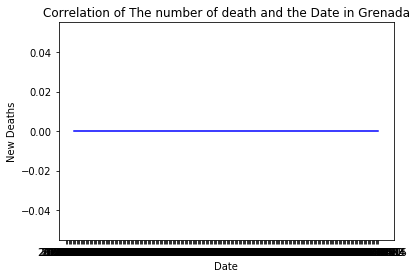

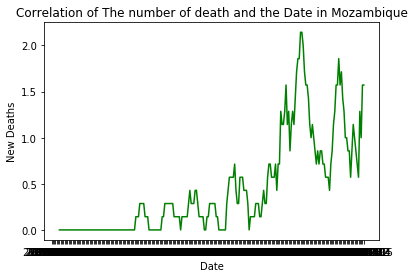

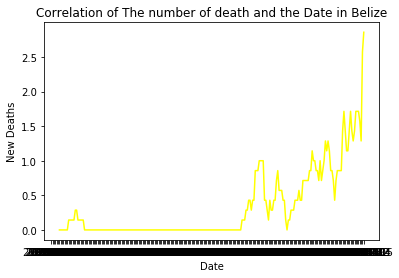

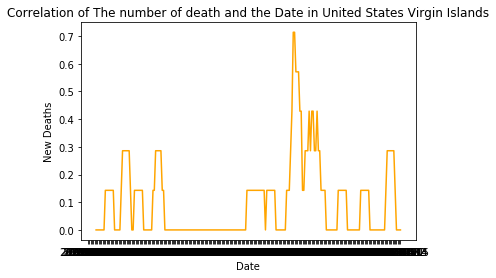

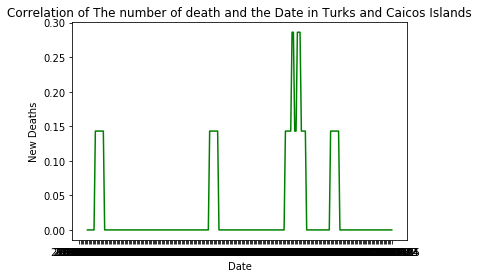

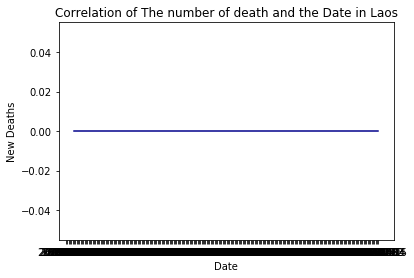

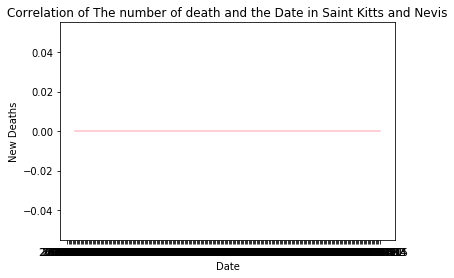

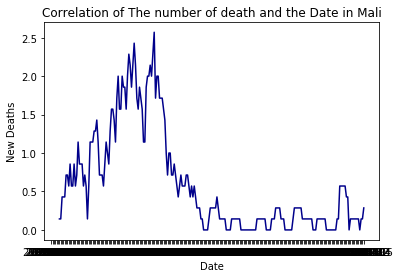

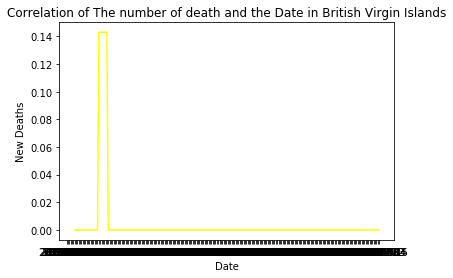

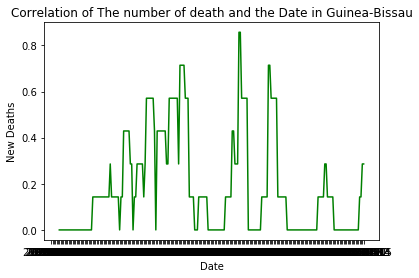

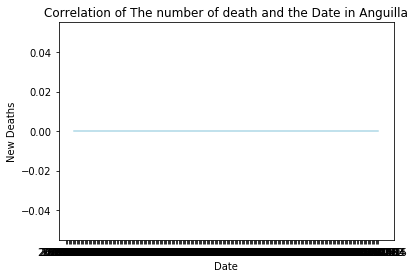

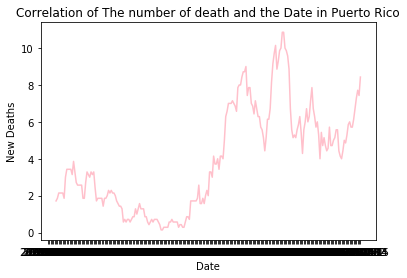

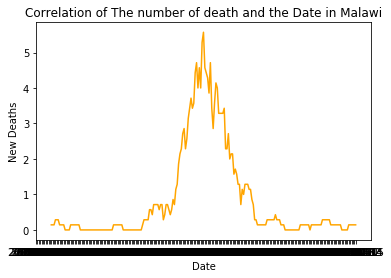

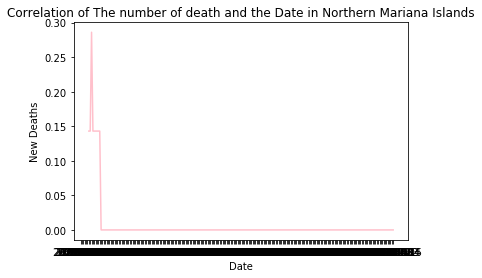

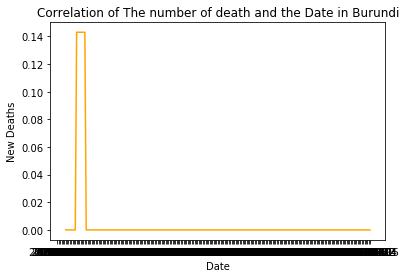

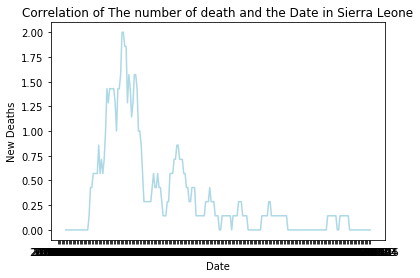

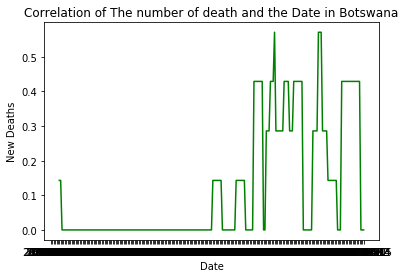

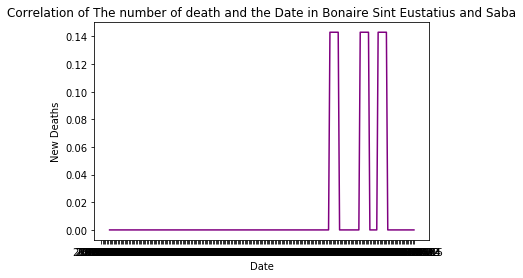

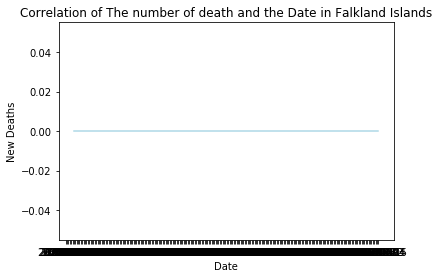

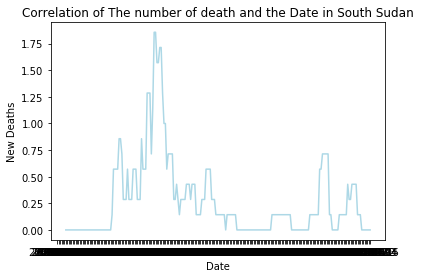

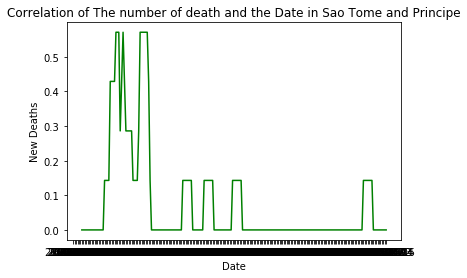

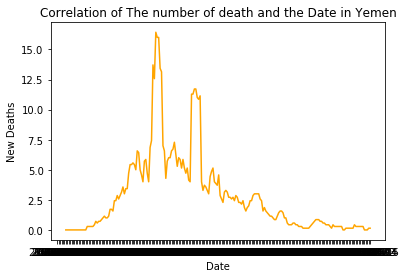

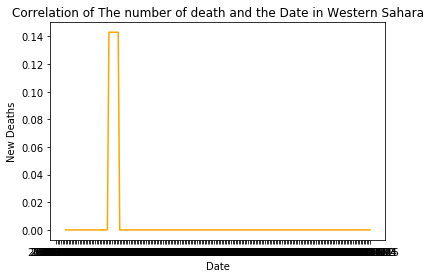

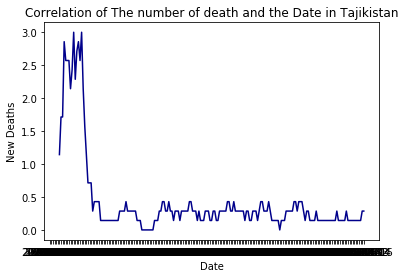

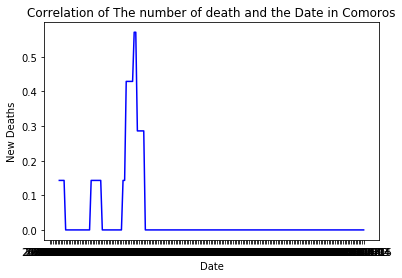

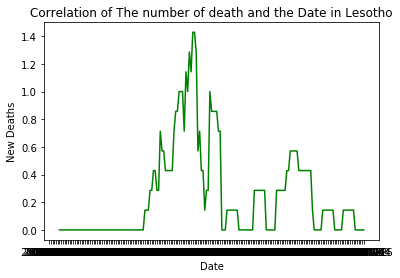

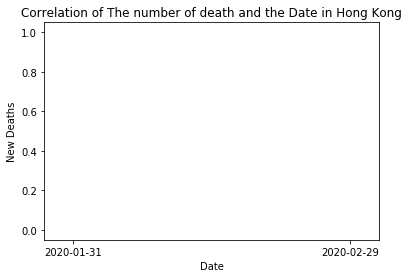

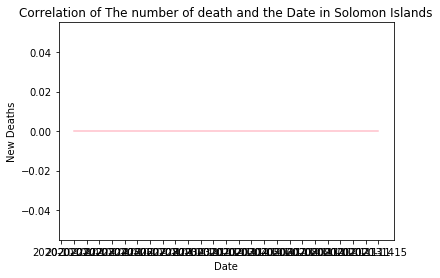

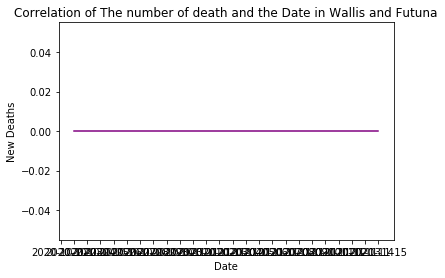

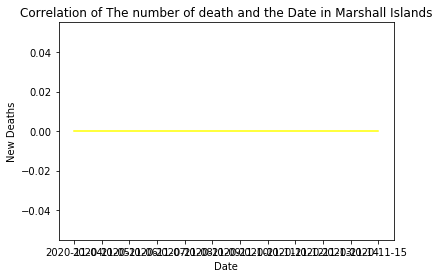

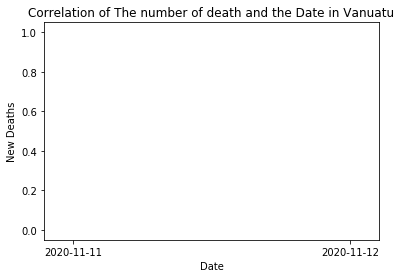

In [204]:
for i in newData['location'].value_counts().index:
    y_axis = newData[newData['location']== i]['new_deaths_smoothed']
    x_axis = newData[newData['location']== i]['date']
    plt.plot(x_axis,y_axis,color=colors[random.randrange(0,len(colors)-1)])
    plt.title("Graph of the number of death in "+i)
    plt.ylabel('New Deaths')
    plt.xlabel('Date')
    plt.show()

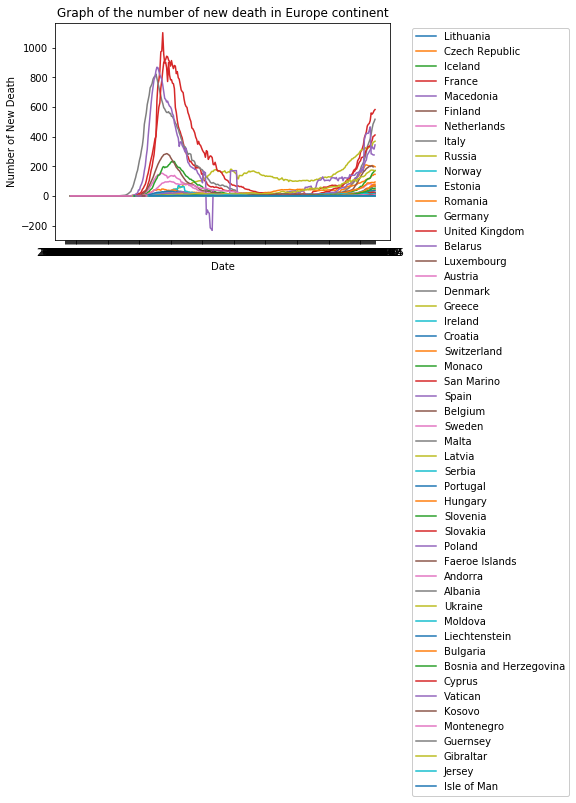

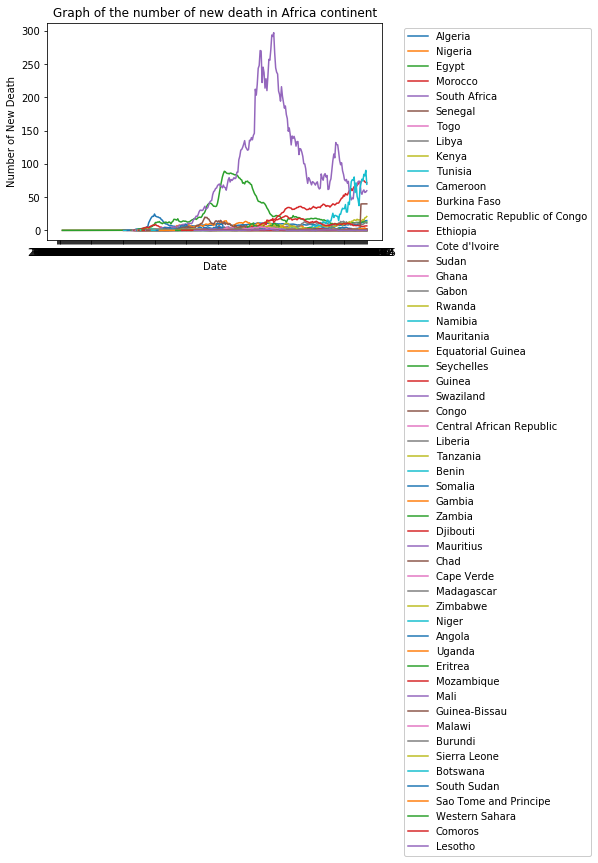

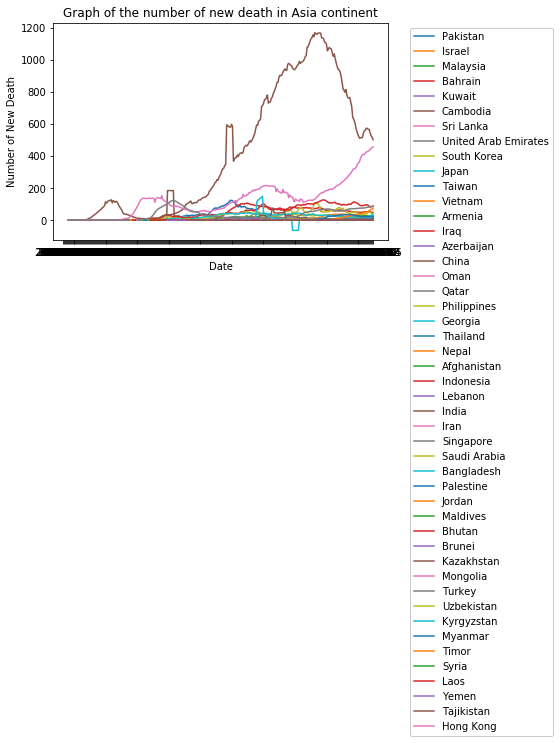

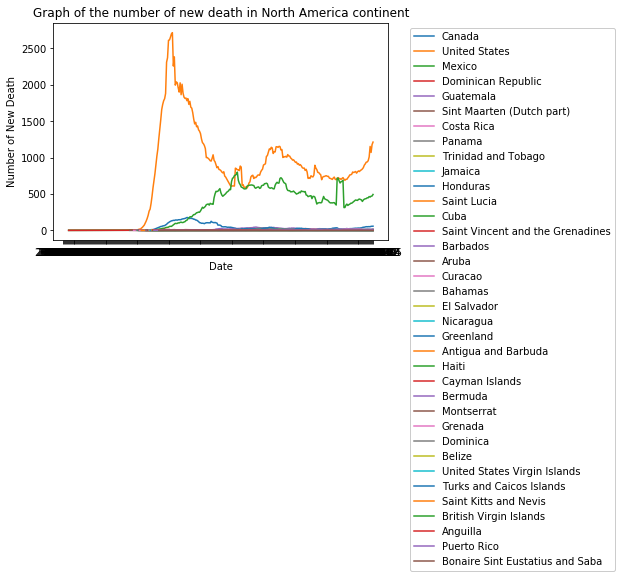

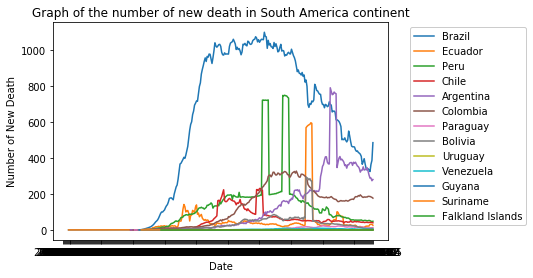

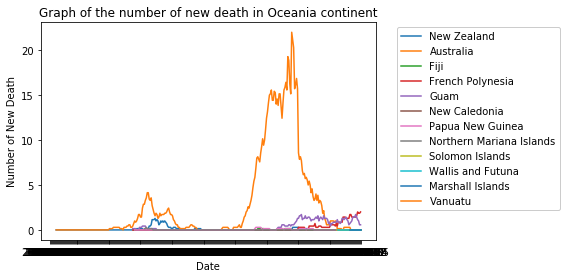

In [129]:
for i in newData['continent'].value_counts().index:
    for j in newData[newData['continent']==i]['location'].value_counts().index:
        x_axis = newData[newData['location']== j]['date']
        plt.plot(x_axis,newData[newData['location']== j]['new_deaths_smoothed'],label=j)
    plt.xlabel('Date')
    plt.ylabel('Number of New Death')
    plt.legend(framealpha=1,bbox_to_anchor=(1.05, 1),loc='upper left');
    plt.title('New death in '+i+' continent')
    plt.show()

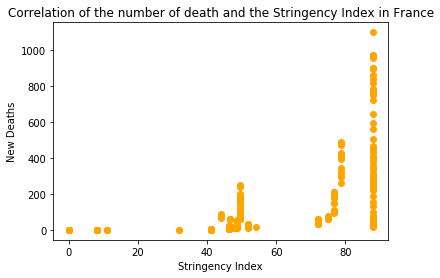

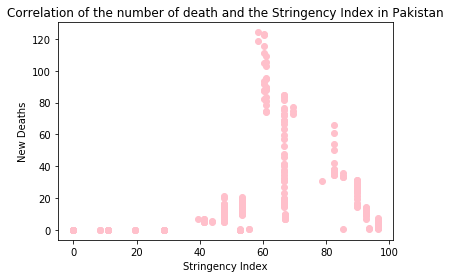

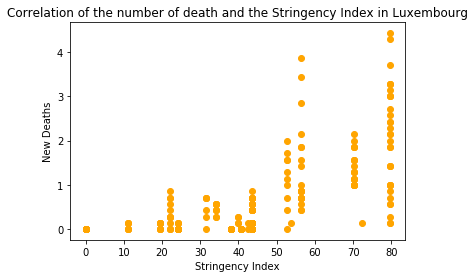

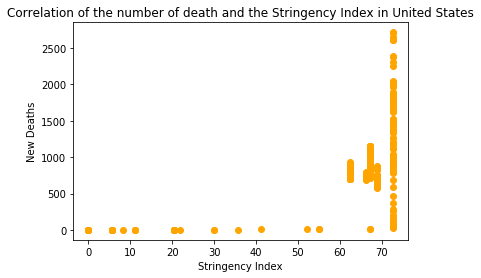

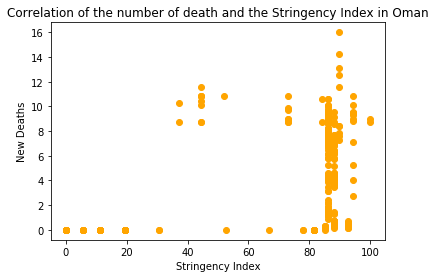

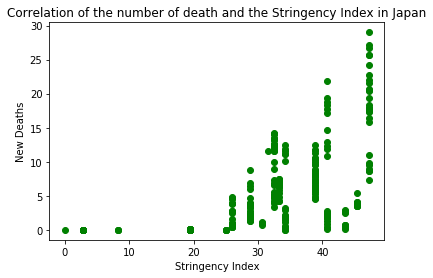

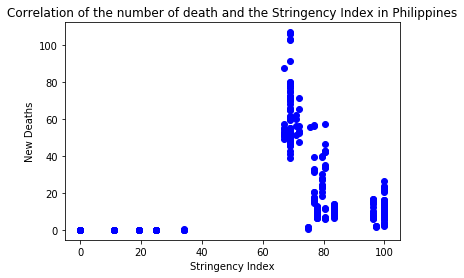

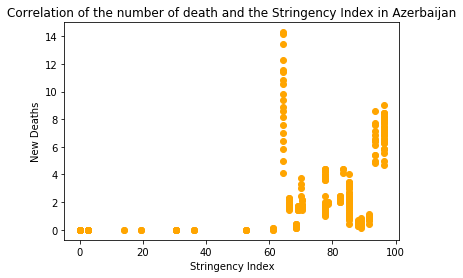

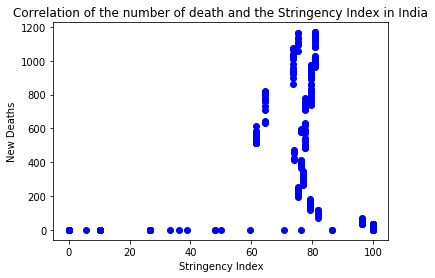

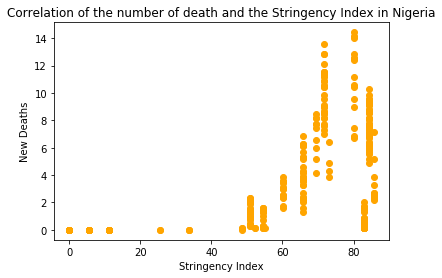

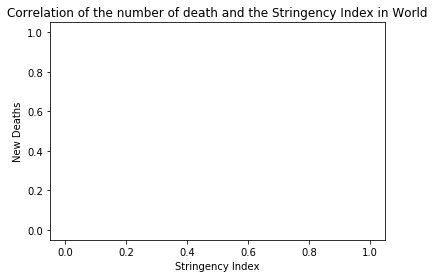

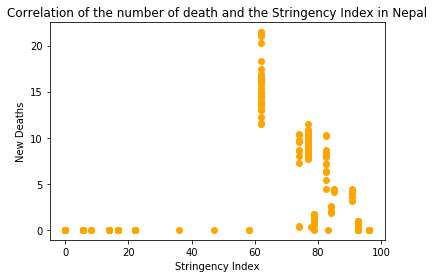

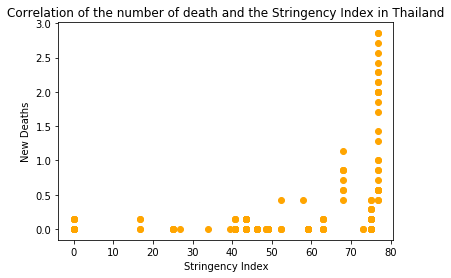

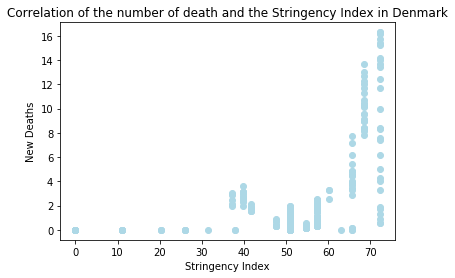

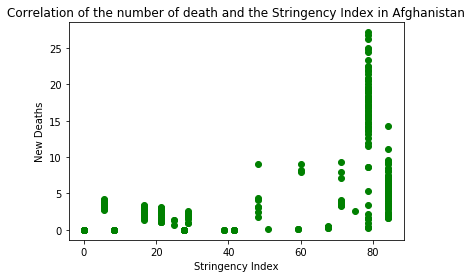

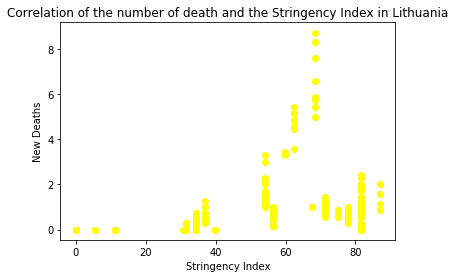

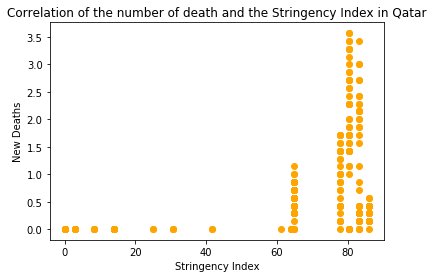

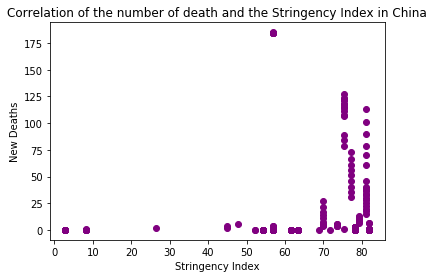

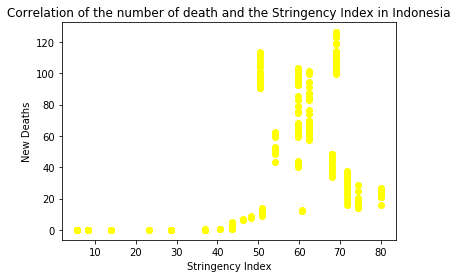

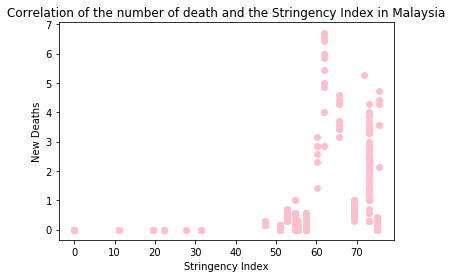

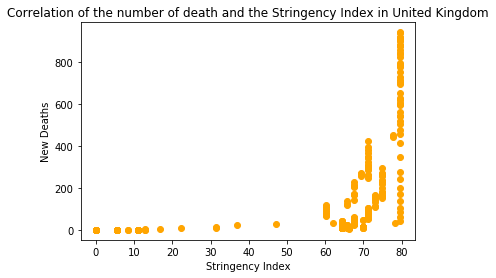

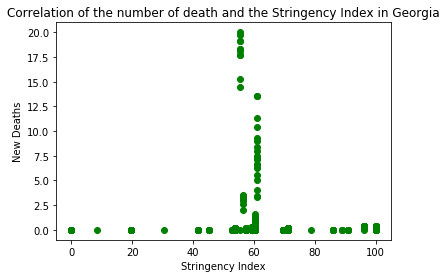

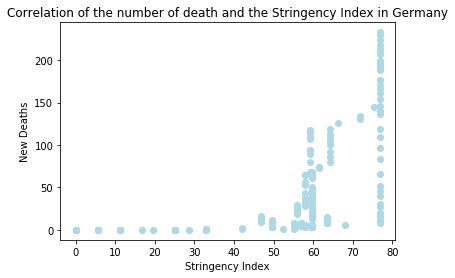

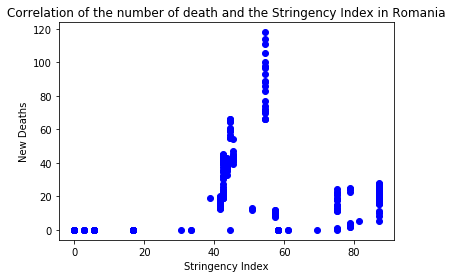

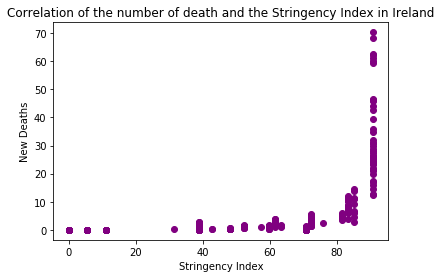

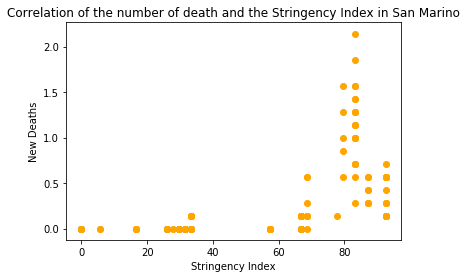

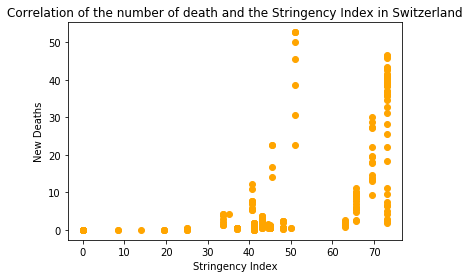

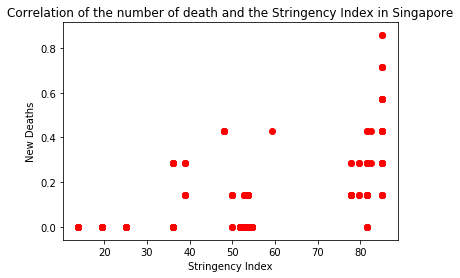

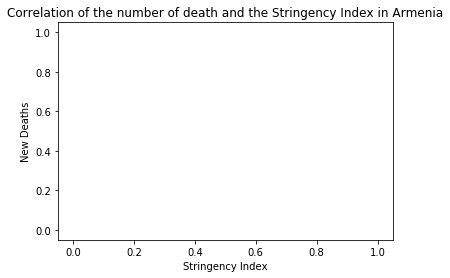

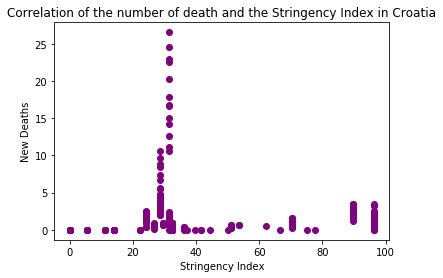

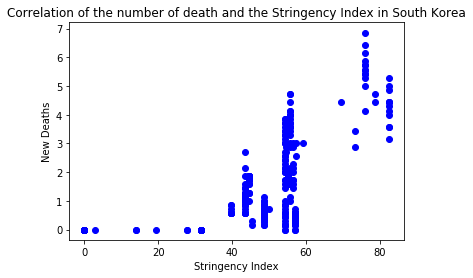

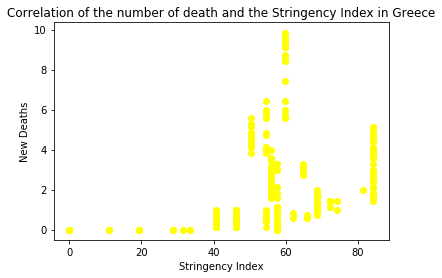

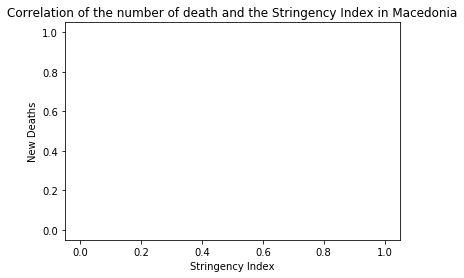

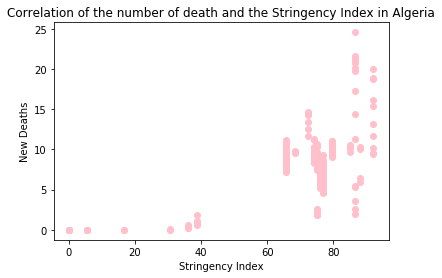

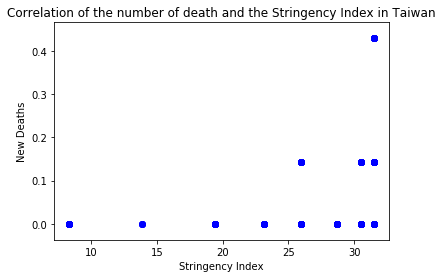

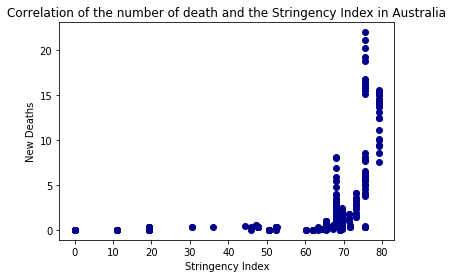

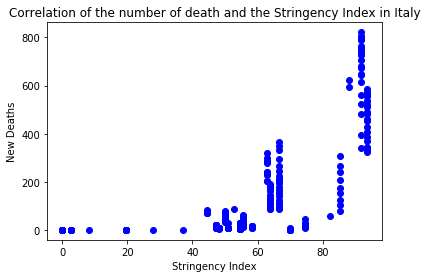

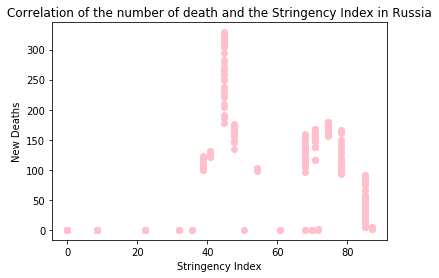

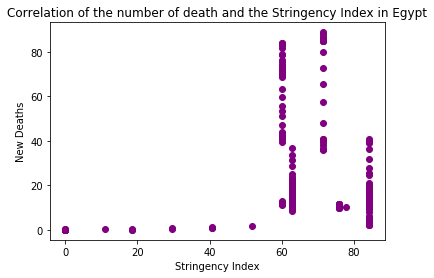

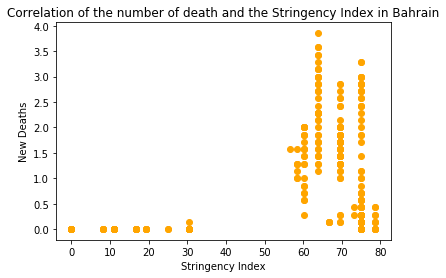

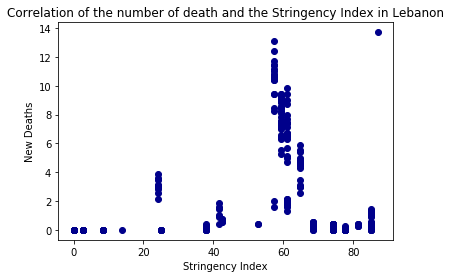

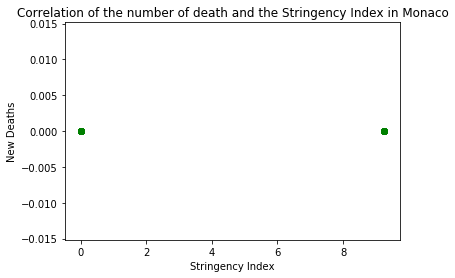

KeyboardInterrupt: 

In [342]:
for i in newData['location'].value_counts().index:
    y_axis = newData[newData['location']== i]['new_deaths_smoothed']
    x_axis = newData[newData['location']== i]['stringency_index']
    plt.scatter(x_axis,y_axis,color=colors[random.randrange(0,len(colors)-1)])
    plt.title("Correlation of "+ "the number of death and the Stringency Index in "+i)
    plt.ylabel('New Deaths')
    plt.xlabel('Stringency Index')
    plt.show()

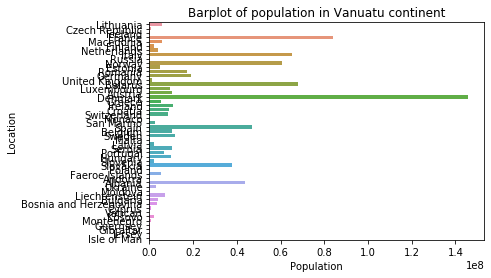

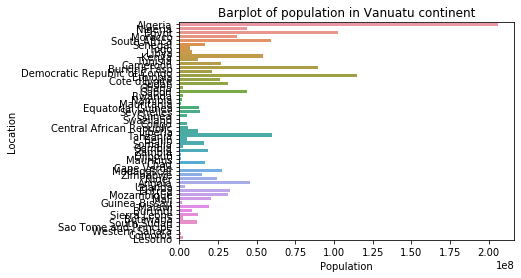

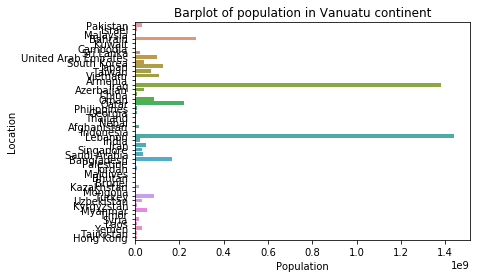

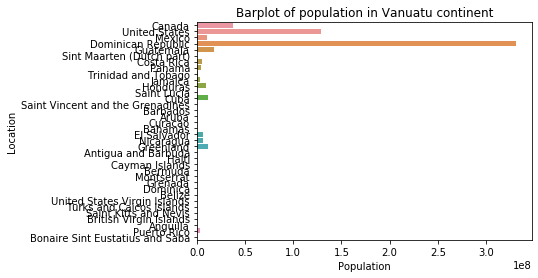

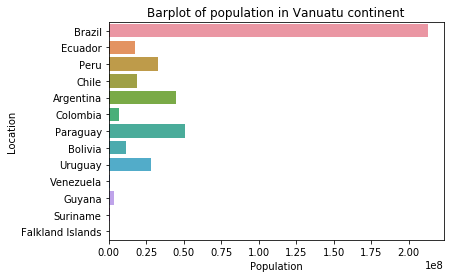

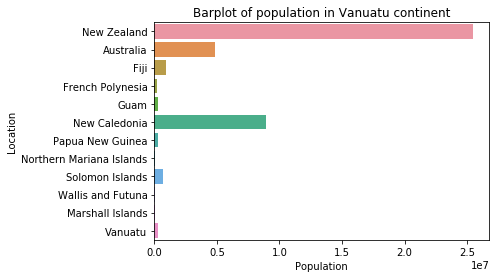

In [341]:
for i in newData['continent'].value_counts().index:
    population = newData[newData['continent'] == i]['population'].value_counts().index
    tick_label = newData[newData['continent'] == i]['location'].value_counts().index
    x_coordinate = np.arange(1,len(tick_label)+1)
    ax = sns.barplot(population, tick_label)
    ax.set_title("Barplot of population in "+ j +" continent")
    ax.set_xlabel("Population")
    ax.set_ylabel("Location")
    plt.show()

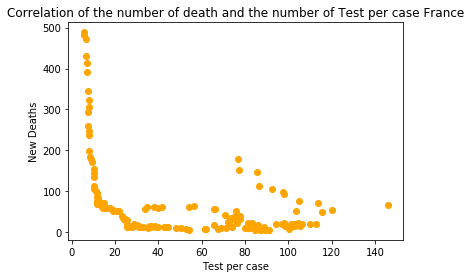

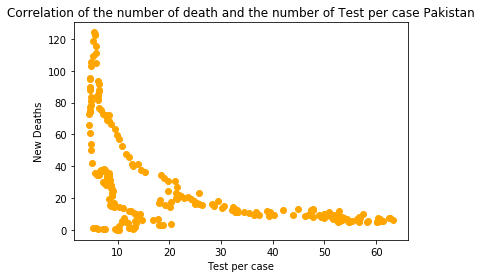

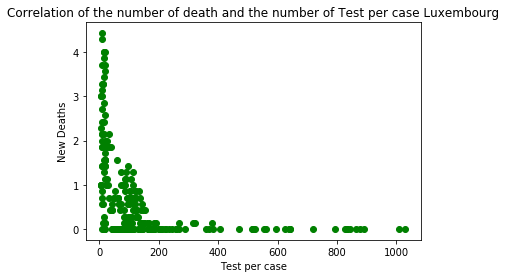

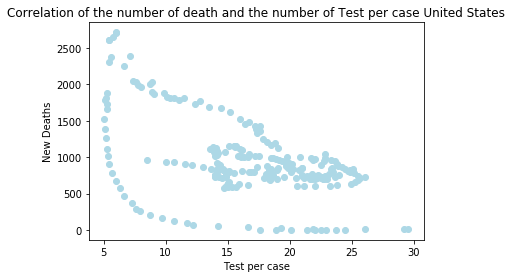

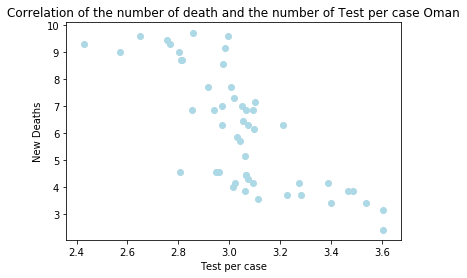

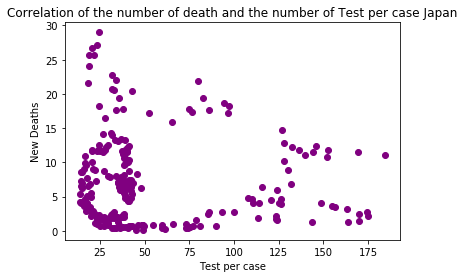

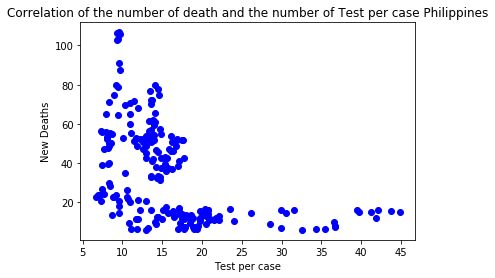

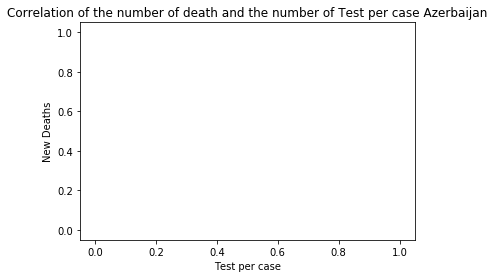

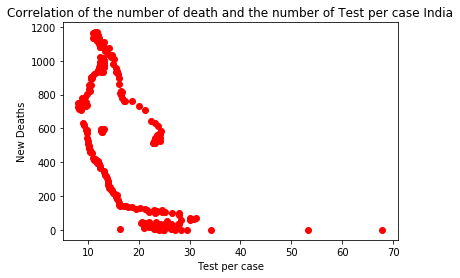

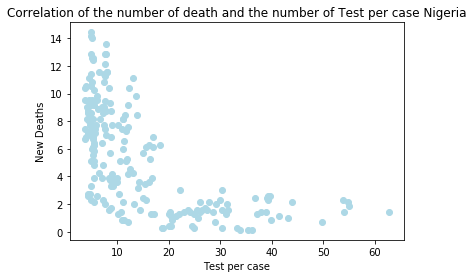

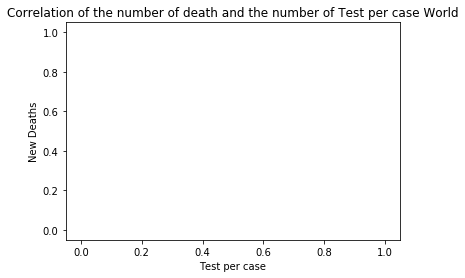

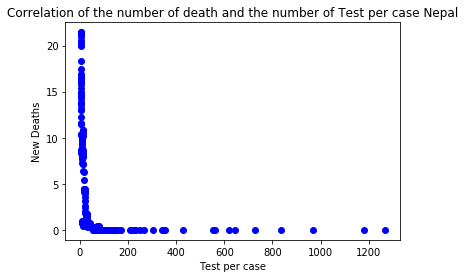

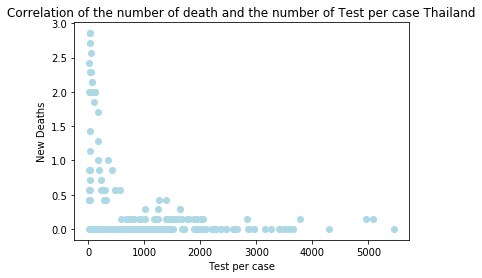

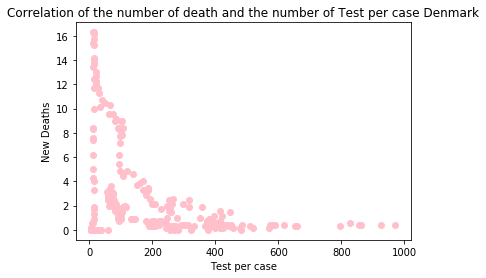

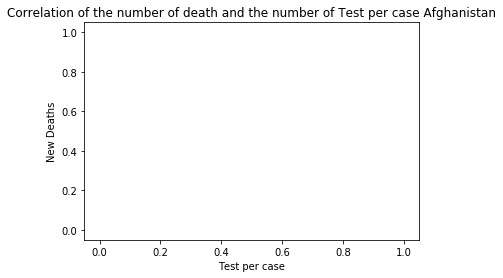

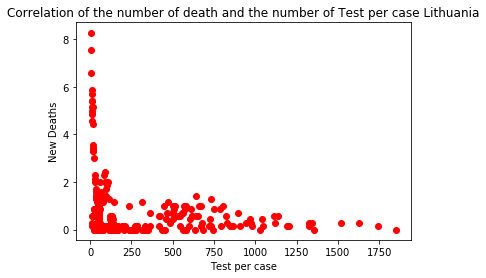

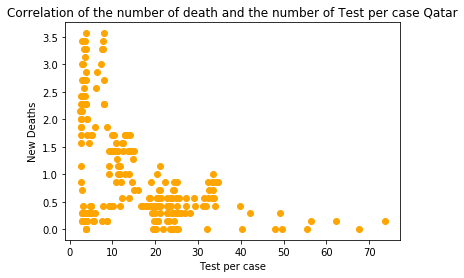

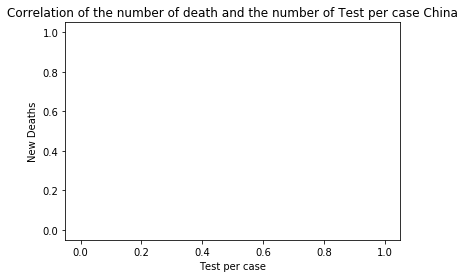

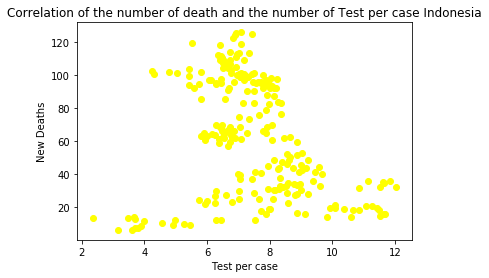

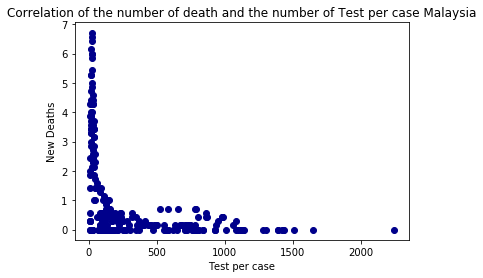

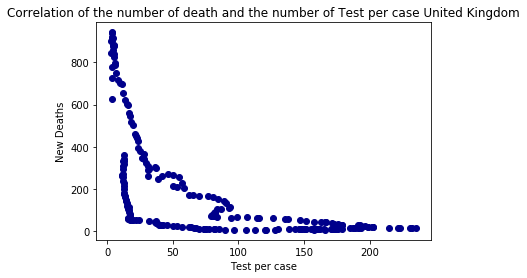

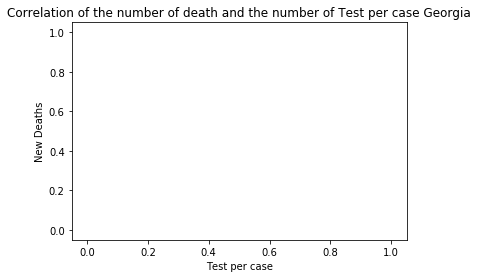

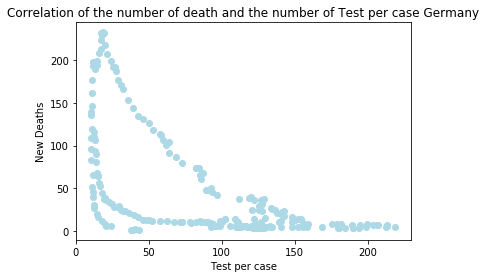

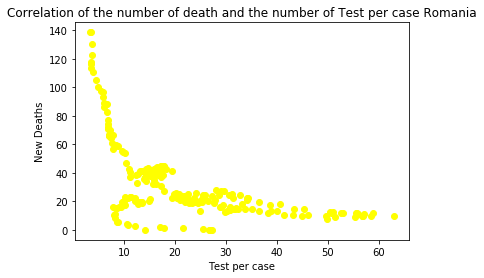

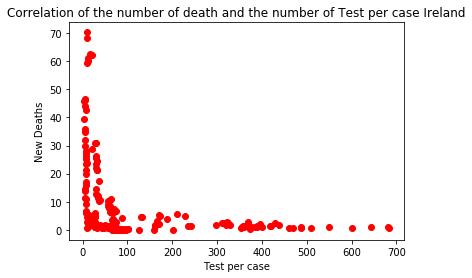

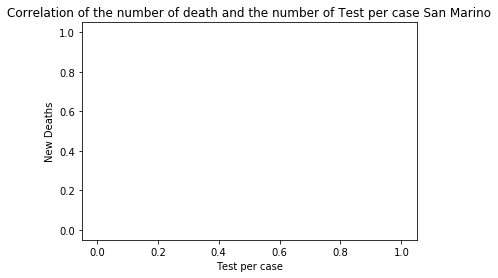

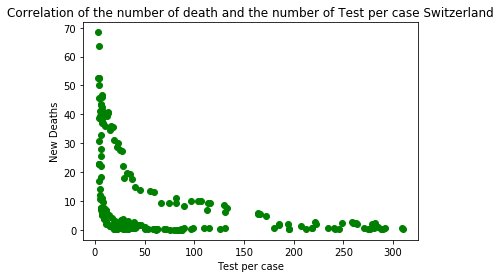

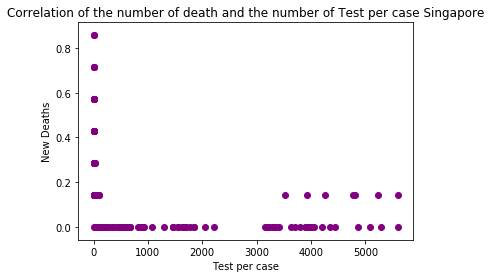

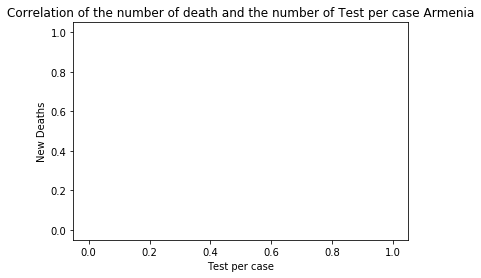

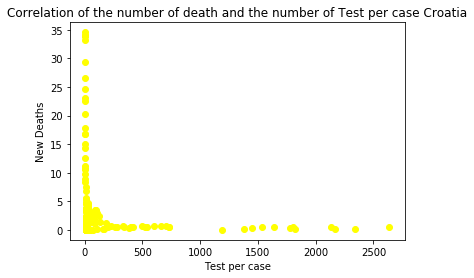

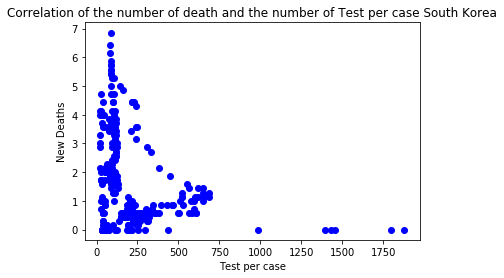

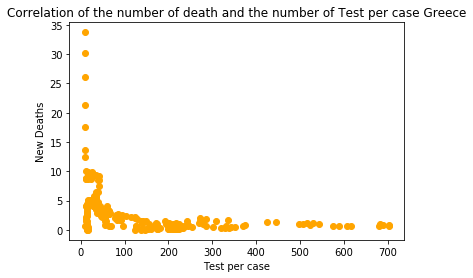

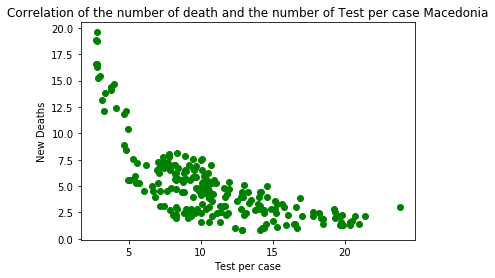

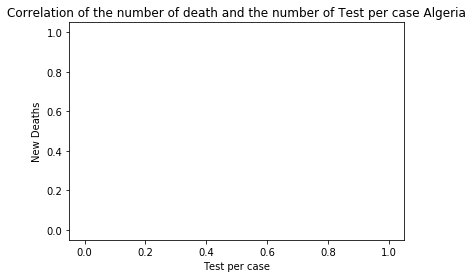

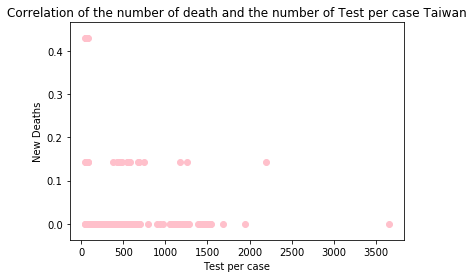

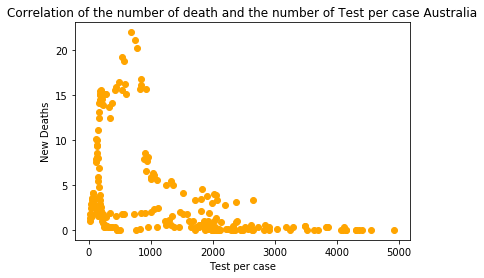

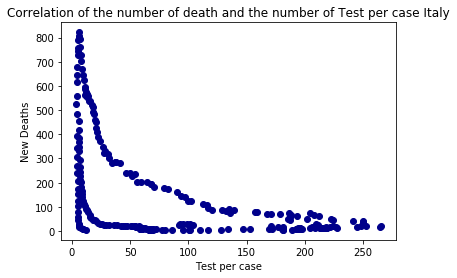

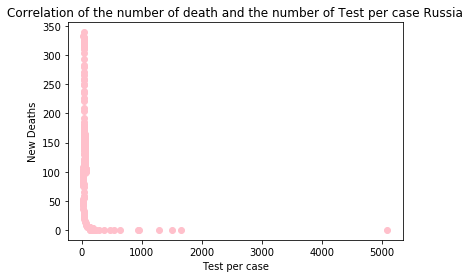

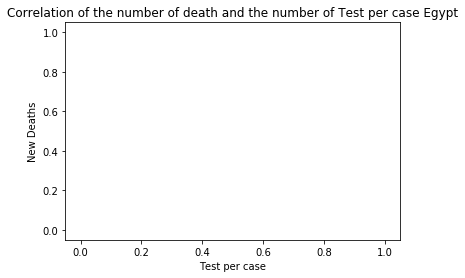

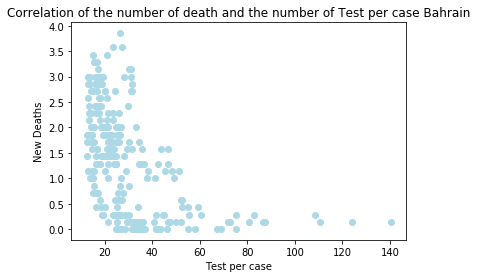

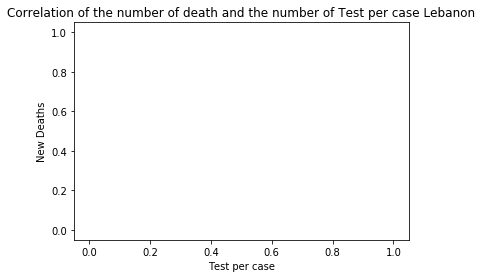

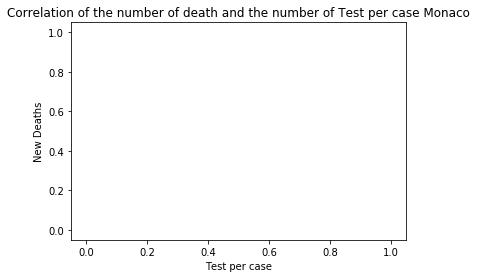

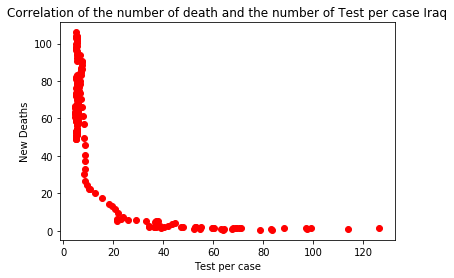

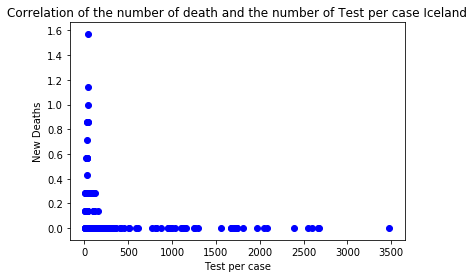

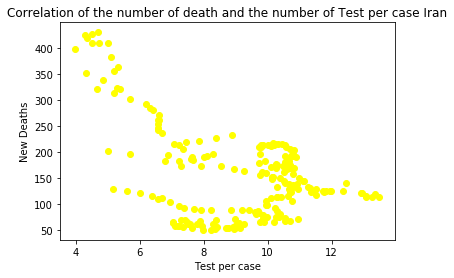

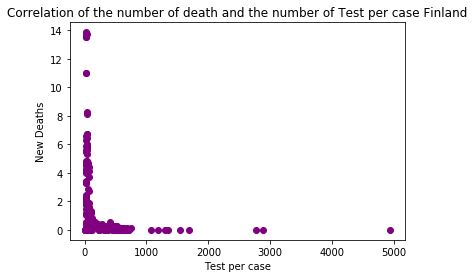

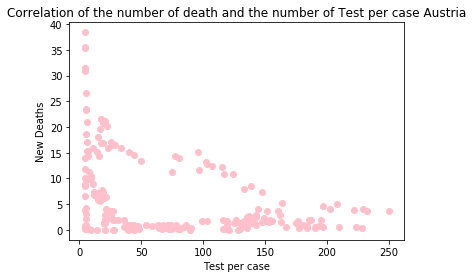

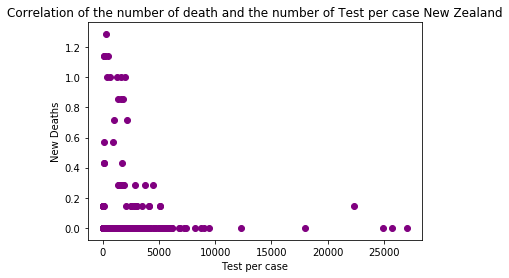

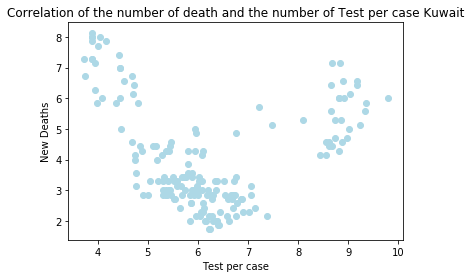

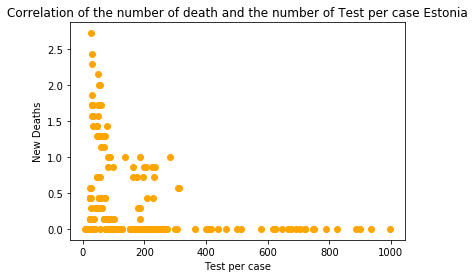

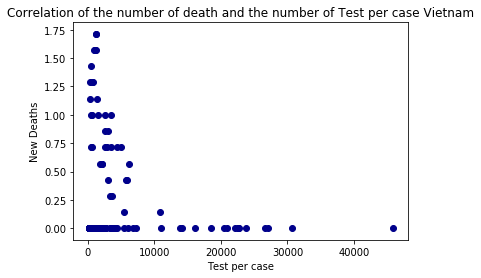

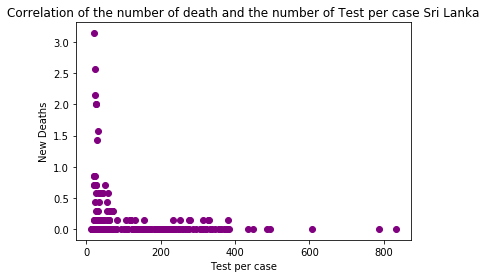

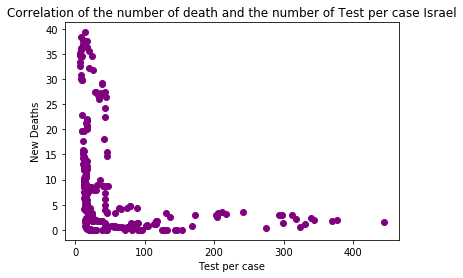

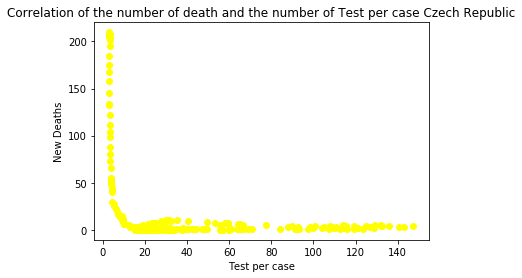

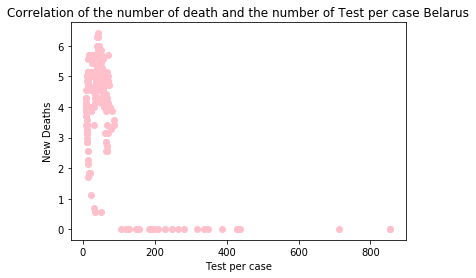

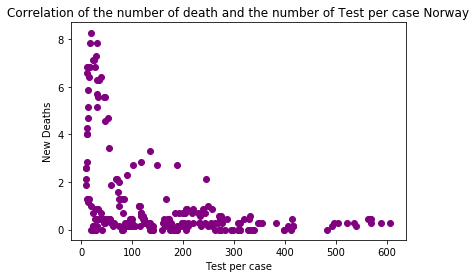

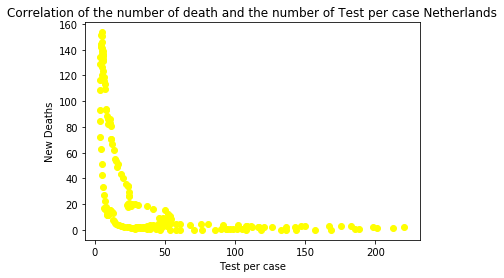

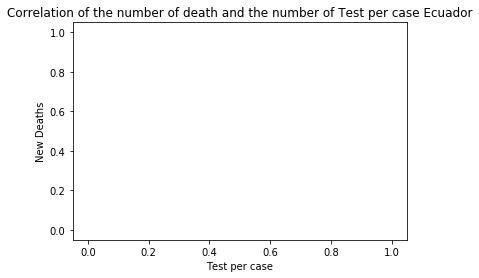

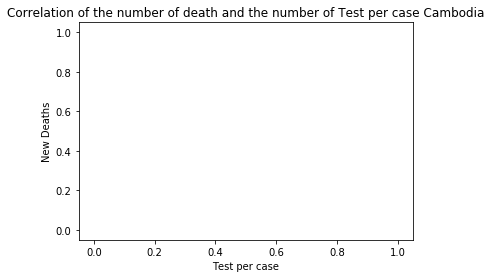

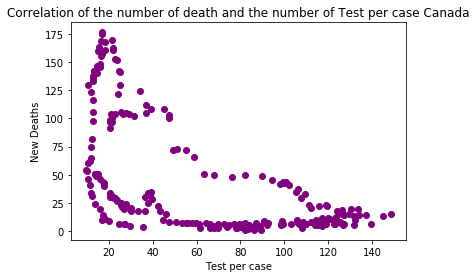

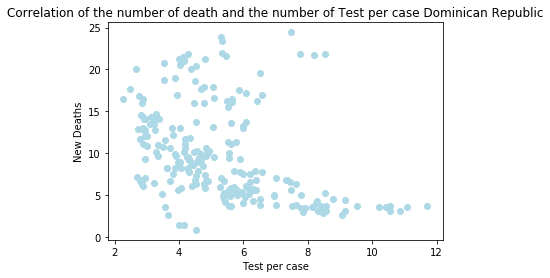

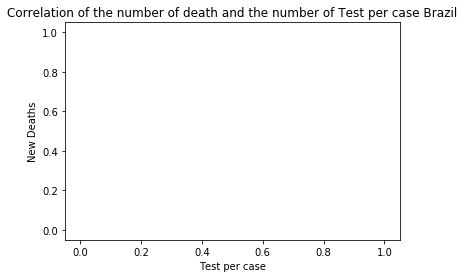

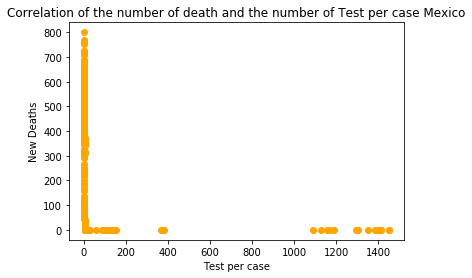

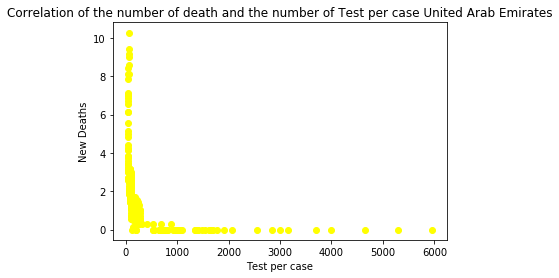

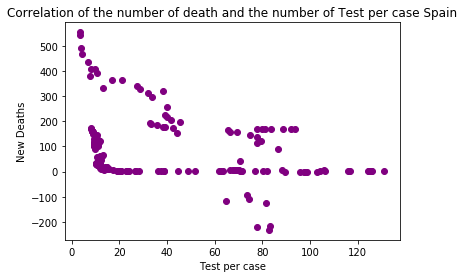

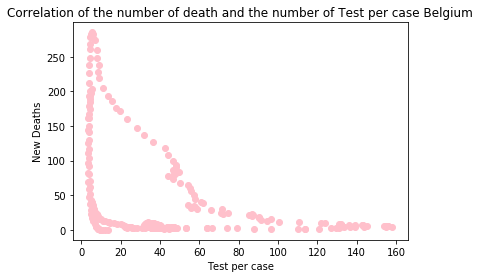

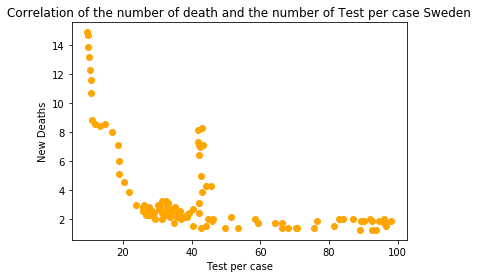

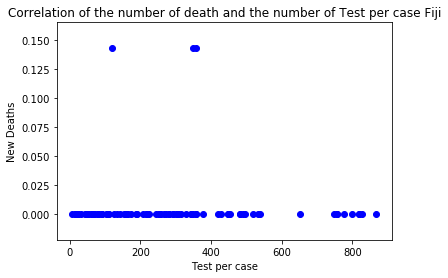

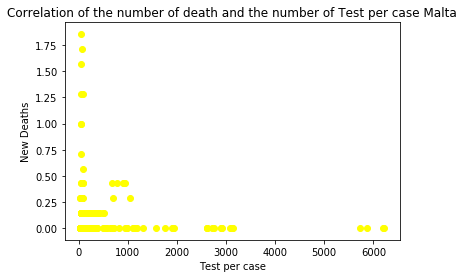

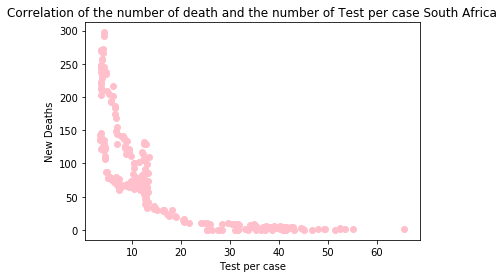

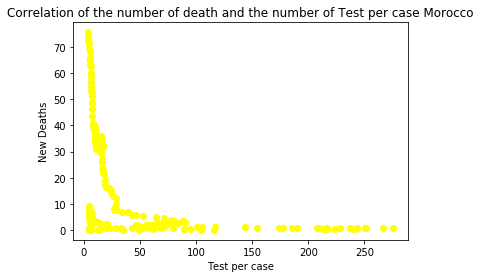

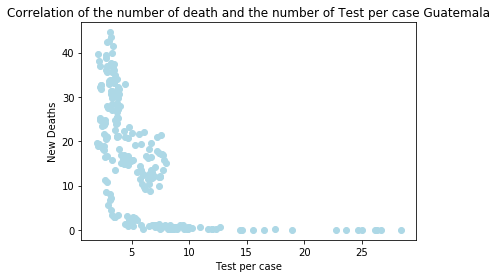

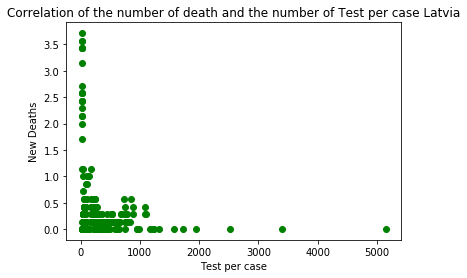

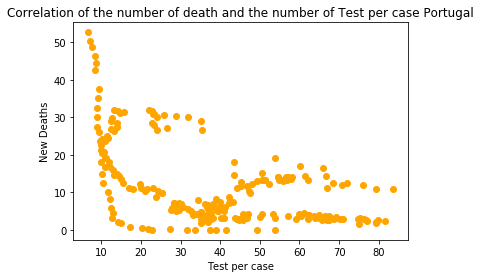

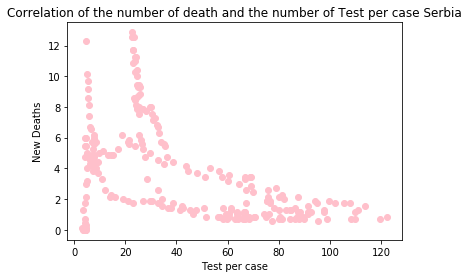

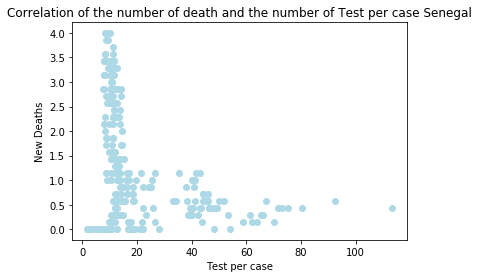

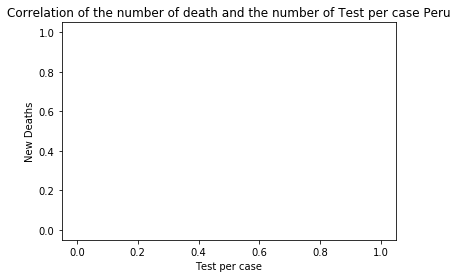

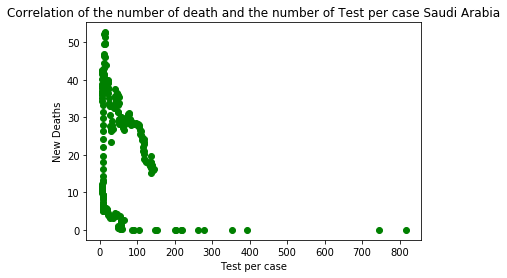

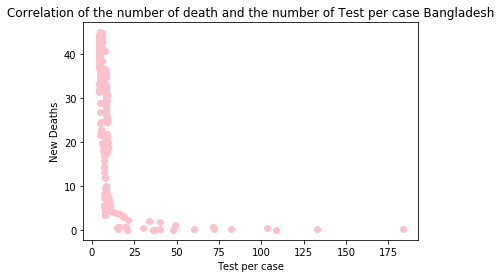

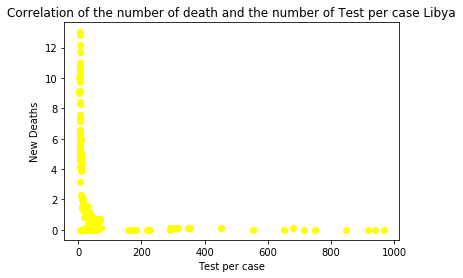

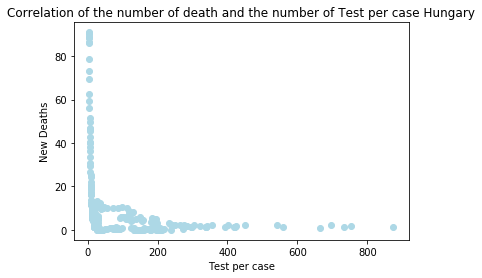

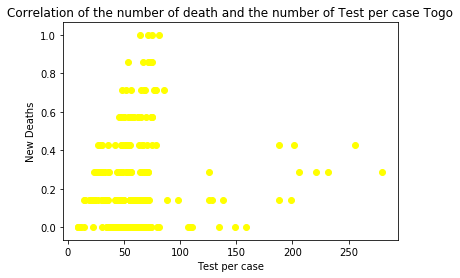

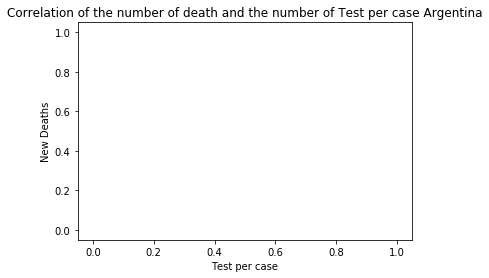

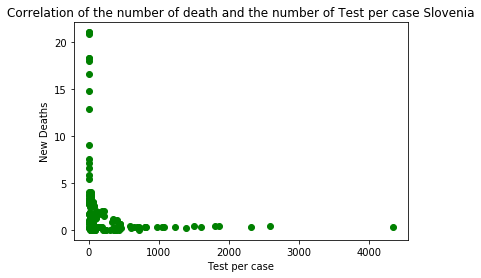

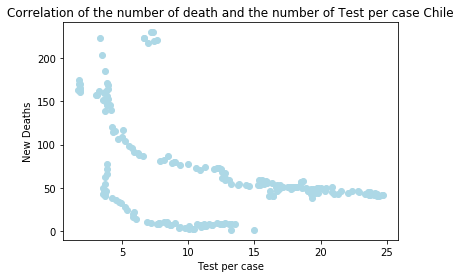

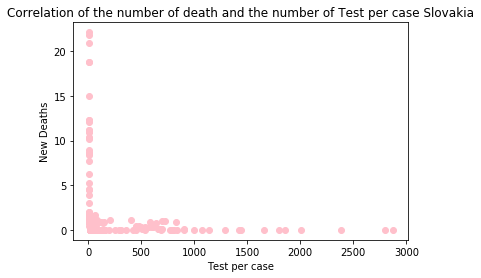

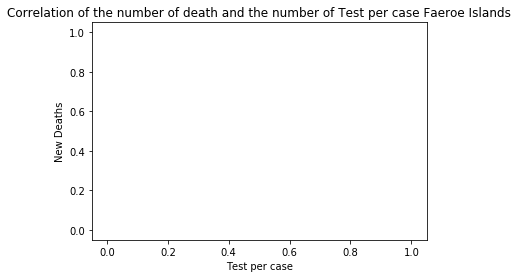

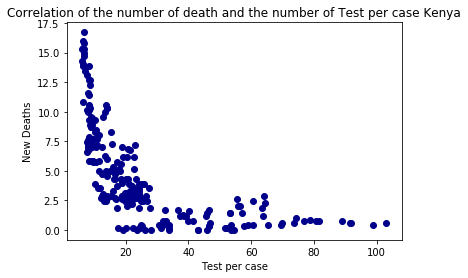

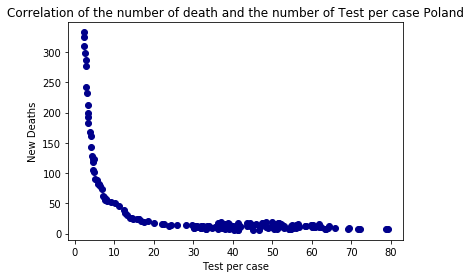

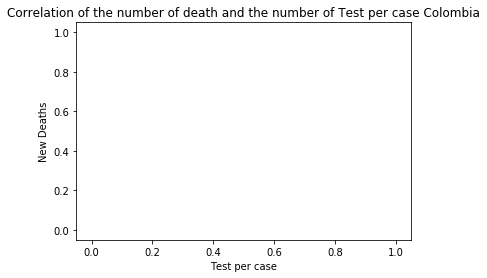

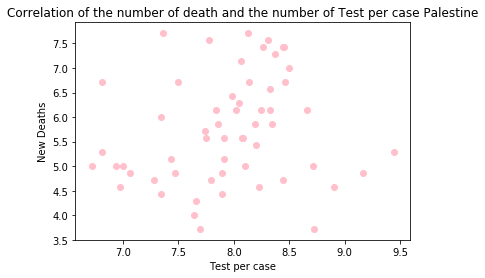

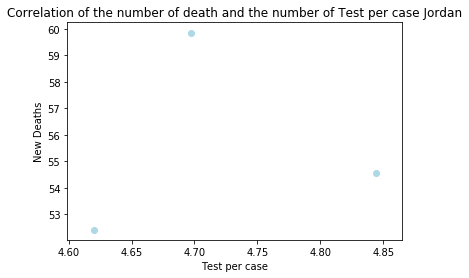

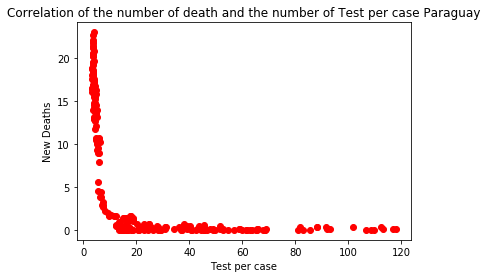

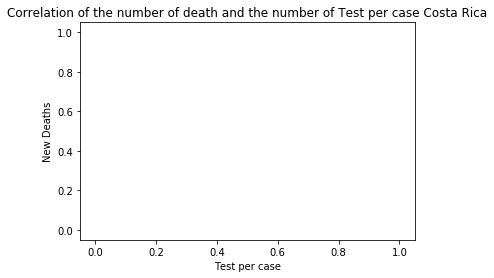

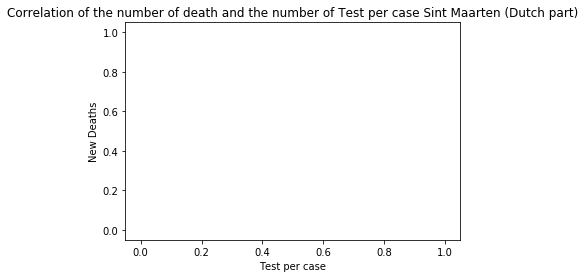

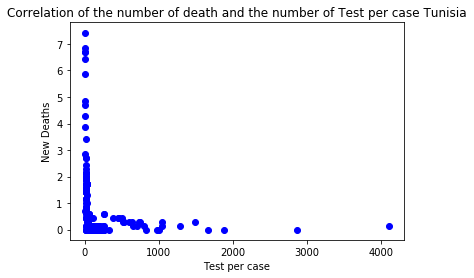

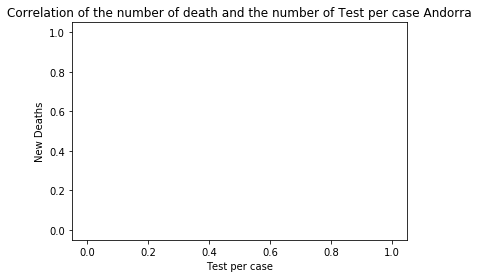

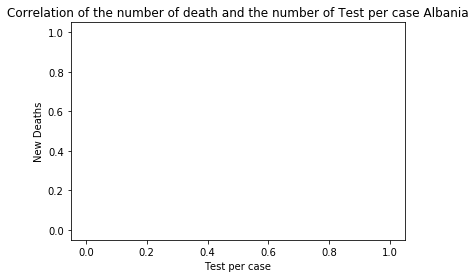

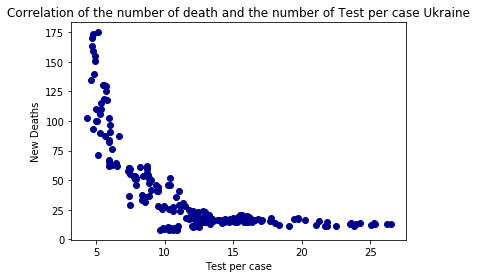

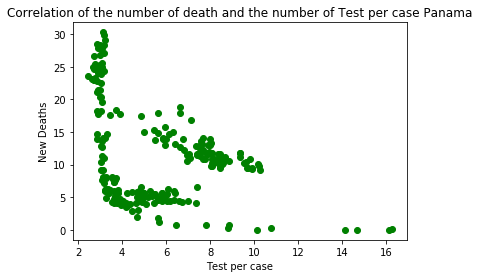

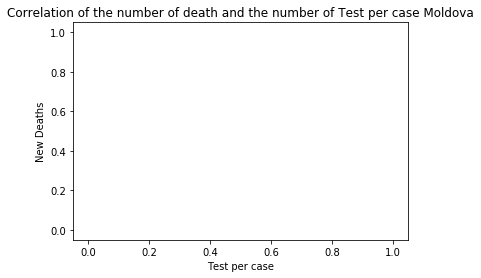

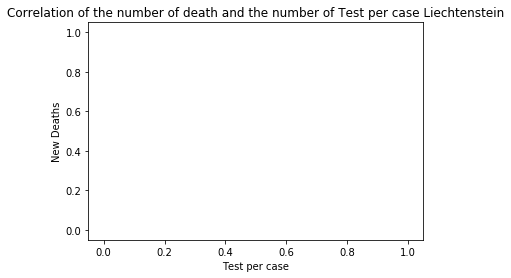

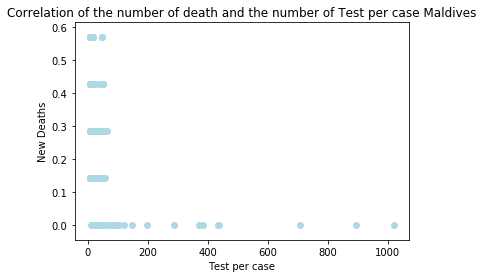

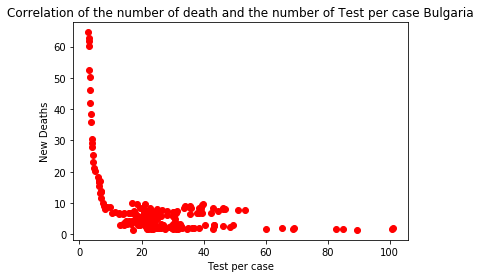

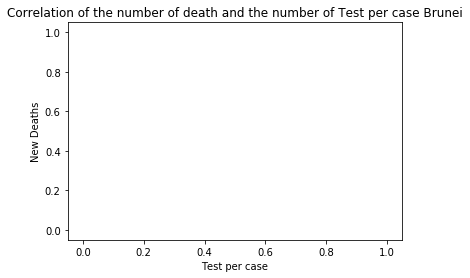

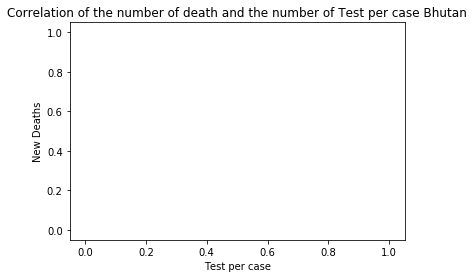

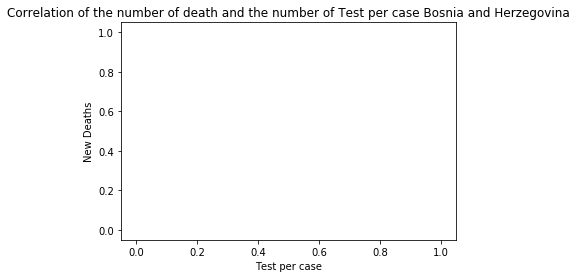

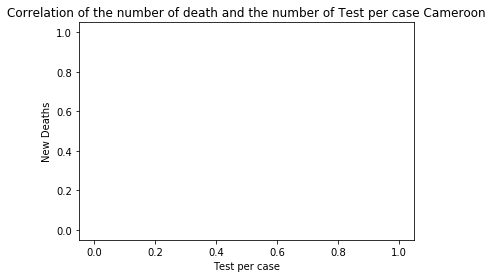

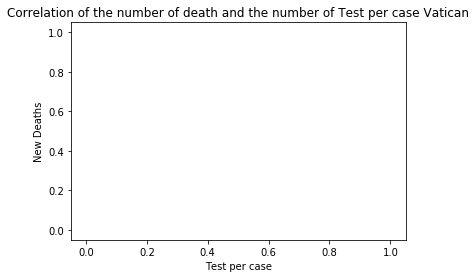

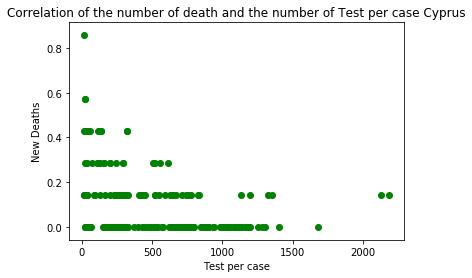

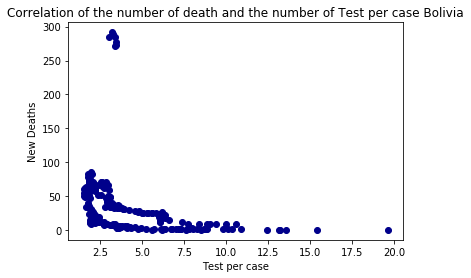

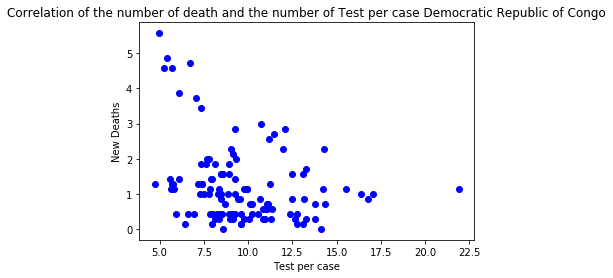

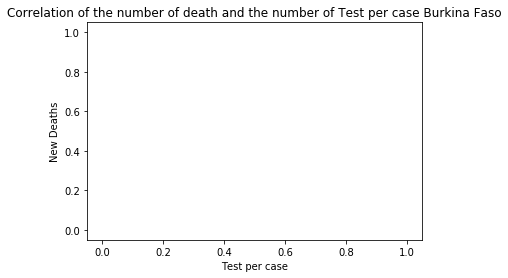

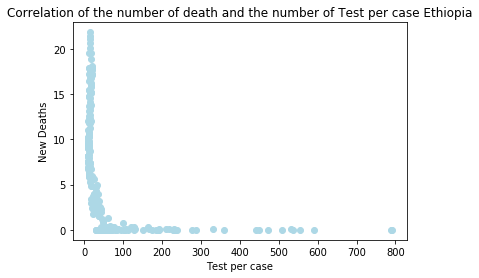

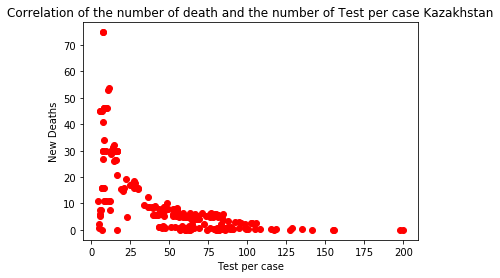

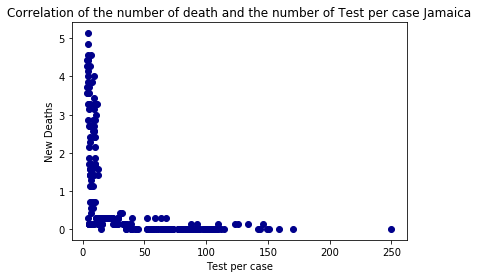

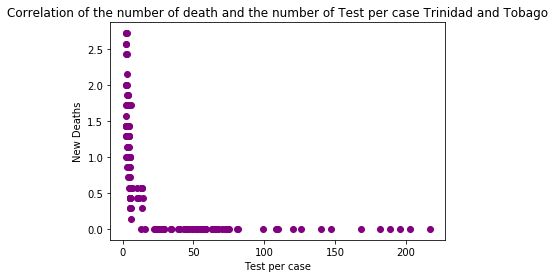

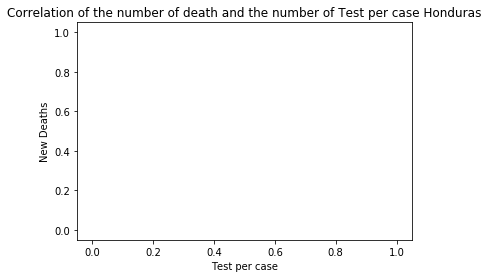

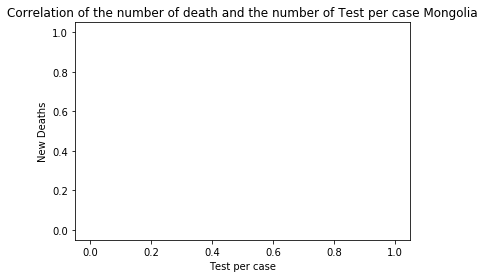

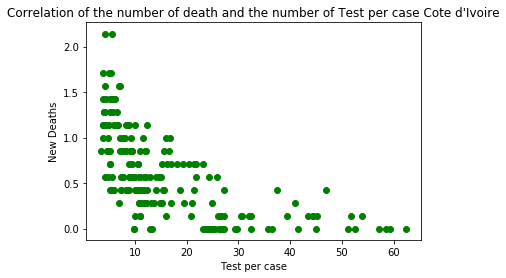

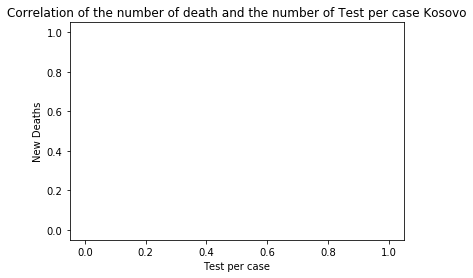

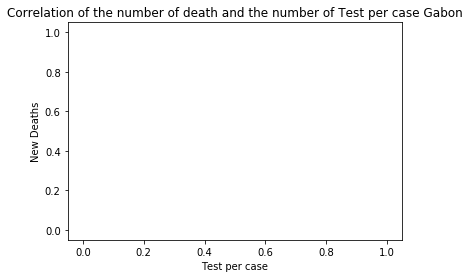

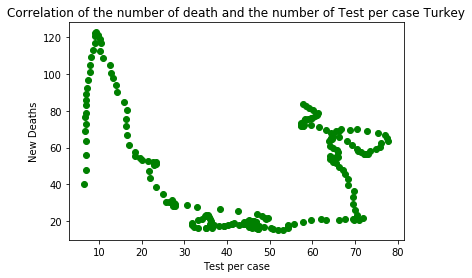

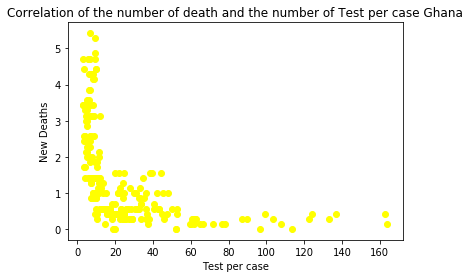

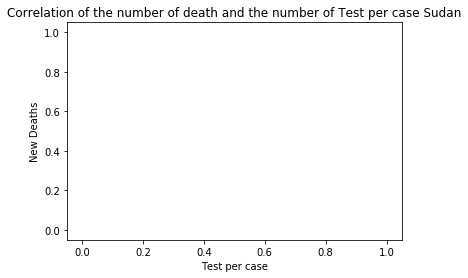

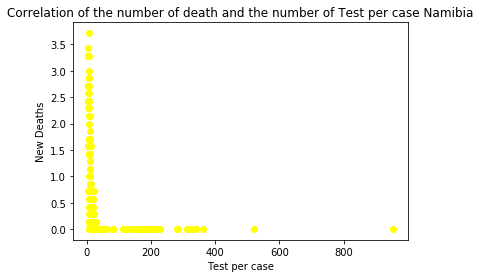

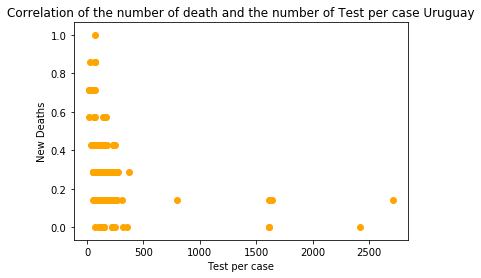

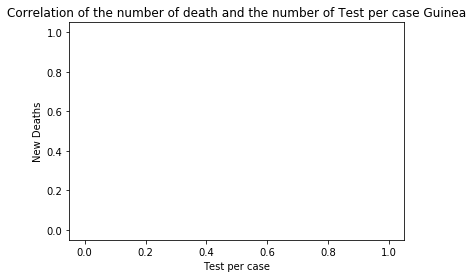

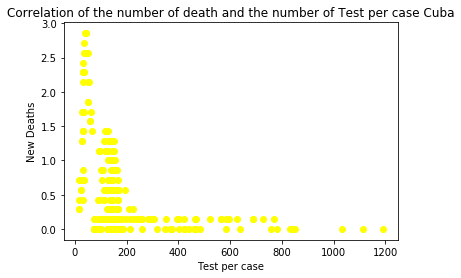

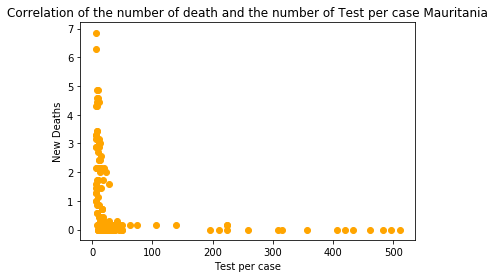

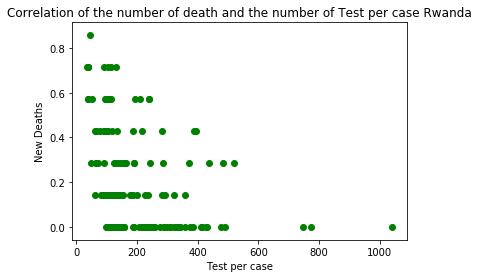

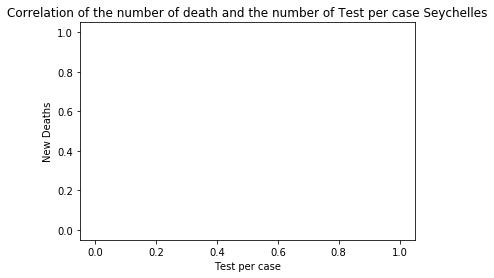

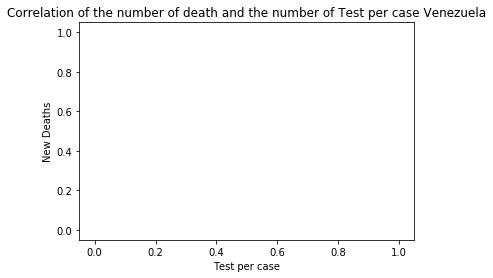

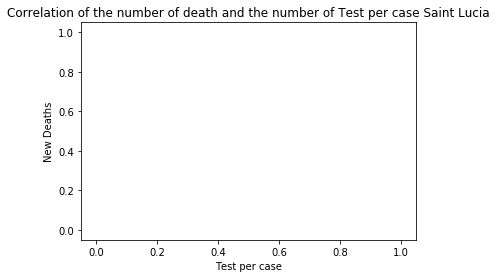

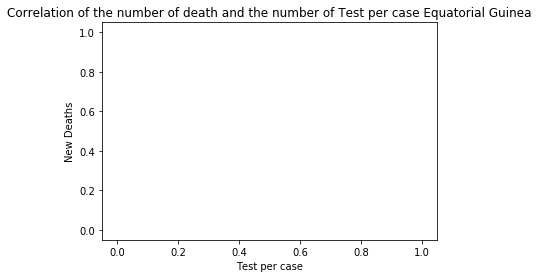

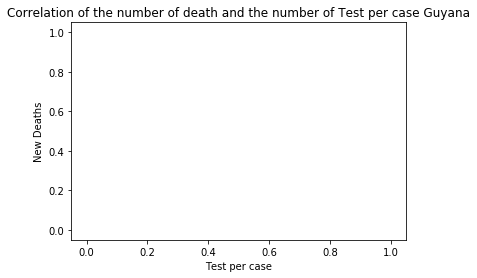

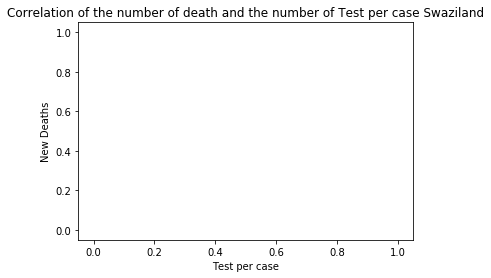

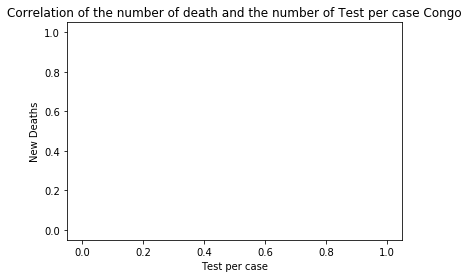

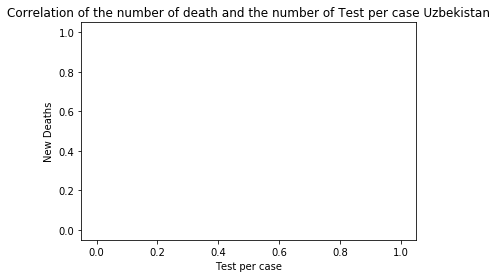

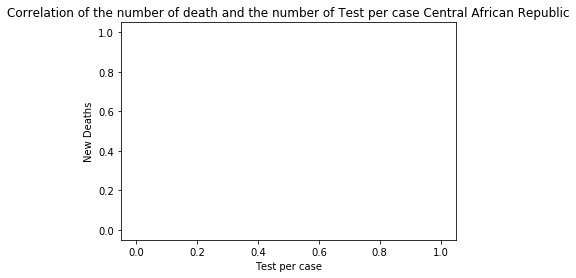

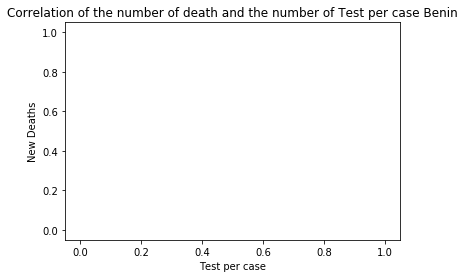

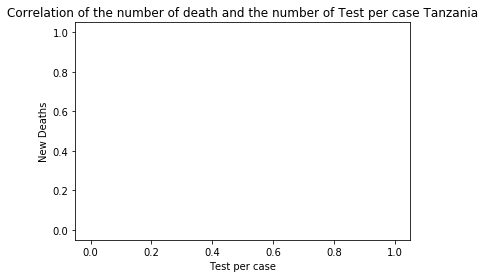

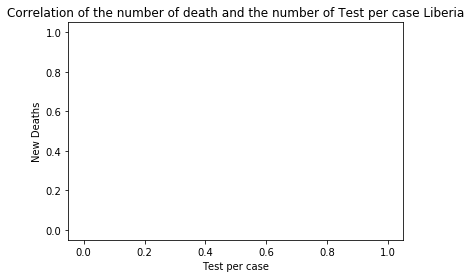

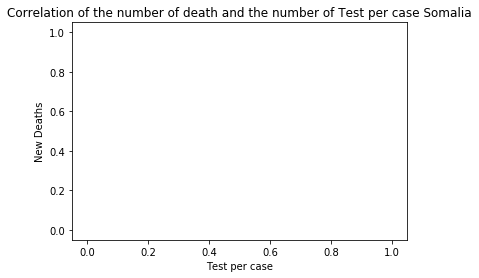

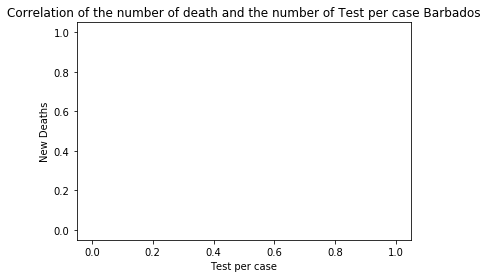

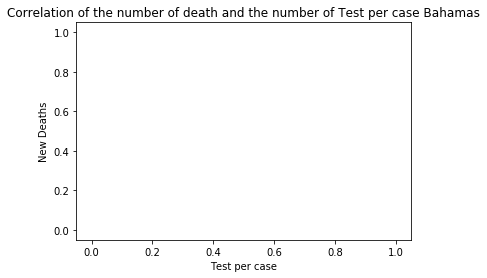

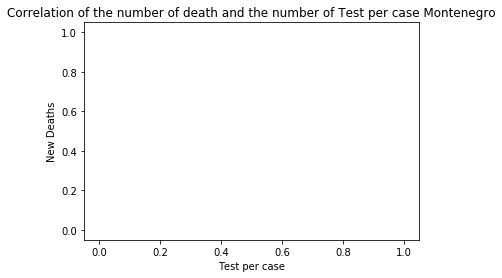

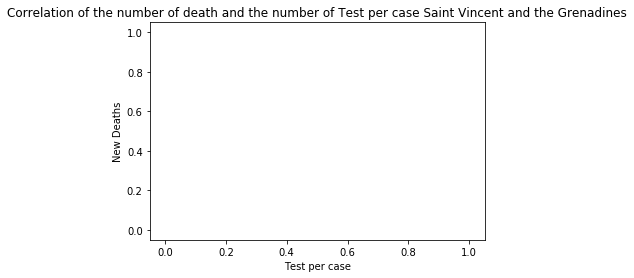

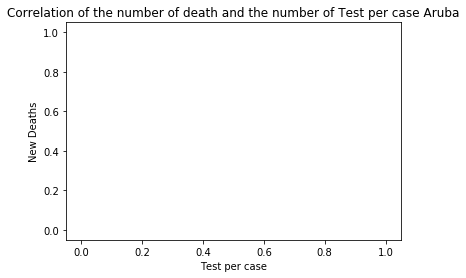

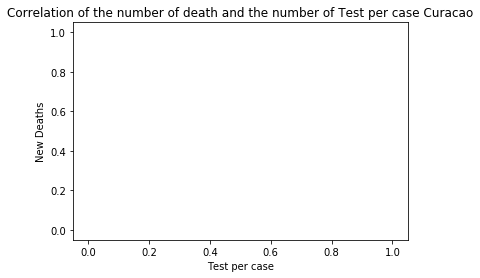

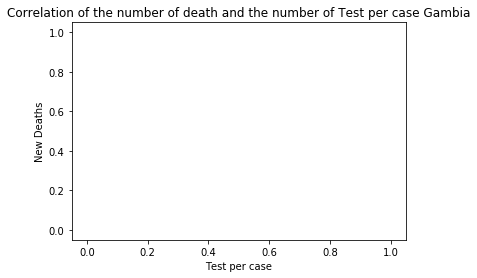

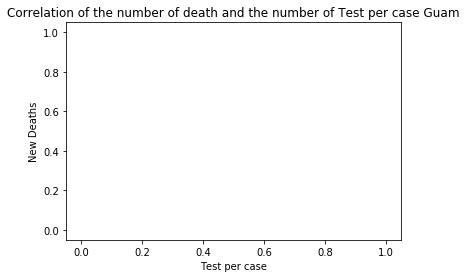

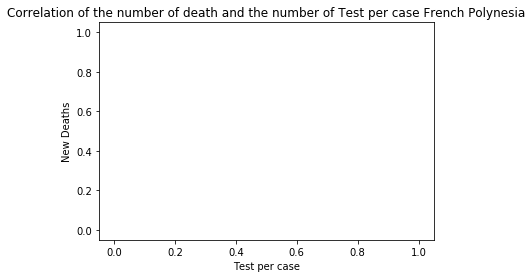

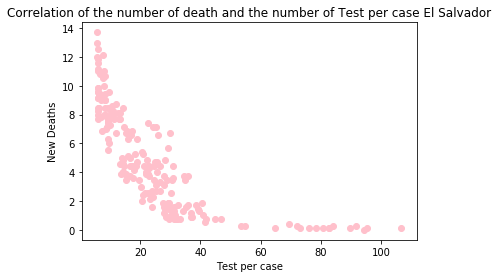

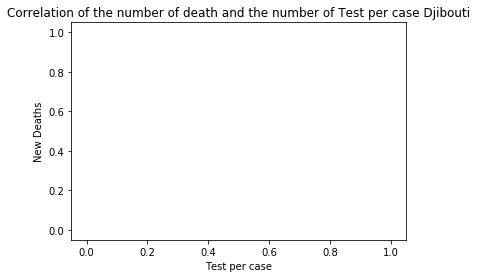

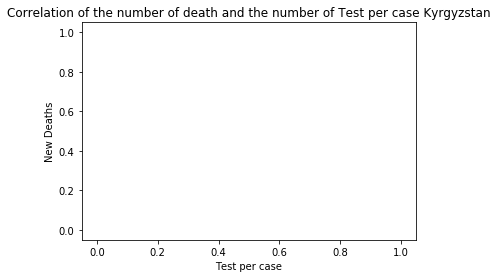

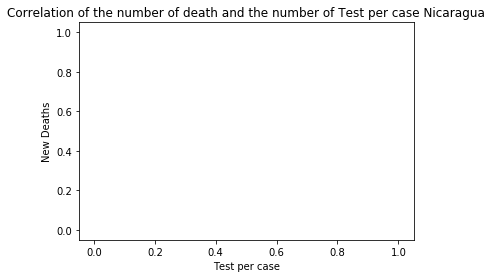

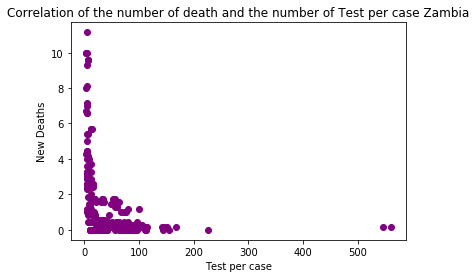

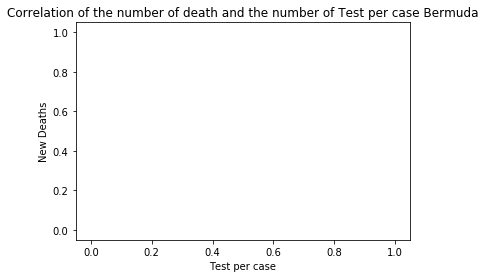

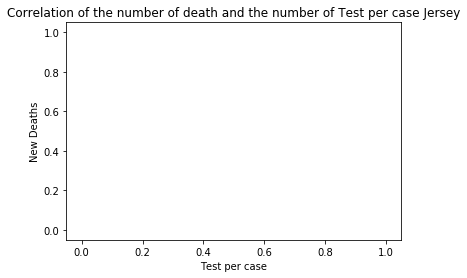

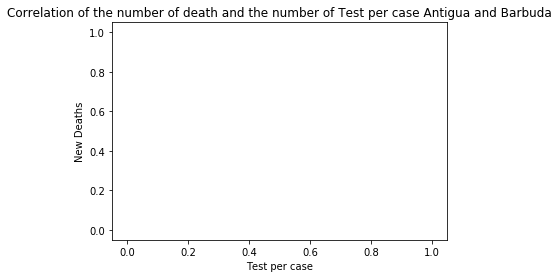

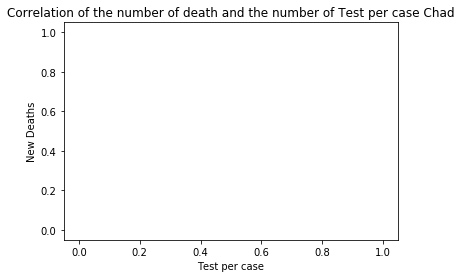

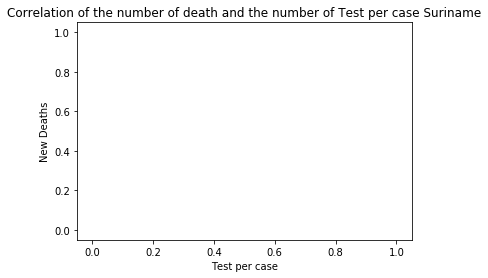

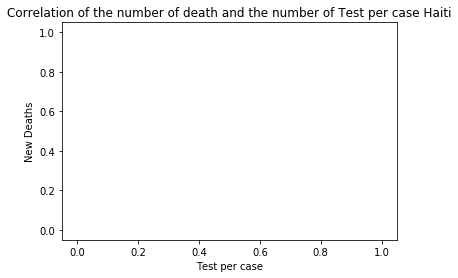

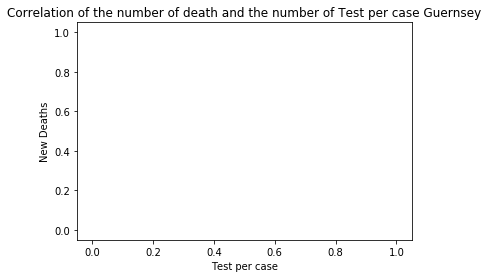

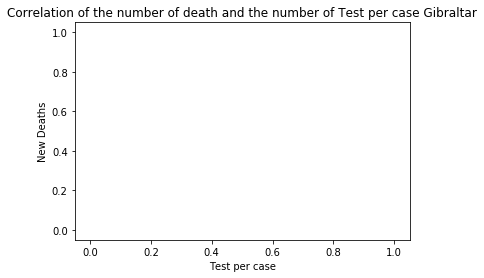

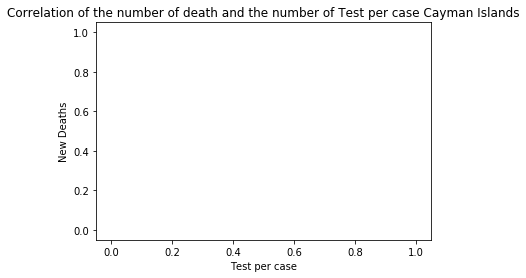

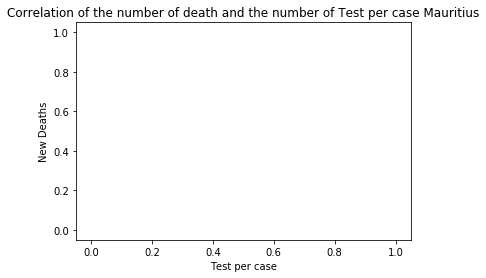

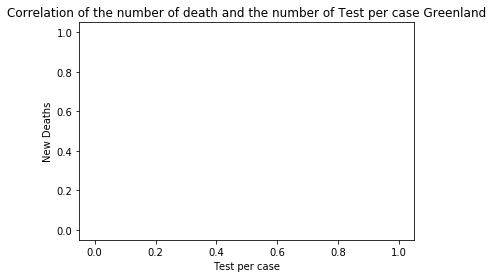

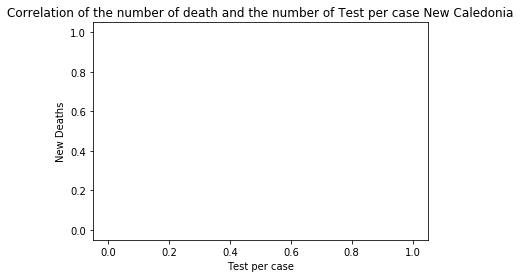

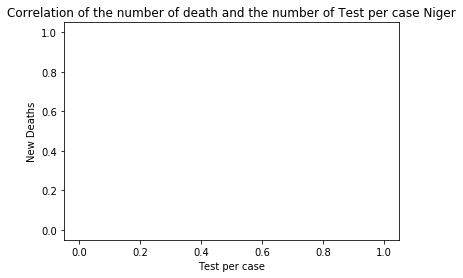

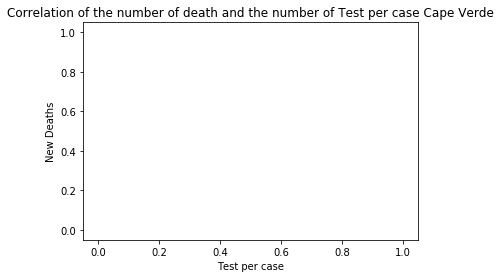

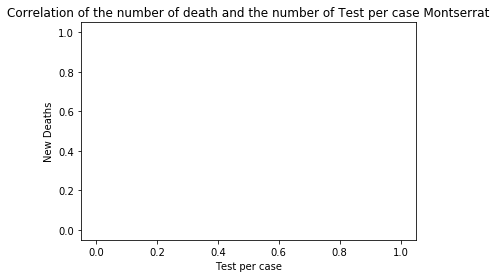

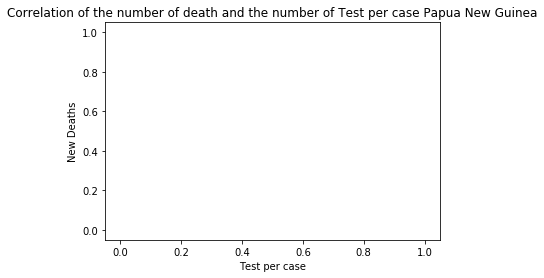

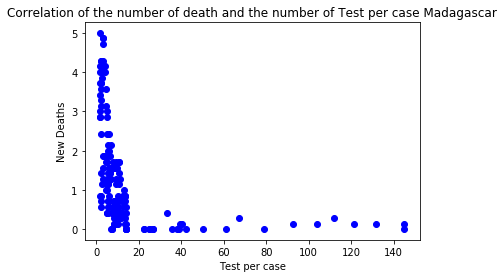

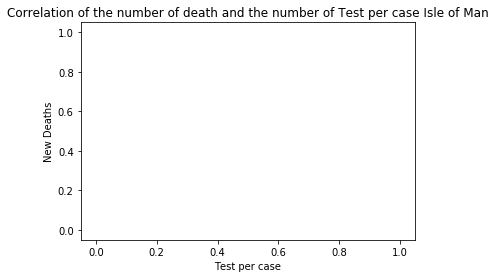

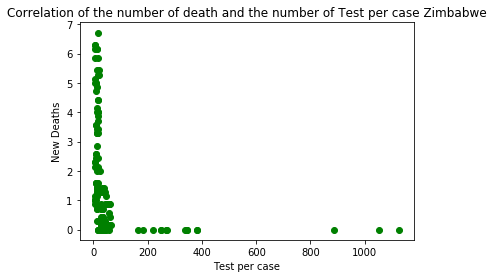

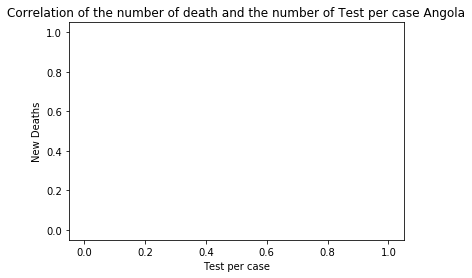

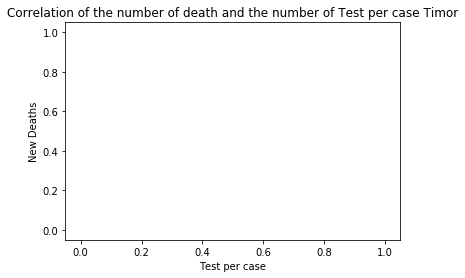

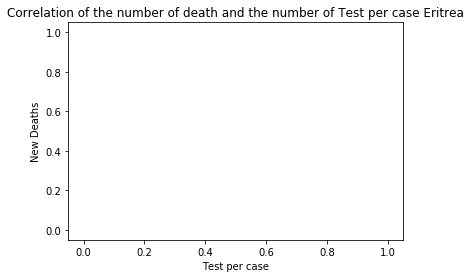

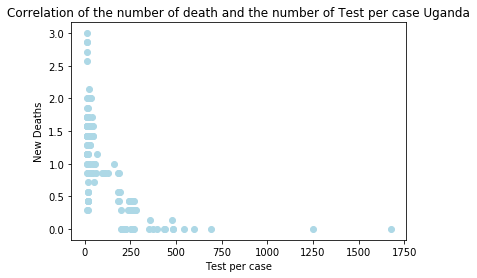

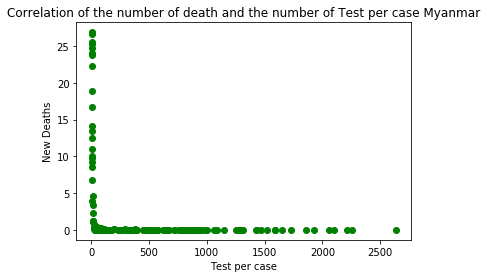

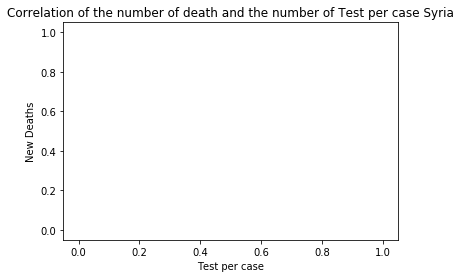

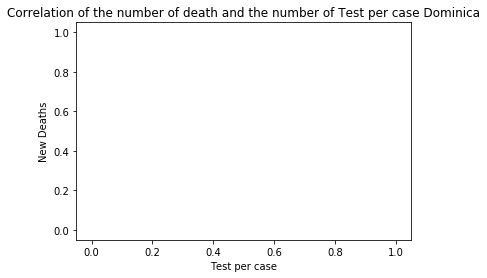

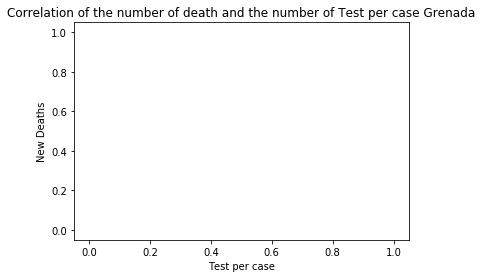

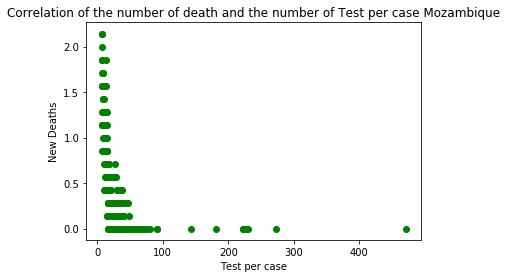

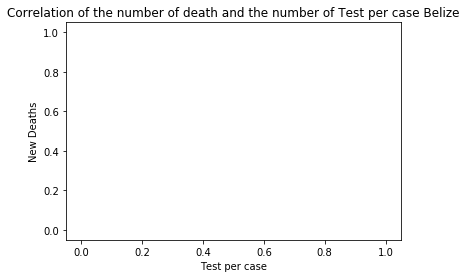

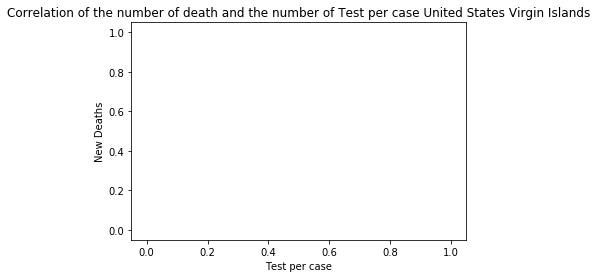

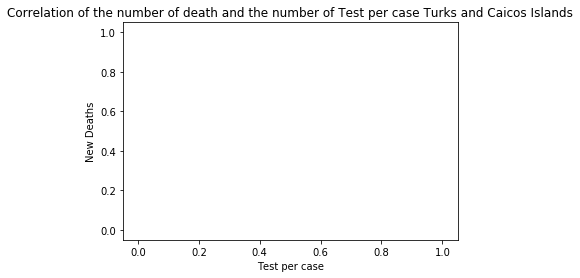

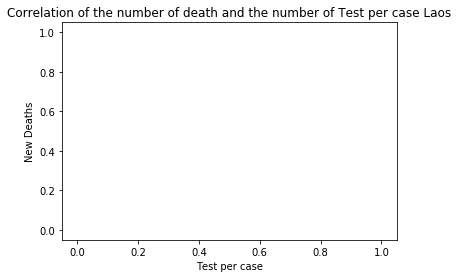

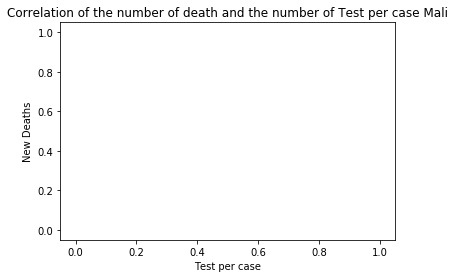

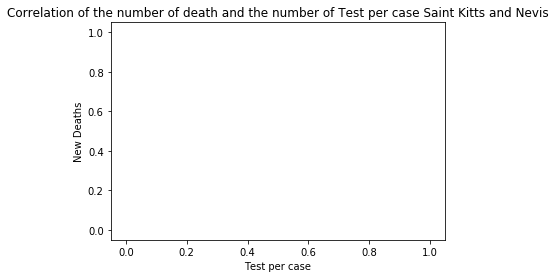

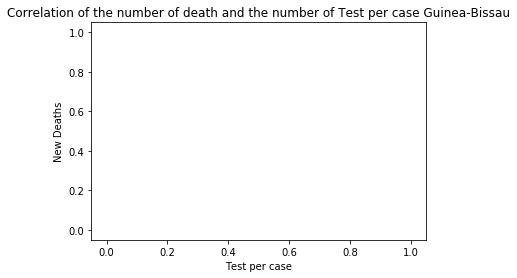

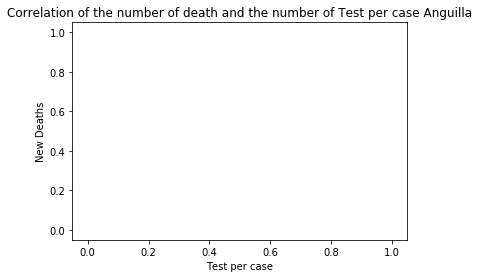

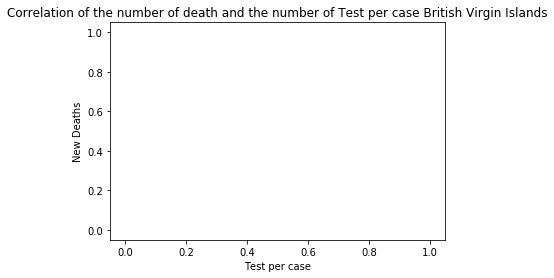

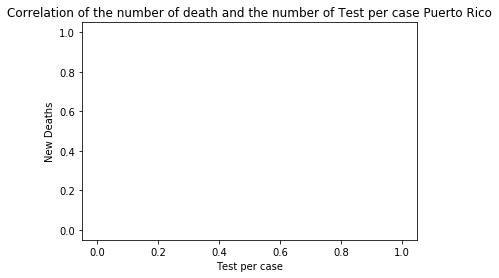

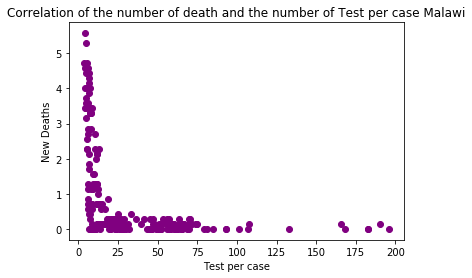

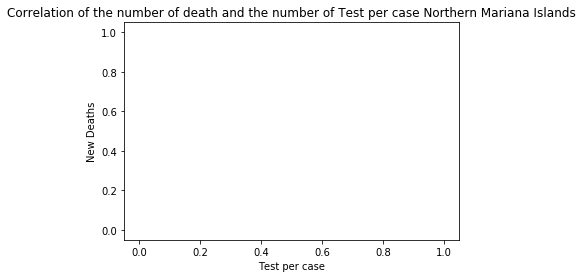

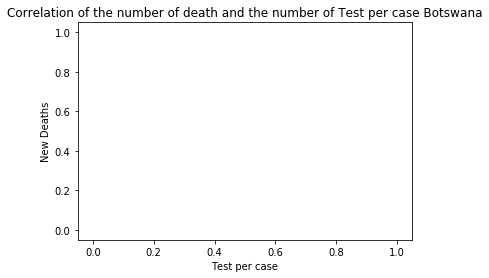

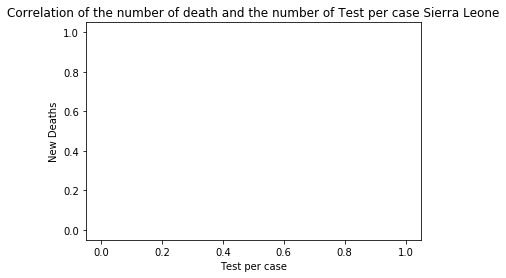

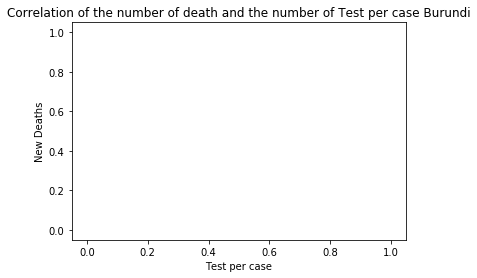

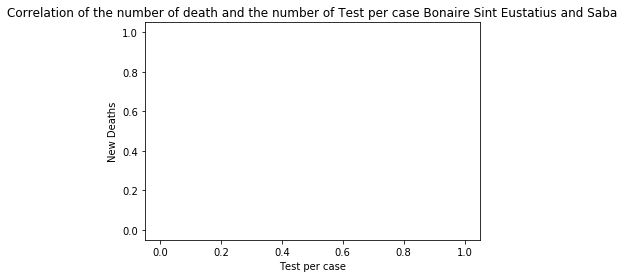

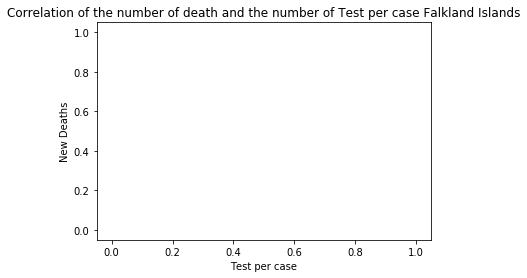

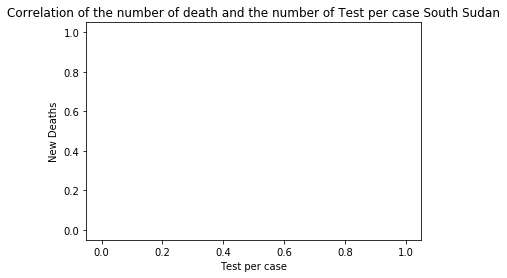

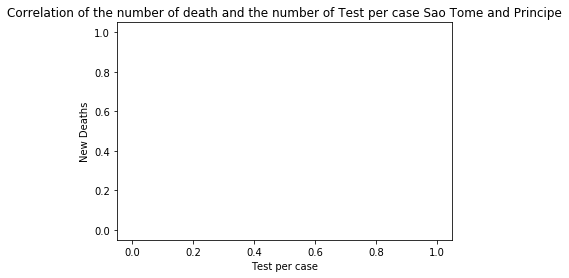

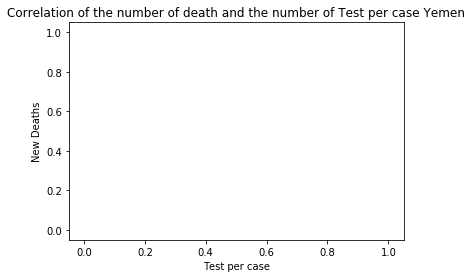

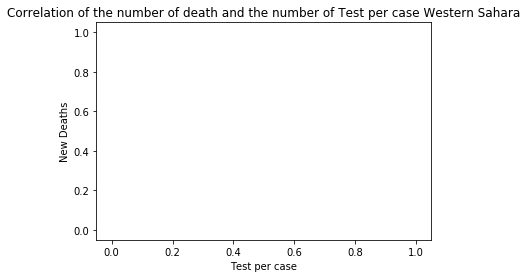

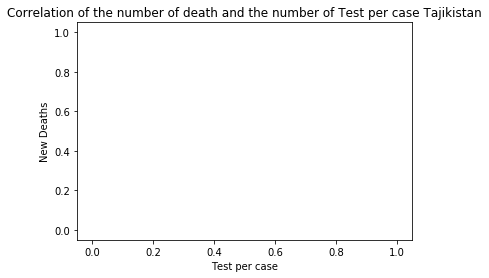

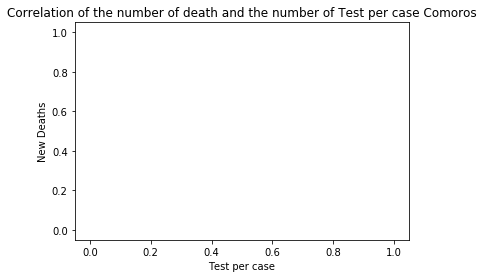

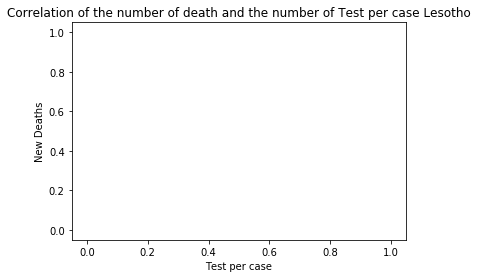

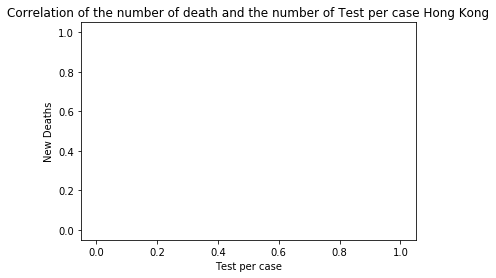

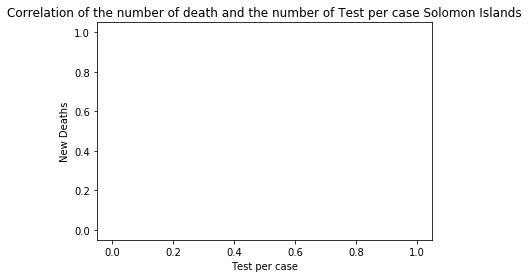

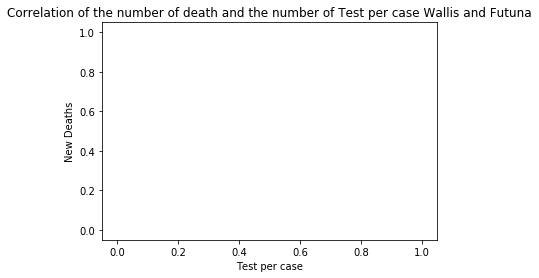

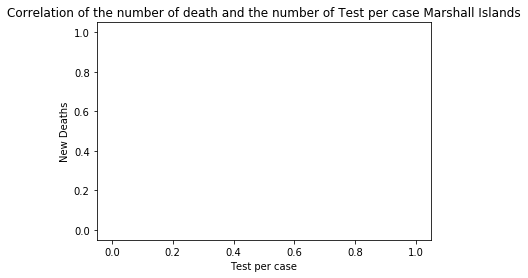

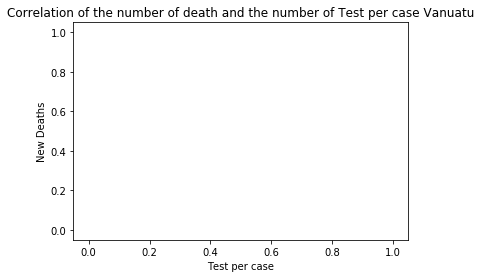

In [357]:
for i in newData['location'].value_counts().index:
    y_axis = newData[newData['location']== i]['new_deaths_smoothed']
    x_axis = newData[newData['location']== i]['tests_per_case']
    plt.scatter(x_axis,y_axis,color=colors[random.randrange(0,len(colors)-1)])
    plt.title("Correlation of "+ "the number of death and the number of Test per case "+i)
    plt.ylabel('New Deaths')
    plt.xlabel('Test per case')
    plt.show()

In [17]:
pd.pivot_table(training, index = 'continent', columns = 'location', values = 'id' ,aggfunc ='count')

location       Afghanistan  Albania  Algeria  Andorra  Angola  Anguilla  \
continent                                                                 
Africa                 NaN      NaN    256.0      NaN   191.0       NaN   
Asia                 256.0      NaN      NaN      NaN     NaN       NaN   
Europe                 NaN    201.0      NaN    202.0     NaN       NaN   
North America          NaN      NaN      NaN      NaN     NaN     187.0   
Oceania                NaN      NaN      NaN      NaN     NaN       NaN   
South America          NaN      NaN      NaN      NaN     NaN       NaN   

location       Antigua and Barbuda  Argentina  Armenia  Aruba  ...  \
continent                                                      ...   
Africa                         NaN        NaN      NaN    NaN  ...   
Asia                           NaN        NaN    256.0    NaN  ...   
Europe                         NaN        NaN      NaN    NaN  ...   
North America                192.0        NaN      NaN  194.0  ...   
Oceania                        NaN        NaN      NaN    NaN  ...   
South America                  NaN      204.0      NaN    NaN  ...   

location       Uzbekistan  Vanuatu  Vatican  Venezuela  Vietnam  \
continent                                                         
Africa                NaN      NaN      NaN        NaN      NaN   
Asia                196.0      NaN      NaN        NaN    256.0   
Europe                NaN      NaN    199.0        NaN      NaN   
North America         NaN      NaN      NaN        NaN      NaN   
Oceania               NaN      4.0      NaN        NaN      NaN   
South America         NaN      NaN      NaN      196.0      NaN   

location       Wallis and Futuna  Western Sahara  Yemen  Zambia  Zimbabwe  
continent                                                                  
Africa                       NaN           163.0    NaN   193.0     192.0  
Asia                         NaN             NaN  176.0     NaN       NaN  
Europe                       NaN             NaN    NaN     NaN       NaN  
North America                NaN             NaN    NaN     NaN       NaN  
Oceania                     24.0             NaN    NaN     NaN       NaN  
South America                NaN             NaN    NaN     NaN       NaN  

[6 rows x 214 columns]

In [22]:
pd.pivot_table(training, index = 'continent', columns = 'new_deaths', values = 'id' ,aggfunc ='count')

new_deaths     -1918.0  -443.0   -31.0    -12.0    -3.0     -2.0     -1.0     \
continent                                                                      
Africa             NaN      NaN      NaN      NaN      NaN      NaN      NaN   
Asia               NaN      1.0      NaN      NaN      NaN      NaN      NaN   
Europe             1.0      NaN      1.0      1.0      1.0      1.0      1.0   
North America      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
Oceania            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
South America      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

new_deaths      0.0      1.0      2.0     ...   2408.0   2437.0   2524.0  \
continent                                 ...                              
Africa          7545.0   1014.0    509.0  ...      NaN      NaN      NaN   
Asia            6256.0    837.0    468.0  ...      NaN      NaN      NaN   
Europe          6527.0    920.0    568.0  ...      NaN      NaN      NaN   
North America   5188.0    328.0    183.0  ...      1.0      1.0      1.0   
Oceania         1541.0     60.0     30.0  ...      NaN      NaN      NaN   
South America   1071.0    175.0     81.0  ...      NaN      NaN      NaN   

new_deaths      2611.0   3179.0   3770.0   3800.0   3887.0   3935.0   4928.0  
continent                                                                     
Africa             NaN      NaN      NaN      NaN      NaN      NaN      NaN  
Asia               NaN      NaN      NaN      NaN      NaN      NaN      NaN  
Europe             NaN      NaN      NaN      NaN      NaN      NaN      NaN  
North America      1.0      1.0      1.0      NaN      NaN      NaN      1.0  
Oceania            NaN      NaN      NaN      NaN      NaN      NaN      NaN  
South America      NaN      NaN      NaN      1.0      1.0      1.0      NaN  

[6 rows x 840 columns]

In [18]:
extremePoverty_newDeaths_corr = newData[['extreme_poverty','new_deaths_smoothed']]
extremePoverty_newDeaths_corr.dropna(subset=['extreme_poverty'],inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


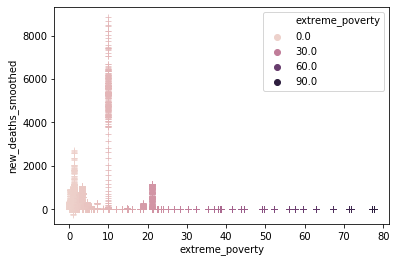

In [19]:
sns.scatterplot(data=extremePoverty_newDeaths_corr ,x = 'extreme_poverty' , y = 'new_deaths_smoothed',hue="extreme_poverty",marker="+")

In [115]:
pd.pivot_table(training, index = 'continent', values = ['population','new_deaths','handwashing_facilities','stringency_index','extreme_poverty','handwashing_facilities','tests_per_case','gdp_per_capita'])

extreme_poverty  gdp_per_capita  handwashing_facilities  \
continent                                                                
Africa               33.143662     5604.338486               26.387615   
Asia                  5.428524    23231.878649               71.625479   
Europe                0.927472    34467.790022               94.021782   
North America         5.286116    22076.065002               77.307878   
Oceania               2.147287    24068.801260               50.410095   
South America         2.902694    13781.820860               66.663789   

               handwashing_facilities  new_deaths    population  \
continent                                                         
Africa                      26.387615    3.164665  2.647888e+07   
Asia                        71.625479   15.379911  1.072658e+08   
Europe                      94.021782   18.387180  1.568024e+07   
North America               77.307878   39.671381  2.033499e+07   
Oceania                     50.410095    0.510264  5.589156e+06   
South America               66.663789   87.310836  3.695782e+07   

               stringency_index  tests_per_case  
continent                                        
Africa                61.807158       58.453218  
Asia                  57.150957      245.774662  
Europe                47.979552      168.435454  
North America         63.516492       55.590825  
Oceania               53.575065     1663.446176  
South America         71.970056       61.778682

In [18]:
newData.columns

Index(['id', 'iso_code', 'continent', 'location', 'population',
       'human_development_index', 'gdp_per_capita', 'date', 'total_cases',
       'total_deaths', 'new_cases', 'new_deaths', 'new_cases_smoothed',
       'new_deaths_smoothed', 'total_cases_per_million',
       'total_deaths_per_million', 'new_cases_per_million',
       'new_deaths_per_million', 'new_cases_smoothed_per_million',
       'new_deaths_smoothed_per_million', 'diabetes_prevalence',
       'cardiovasc_death_rate', 'median_age', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy', 'stringency_index',
       'total_tests', 'new_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'tests_per_case', 'extreme_poverty',
       'train_data'],
      dtype='object')

### Feature Engineering

In [9]:
newData['date_to_integer'] = newData['date'].apply(lambda x : float(''.join(x.split('-'))) if str(x) else x)

### Data Preprocessing

In [10]:
newData['continent'] = newData['continent'].apply(lambda x : "World" if pd.isna(x) else x )

In [11]:
hdi_continent_mean = dict()
hdi_location_mean = dict()
gdp_location_mean = dict()

for i in (newData['continent'].value_counts().index):
    hdi_continent_mean[i] = newData[newData['continent'] == i]['human_development_index'].mean()

for i in newData['location'].value_counts().index:
    hdi_location_mean[i] = newData[newData['location'] == i]['human_development_index'].mean()

for key,value in hdi_location_mean.items():
    if pd.isna(value):
        hdi_location_mean[key]= hdi_continent_mean[newData[newData['location']==key]['continent'].values[0]] 
        
for i in newData['location'].value_counts().index:
    if pd.isna(newData[newData['location']==i]['gdp_per_capita'].values[0]):
        gdp_location_mean[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['gdp_per_capita'].mean()
    else:
        gdp_location_mean[i] = newData[newData['location']==i]['gdp_per_capita'].mean()
        
hdi_location_mean.pop('World')
hdi_continent_mean.pop('World')
hdi_location_mean['World'] = sum(hdi_location_mean.values())/len(hdi_location_mean)
hdi_continent_mean['World'] = sum(hdi_continent_mean.values())/len(hdi_continent_mean)

In [12]:
newData['human_development_index'] = newData['location'].apply(lambda x:  hdi_location_mean[x])  
newData['gdp_per_capita'] = newData['location'].apply(lambda x:  gdp_location_mean[x])
newData['total_cases'] = newData['total_cases'].apply(lambda x: 0 if pd.isna(x) else x)
newData['total_deaths'] = newData['total_deaths'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_deaths'] = newData['new_deaths'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_cases'] = newData['new_cases'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_cases_smoothed'] = newData['new_cases_smoothed'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_deaths_smoothed'] = newData['new_deaths_smoothed'].apply(lambda x: 0 if pd.isna(x) else x)
newData['total_cases_per_million'] = newData['total_cases_per_million'].apply(lambda x: 0 if pd.isna(x) else x)
newData['total_deaths_per_million'] = newData['total_deaths_per_million'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_cases_per_million'] = newData['new_cases_per_million'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_deaths_per_million'] = newData['new_deaths_per_million'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_cases_smoothed_per_million'] = newData['new_cases_smoothed_per_million'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_deaths_smoothed_per_million'] = newData['new_deaths_smoothed_per_million'].apply(lambda x: 0 if pd.isna(x) else x)
newData['total_tests'] = newData['total_tests'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_tests'] = newData['new_tests'].apply(lambda x: 0 if pd.isna(x) else x)
newData['total_tests_per_thousand'] = newData['total_tests_per_thousand'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_tests_per_thousand'] = newData['new_tests_per_thousand'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_tests_smoothed'] = newData['new_tests_smoothed'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_tests_smoothed_per_thousand'] = newData['new_tests_smoothed_per_thousand'].apply(lambda x: 0 if pd.isna(x) else x)
newData['tests_per_case'] = newData['tests_per_case'].apply(lambda x: 0 if pd.isna(x) else x) 

In [13]:
diabetes_prevalence_location = dict()
cardiovasc_death_rate_location = dict()
median_age_location = dict()
handwashing_facilities_location = dict()
hospital_beds_per_thousand_location = dict()
life_expectancy_location = dict()
stringency_index_location = dict()
extreme_poverty_location = dict()

for i in newData['location'].value_counts().index:
    diabetes_prevalence_location[i] = newData[newData['location']==i]['diabetes_prevalence'].values[0]
    cardiovasc_death_rate_location[i] = newData[newData['location']==i]['cardiovasc_death_rate'].values[0]
    median_age_location[i] = newData[newData['location']==i]['median_age'].values[0]
    handwashing_facilities_location[i] = newData[newData['location']==i]['handwashing_facilities'].values[0]
    hospital_beds_per_thousand_location[i] = newData[newData['location']==i]['hospital_beds_per_thousand'].values[0]
    life_expectancy_location[i] = newData[newData['location']==i]['life_expectancy'].values[0]
    stringency_index_location[i] = newData[newData['location']==i]['stringency_index'].values[0]
    extreme_poverty_location[i] = newData[newData['location']==i]['extreme_poverty'].values[0]
    
    if pd.isna(newData[newData['location']==i]['diabetes_prevalence'].values[0]):
        diabetes_prevalence_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['diabetes_prevalence'].median()
    if pd.isna(newData[newData['location']==i]['cardiovasc_death_rate'].values[0]):
        cardiovasc_death_rate_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['cardiovasc_death_rate'].median()
    if pd.isna(newData[newData['location']==i]['median_age'].values[0]):
        median_age_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['median_age'].median() 
    if pd.isna(newData[newData['location']==i]['handwashing_facilities'].values[0]):
        handwashing_facilities_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['handwashing_facilities'].mean() 
    if pd.isna(newData[newData['location']==i]['hospital_beds_per_thousand'].values[0]):
        hospital_beds_per_thousand_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['hospital_beds_per_thousand'].mean()
    if pd.isna(newData[newData['location']==i]['life_expectancy'].values[0]):
        life_expectancy_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['life_expectancy'].median()
    if pd.isna(newData[newData['location']==i]['stringency_index'].values[0]):
        stringency_index_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['stringency_index'].mean()
    if pd.isna(newData[newData['location']==i]['extreme_poverty'].values[0]):
        extreme_poverty_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['extreme_poverty'].mean()

stringency_index_location.pop('World')
stringency_index_location['World'] = sum(stringency_index_location.values())/len(stringency_index_location)

In [14]:
newData['diabetes_prevalence'] = newData['location'].apply(lambda x:  diabetes_prevalence_location[x])  
newData['cardiovasc_death_rate'] = newData['location'].apply(lambda x:  cardiovasc_death_rate_location[x])  
newData['median_age'] = newData['location'].apply(lambda x:  median_age_location[x])  
newData['handwashing_facilities'] = newData['location'].apply(lambda x:  handwashing_facilities_location[x])  
newData['hospital_beds_per_thousand'] = newData['location'].apply(lambda x:  hospital_beds_per_thousand_location[x])  
newData['life_expectancy'] = newData['location'].apply(lambda x:  life_expectancy_location[x])  
newData['stringency_index'] = newData['location'].apply(lambda x:  stringency_index_location[x])  
newData['extreme_poverty'] = newData['location'].apply(lambda x:  extreme_poverty_location[x])
newData['stringency_index'] = newData['location'].apply(lambda x:  stringency_index_location[x])

In [63]:
newData.drop(newData[newData['new_deaths_smoothed'] < 0].index, inplace = True) 

In [66]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56631 entries, 23827 to 54571
Data columns (total 37 columns):
id                                 56631 non-null int64
iso_code                           56631 non-null object
continent                          56631 non-null object
location                           56631 non-null object
population                         56631 non-null float64
human_development_index            56631 non-null float64
gdp_per_capita                     56631 non-null float64
date                               56631 non-null object
total_cases                        56631 non-null float64
total_deaths                       56631 non-null float64
new_cases                          56631 non-null float64
new_deaths                         56631 non-null float64
new_cases_smoothed                 56631 non-null float64
new_deaths_smoothed                56631 non-null float64
total_cases_per_million            56631 non-null float64
total_deaths_per_millio

In [92]:
all_dummies = pd.get_dummies(newData[['new_deaths_smoothed','population','human_development_index','gdp_per_capita','date_to_integer','new_cases_smoothed','diabetes_prevalence','cardiovasc_death_rate','median_age','handwashing_facilities','life_expectancy','stringency_index','new_tests_smoothed','new_tests_smoothed_per_thousand','tests_per_case','extreme_poverty','train_data']])
X_train = all_dummies[all_dummies['train_data']==1].drop(['train_data'],axis=1)
X_test = all_dummies[all_dummies['train_data']==0].drop(['train_data'],axis=1)

Y_train = newData[newData['train_data']==1]['new_deaths_smoothed']
Y_test = newData[newData['train_data']==0]['new_deaths_smoothed']
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')
Y_train.shape

(45188,)

In [93]:
## Scale the data for our model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['new_deaths_smoothed', 'population', 'human_development_index',
       'gdp_per_capita', 'date_to_integer', 'new_cases_smoothed',
       'diabetes_prevalence', 'cardiovasc_death_rate', 'median_age',
       'handwashing_facilities', 'life_expectancy', 'stringency_index',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'extreme_poverty']]= scale.fit_transform(all_dummies_scaled[['new_deaths_smoothed', 'population', 'human_development_index',
       'gdp_per_capita', 'date_to_integer', 'new_cases_smoothed',
       'diabetes_prevalence', 'cardiovasc_death_rate', 'median_age',
       'handwashing_facilities', 'life_expectancy', 'stringency_index',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'extreme_poverty']])

X_train_scaled = all_dummies_scaled[all_dummies_scaled['train_data'] == 1].drop(['train_data'],axis=1).drop(['new_deaths_smoothed'],axis=1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled['train_data'] == 0].drop(['train_data'],axis=1).drop(['new_deaths_smoothed'],axis=1)

Y_train_scaled = all_dummies_scaled[all_dummies_scaled['train_data']==1]['new_deaths_smoothed']
Y_test_scaled = all_dummies_scaled[all_dummies_scaled['train_data']==0]['new_deaths_smoothed']
Y_train_scaled = Y_train_scaled.astype('int')
Y_test_scaled = Y_test_scaled.astype('int')

In [94]:
all_dummies_scaled.head()

new_deaths_smoothed  population  human_development_index  \
23827            -0.122388    2.149369                -0.614014   
23828            -0.122388    2.149369                -0.614014   
23829            -0.122388    2.149369                -0.614014   
23830            -0.122388    2.149369                -0.614014   
23831            -0.122388    2.149369                -0.614014   

       gdp_per_capita  date_to_integer  new_cases_smoothed  \
23827       -0.763146       -22.350576           -0.106994   
23828       -0.763146        -1.320424           -0.106994   
23829       -0.763146        -1.318053           -0.106994   
23830       -0.763146        -1.315682           -0.106994   
23831       -0.763146        -1.313311           -0.106994   

       diabetes_prevalence  cardiovasc_death_rate  median_age  \
23827             0.553186               0.329487   -0.404675   
23828             0.553186               0.329487   -0.404675   
23829             0.553186               0.329487   -0.404675   
23830             0.553186               0.329487   -0.404675   
23831             0.553186               0.329487   -0.404675   

       handwashing_facilities  life_expectancy  stringency_index  \
23827               -0.240983        -0.591635          0.708462   
23828               -0.240983        -0.591635          0.708462   
23829               -0.240983        -0.591635          0.708462   
23830               -0.240983        -0.591635          0.708462   
23831               -0.240983        -0.591635          0.708462   

       new_tests_smoothed  new_tests_smoothed_per_thousand  tests_per_case  \
23827           -0.166564                        -0.343612       -0.129961   
23828           -0.166564                        -0.343612       -0.129961   
23829           -0.166564                        -0.343612       -0.129961   
23830           -0.166564                        -0.343612       -0.129961   
23831           -0.166564                        -0.343612       -0.129961   

       extreme_poverty  train_data  
23827         0.641695           1  
23828         0.641695           1  
23829         0.641695           1  
23830         0.641695           1  
23831         0.641695           1

## Model Building

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [96]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,Y_train,cv=5)
print(cv)
print(cv.mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.37991493 0.42323377 0.32648017 0.36609977 0.37681325]
0.374508378608822


In [ ]:
lr = LogisticRegression()
cv = cross_val_score(lr,X_train_scaled,Y_train,cv=5)
print(cv)
print(cv.mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [400]:
gnb.fit(X_train_scaled,Y_train_scaled)
lr.fit(X_train_scaled,Y_train_scaled)
gnb_prediction = gnb.predict(X_test_scaled)
lr_prediction = lr.predict(X_test_scaled)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [407]:
comparison = {'Id':testing['id'],'gnbPrediction':prediction,'lrPrediction':prediction,'Actual':Y_test_scaled}

In [408]:
final_data = pd.DataFrame(data=comparison)

In [409]:
final_data

Id  gnbPrediction  lrPrediction  Actual
7533    7534              2             2       1
7534    7535              2             2       1
7535    7536              2             2       1
7536    7537              2             2       1
7537    7538              2             2       2
...      ...            ...           ...     ...
32990  32991              0             0       0
32991  32992              0             0       0
32992  32993              0             0       0
32993  32994              0             0       0
54571  54572              0             0       0

[11443 rows x 4 columns]

## Model Tuning